In [1]:
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from matplotlib import cm
import networkx as nx
import powerlaw
import pandas as pd

In [2]:
from matplotlib import font_manager, rc
# 한글 폰트가 깨지지 않기 위한 세팅
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
file_lst = ['0306','0709','10','11_phy','12_phy_cm','12_phy_eqm']

# 함수 정의

In [4]:
def entire_Graph():
    G = nx.Graph()
    
    for file_name in file_lst:
        f = open(f"Eng_Phy_{file_name}.txt", 'r', encoding='UTF-8')
        for line in f:
            data_line = list(set(line.split()))

            # 노드 i 추가
            for i in data_line:
                if G.has_node(i):
                    G.nodes[i]['frequency'] += 1
                else:
                    G.add_node(i, frequency=1)
            # 엣지 ij 추가
            for idx, i in enumerate(data_line):
                for jdx, j in enumerate(data_line):
                    if idx >= jdx:
                        continue
                    if G.has_edge(i, j):
                        G[i][j]['weight'] += 1
                    else:
                        G.add_edge(i, j, weight=1)
        # 노드 weight 추가
        f = open(f"Eng_Phy_{file_name}.txt", 'r', encoding='UTF-8')
        for line in f:
            data_line = list(set(line.split()))
            for i in data_line:
                sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
                G.nodes[i]['weight'] = sum_weight
    return G

In [5]:
def subject_graph(N, file_name, fig_name):
    G = nx.Graph()

    f = open(f"Eng_Phy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
    # 노드 i 추가
        for i in data_line:
            if G.has_node(i):
                G.nodes[i]['frequency'] += 1
            else:
                G.add_node(i, frequency=1)
    # 엣지 ij 추가
        for idx, i in enumerate(data_line):
            for jdx, j in enumerate(data_line):
                if idx >= jdx:
                    continue
                if G.has_edge(i, j):
                    G[i][j]['weight'] += 1
                else:
                    G.add_edge(i, j, weight=1)
    # 노드 weight 추가
    f = open(f"Eng_Phy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        for i in data_line:
            sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
            G.nodes[i]['weight'] = sum_weight
                    
    # 노드와 엣지의 가중치를 저장할 딕셔너리 초기화
    node_weights = {node: data['weight'] for node, data in G.nodes(data=True)}
    edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}

    # 노드의 크기 및 엣지의 굵기를 가중치에 비례하여 설정
    #node_size = [node_weights[node] * 20 for node in G.nodes()]
    edge_width = [edge_weights[edge] * 0.1 for edge in G.edges()]
    
    # 노드 색상 매핑을 위한 컬러맵 설정
    cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
    norm = plt.Normalize(min(node_weights.values()), max(node_weights.values()))  # 노드 가중치에 따라 정규화

    # 노드 색상 설정
    node_colors = [cmap(norm(node_weights[node])) for node in G.nodes()]

    # 그래프 그리기
    pos = nx.fruchterman_reingold_layout(G, iterations=20, weight='weight')  # 그래프의 노드 위치 결정
    plt.figure(figsize=(6,4), dpi=300)
    plt.title(fig_name, fontsize=15)
    nx.draw(G, pos, with_labels=True,
            node_color=node_colors, node_size=100, width=edge_width,
            font_family = font, font_size=3)
    
    # 컬러바
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, label='Node strength')
    
    plt.show()

In [6]:
def subject_graph_ver2(itr, seed, k, file_name):
    G = nx.Graph()

    f = open(f"Eng_Phy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
    # 노드 i 추가
        for i in data_line:
            if G.has_node(i):
                G.nodes[i]['frequency'] += 1
            else:
                G.add_node(i, frequency=1)
    # 엣지 ij 추가
        for idx, i in enumerate(data_line):
            for jdx, j in enumerate(data_line):
                if idx >= jdx:
                    continue
                if G.has_edge(i, j):
                    G[i][j]['weight'] += 1
                else:
                    G.add_edge(i, j, weight=1)
    # 노드 weight 추가
    f = open(f"Eng_Phy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        for i in data_line:
            sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
            G.nodes[i]['weight'] = sum_weight
                    
    # 노드와 엣지의 가중치를 저장할 딕셔너리 초기화
    node_weights = {node: data['weight'] for node, data in G.nodes(data=True)}
    edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}

    # 노드의 크기 및 엣지의 굵기를 가중치에 비례하여 설정
    #node_size = [node_weights[node] * 20 for node in G.nodes()]
    edge_width = [edge_weights[edge] * 0.1 for edge in G.edges()]
    
    # 노드 색상 매핑을 위한 컬러맵 설정
    cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
    norm = plt.Normalize(min(node_weights.values()), max(node_weights.values()))  # 노드 가중치에 따라 정규화

    # 노드 색상 설정
    node_colors = [cmap(norm(node_weights[node])) for node in G.nodes()]

    # 그래프 그리기
    pos = nx.fruchterman_reingold_layout(G, k=k, iterations=itr, weight='weight', seed=seed)  # 그래프의 노드 위치 결정
    plt.figure(figsize=(6,4), dpi=300)
    nx.draw(G, pos, with_labels=True,
            node_color=node_colors, node_size=100, width=edge_width,
            font_family = font, font_size=3)
    
    # 컬러바
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, label='Node strength')
    
    plt.show()

In [7]:
def graph(N, file_name):
    G = nx.Graph()

    f = open(f"Eng_Phy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
    # 노드 i 추가
        for i in data_line:
            if G.has_node(i):
                G.nodes[i]['frequency'] += 1
            else:
                G.add_node(i, frequency=1)
    # 엣지 ij 추가
        for idx, i in enumerate(data_line):
            for jdx, j in enumerate(data_line):
                if idx >= jdx:
                    continue
                if G.has_edge(i, j):
                    G[i][j]['weight'] += 1
                else:
                    G.add_edge(i, j, weight=1)
    # 노드 weight 추가
    f = open(f"Eng_Phy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        for i in data_line:
            sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
            G.nodes[i]['weight'] = sum_weight
    
    return G

In [8]:
def basic_info(G):
    
    hist_wordFreq = []
    hist_edges = []
    hist_nodeWeight = []
    hist_edgeWeight = []

    for i in list(G.nodes):
        hist_edges.append(G.degree[i])
        hist_wordFreq.append(G.nodes[i]['frequency'])
        hist_nodeWeight.append(G.nodes[i]['weight'])

    for edge in list(G.edges):
        i, j = edge[0], edge[1]
        hist_edgeWeight.append(G[i][j]['weight'])

    print(f'Number of nodes: {G.number_of_nodes()}')
    print(f'Number of edges: {G.number_of_edges()}')
    
    print(f'WordFreq avg: {round(np.average(hist_wordFreq), 2)}, WordFreq std: {round(np.std(hist_wordFreq), 2)}')
    print(f'Degree avg: {round(np.average(hist_edges), 2)}, Degree std: {round(np.std(hist_edges), 2)}')
    print(f'NodeWeight avg: {round(np.average(hist_nodeWeight), 2)}, NodeWeight std: {round(np.std(hist_nodeWeight), 2)}')
    print(f'EdgeWeight avg: {round(np.average(hist_edgeWeight), 2)}, EdgeWeight std: {round(np.std(hist_edgeWeight), 2)}')
    
    return hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight

In [9]:
def hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight):

    plt.figure(figsize=(13,4), dpi=300)
    
    plt.subplot(1,3,1)
    plt.title('Dist. of node degree')
    plt.hist(hist_edges)
    plt.yscale('log')
    plt.xlabel('Node degree')
    
    plt.subplot(1,3,2)
    plt.title('Dist. of edge weight')
    plt.hist(hist_edgeWeight)
    plt.yscale('log')
    plt.xlabel('Edge weight')

    plt.subplot(1,3,3)
    plt.title('Dist. of node strength')
    plt.hist(hist_nodeWeight)
    plt.yscale('log')
    plt.xlabel('Node strength')

In [10]:
def power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight):
    
    compare_lst = ['exponential', 'truncated_power_law', 'lognormal']
    
    plt.figure(figsize=(16,4), dpi=300)

    plt.subplot(1,4,1)
    plt.title('Dist. of word frequency')
    fit = powerlaw.Fit(hist_wordFreq)
    fig1 = fit.plot_ccdf(color = 'b')
    fit.power_law.plot_ccdf(color = 'r', linestyle = '--', ax=fig1)
    plt.ylabel('Probability')
    check = [1,1,1]
    for i, compare in enumerate(compare_lst):
        R, p = fit.distribution_compare('power_law',compare, normalized_ratio = True)
        if p < 0.05:
            check[i] = 0
    if sum(check) == 3:
        print(f"1: Pass, {fit.power_law.alpha}\n")
    
    plt.subplot(1,4,2)
    plt.title('Dist. of degree')
    fit = powerlaw.Fit(hist_edges)
    fig1 = fit.plot_ccdf(color = 'b')
    fit.power_law.plot_ccdf(color = 'r', linestyle = '--', ax=fig1)
    check = [1,1,1]
    for i, compare in enumerate(compare_lst):
        R, p = fit.distribution_compare('power_law',compare, normalized_ratio = True)
        if p < 0.05:
            check[i] = 0
    if sum(check) == 3:
        print(f"2: Pass, {fit.power_law.alpha}\n")

    plt.subplot(1,4,3)
    plt.title('Dist. of node strength')
    fit = powerlaw.Fit(hist_nodeWeight)
    fig2 = fit.plot_ccdf(color = 'b')
    fit.power_law.plot_ccdf(color = 'r', linestyle = '--', ax=fig2)
    check = [1,1,1]
    for i, compare in enumerate(compare_lst):
        R, p = fit.distribution_compare('power_law',compare, normalized_ratio = True)
        if p < 0.05:
            check[i] = 0
    if sum(check) == 3: print(f"3: Pass, {fit.power_law.alpha}\n")

    plt.subplot(1,4,4)
    plt.title('Dist. of edge weight')
    fit = powerlaw.Fit(hist_edgeWeight)
    fig3 = fit.plot_ccdf(color = 'b')
    fit.power_law.plot_ccdf(color = 'r', linestyle = '--', ax=fig3)
    check = [1,1,1]
    for i, compare in enumerate(compare_lst):
        R, p = fit.distribution_compare('power_law',compare, normalized_ratio = True)
        if p < 0.05:
            check[i] = 0
    if sum(check) == 3: print(f"4: Pass, {fit.power_law.alpha}\n")

In [11]:
def info(G):
    node_freq = {node: G.nodes[node]['frequency'] for node in G.nodes()}

    node_degree = dict(G.degree())

    # 각 노드의 강도(weight) 계산
    node_strength = dict(nx.degree(G, weight='weight'))

    # 각 엣지의 가중치(weight) 계산
    edge_weight = dict(nx.get_edge_attributes(G, 'weight'))

    # betweenness centrality 계산
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    H = G.subgraph(largest_component)
    betweenness_centrality = nx.current_flow_betweenness_centrality(H, weight='weight')

    # 결과 출력
    data = sorted(node_freq.items(), key=lambda x: x[1], reverse=True)
    df1 = pd.DataFrame(data, columns=['Node_F','Node Frequency'])

    #print("Node Degree:")
    data = sorted(node_degree.items(), key=lambda x: x[1], reverse=True)
    df2 = pd.DataFrame(data, columns=['Node_ND','Node Degree'])

    #print("\nNode Strength:")
    data = sorted(node_strength.items(), key=lambda x: x[1], reverse=True)
    df3 = pd.DataFrame(data, columns=['Node_NS', 'Node Strength'])

    #print("\nEdge Weight:")
    data = sorted(edge_weight.items(), key=lambda x: x[1], reverse=True)
    df4 = pd.DataFrame(data, columns=['Edge', 'Edge Weight'])

    #print("\nBetweenness Centrality:")
    data = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    df5 = pd.DataFrame(data, columns=['Node_BC', 'Betweenness Centrality'])

    df = pd.concat([df1,df2,df3,df4,df5],axis=1)
    
    return df

# 키워드 추출

In [12]:
result = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(3, file_lst[idx-1])
        file = file_lst[idx-1]
    node_freq = {node: G.nodes[node]['frequency'] for node in G.nodes()}
    data = sorted(node_freq.items(), key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(data, columns=['Node_F',file])
    result = pd.concat([result, df], axis=1)

print('Node Frequency')
result.head(10)

Node Frequency


Node_F  Total       Node_F  0306          Node_F  0709  \
0       Object     26       Object  12.0          Object   8.0   
1       Matter     15          Gas   5.0          Motion   7.0   
2        Light     14       Matter   4.0          Matter   6.0   
3       Motion     13  Temperature   4.0           Phase   4.0   
4        Force      9        Force   3.0  Particle_model   4.0   
5          Gas      9       Weight   3.0           Force   4.0   
6        Phase      9        Phase   3.0        Particle   3.0   
7       Energy      9        Sound   3.0             Gas   3.0   
8          Act      8       Magnet   3.0     Temperature   2.0   
9  Temperature      7        Water   3.0           Model   2.0   

           Node_F   10             Node_F  11_phy                   Node_F  \
0           Earth  5.0              Light     4.0                   Object   
1       Formation  2.0  Mechanical_energy     3.0                   Motion   
2          Matter  2.0          Transform     3.0                     Heat   
3  Early_universe  2.0             Energy     3.0                      Act   
4         Element  2.0                Act     2.0                    Force   
5       Transform  2.0   Conservation_law     2.0        Mechanical_energy   
6           Space  1.0               Heat     2.0                   Planet   
7            Time  1.0             Sensor     2.0          Resultant_force   
8          Length  1.0      Semiconductor     2.0  Newton's_laws_of_motion   
9         Digital  1.0             Torque     1.0         Parabolic_motion   

   12_phy_cm                Node_F  12_phy_eqm  
0        4.0                 Light         4.0  
1        3.0               Digital         3.0  
2        3.0           Probability         3.0  
3        2.0             Direction         2.0  
4        2.0             Intensity         2.0  
5        2.0              Inductor         2.0  
6        2.0                Energy         2.0  
7        1.0          Interference         2.0  
8        1.0               Quantum         2.0  
9        1.0  Electric_field_lines         1.0

In [13]:
result1 = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(3, file_lst[idx-1])
        file = file_lst[idx-1]
    node_strength = dict(nx.degree(G, weight='weight'))
    data = sorted(node_strength.items(), key=lambda x: x[1], reverse=True)
    df3 = pd.DataFrame(data, columns=['Node_NS', file])
    result1 = pd.concat([result1, df3], axis=1)

print('Node Strength')
result1.head(10)

Node Strength


Node_NS  Total           Node_NS  0306         Node_NS  0709  \
0     Object     80            Object  25.0          Object  31.0   
1      Light     56             Force  10.0          Motion  27.0   
2     Motion     48            Matter   8.0           Force  16.0   
3     Matter     47               Gas   8.0          Matter  15.0   
4      Force     35             Light   8.0         Gravity  12.0   
5     Energy     35        Connection   8.0        Transmit  11.0   
6  Transform     33           Battery   8.0        Particle  10.0   
7        Act     30  Electric_circuit   8.0           Model  10.0   
8      Phase     26       Temperature   7.0  Particle_model  10.0   
9       Heat     25              Size   6.0       Direction  10.0   

            Node_NS    10                        Node_NS  11_phy  \
0             Earth  19.0                          Light    14.0   
1         Formation  13.0                      Transform    11.0   
2    Early_universe  13.0                         Energy    11.0   
3           Element  13.0              Mechanical_energy    10.0   
4         Transform  12.0                            Act     9.0   
5            Matter   9.0               Conservation_law     8.0   
6          Spectrum   7.0                  Semiconductor     8.0   
7          Emission   7.0                         Sensor     7.0   
8  Celestial_bodies   7.0                           Heat     6.0   
9             Light   7.0  Electric_potential_difference     6.0   

             Node_NS  12_phy_cm       Node_NS  12_phy_eqm  
0             Object       14.0         Light        20.0  
1             Motion       13.0   Probability        14.0  
2               Heat       13.0       Digital        11.0  
3             Planet       11.0       Quantum        11.0  
4  Mechanical_energy       10.0     Direction        10.0  
5                Act        9.0     Intensity        10.0  
6              Force        9.0        Energy        10.0  
7          Spaceship        7.0  Interference         9.0  
8   Conservation_law        7.0      Spectrum         7.0  
9           Momentum        7.0      Emission         7.0

In [14]:
result2 = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(3, file_lst[idx-1])
        file = file_lst[idx-1]
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    H = G.subgraph(largest_component)
    betweenness_centrality = nx.current_flow_betweenness_centrality(H, weight='weight')
    data = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    df5 = pd.DataFrame(data, columns=['Node_BC', file])
    result2 = pd.concat([result2, df5], axis=1)

print('Betweenness Centrality')
result2.head(10)

Betweenness Centrality


Node_BC     Total      Node_BC      0306           Node_BC      0709  \
0         Light  0.298037       Object  0.788332            Object  0.456678   
1        Object  0.287116        Light  0.313468            Motion  0.436328   
2        Matter  0.188850       Matter  0.295373             Model  0.315845   
3        Motion  0.148757          Gas  0.255961             Force  0.309820   
4        Energy  0.146563        Phase  0.236754         Transform  0.286417   
5         Phase  0.118867  Temperature  0.206567        Resistance  0.264505   
6     Transform  0.116714        Water  0.166869  Electric_current  0.258736   
7          Heat  0.113137        Sound  0.154425           Gravity  0.182138   
8  Interference  0.092395       Weight  0.125433          Transmit  0.164606   
9      Transmit  0.085750        Force  0.114458            Matter  0.157906   

           Node_BC        10            Node_BC    11_phy  \
0            Earth  0.713654  Mechanical_energy  0.563022   
1        Transform  0.380366             Energy  0.491653   
2           Matter  0.131289   Conservation_law  0.490476   
3          Element  0.127176                Act  0.341975   
4        Formation  0.127176          Transform  0.338539   
5   Early_universe  0.127176             Sensor  0.286905   
6             Mass  0.081633               Heat  0.160886   
7             Flow  0.081633   Potential_energy  0.112698   
8  Hydrogen_fusion  0.081633     Kinetic_energy  0.112698   
9              Sun  0.081633               Work  0.112698   

                   Node_BC  12_phy_cm                Node_BC  12_phy_eqm  
0                   Object   0.451729                  Light    0.711296  
1                   Motion   0.376993           Interference    0.482223  
2                   Planet   0.352644                 Energy    0.300101  
3        Mechanical_energy   0.316766            Probability    0.268500  
4                    Force   0.108096               Inductor    0.170040  
5                      Act   0.108096                Digital    0.168730  
6                  Gravity   0.084323                Quantum    0.165962  
7            Kepler's_laws   0.084323            Diffraction    0.126181  
8                Satellite   0.084323               Hologram    0.126181  
9  Newton's_laws_of_motion   0.082907  Particle_wave_duality    0.069701

# 전체 물리학 용어 및 커뮤니티

## 커뮤니티

In [15]:
G = entire_Graph()

In [16]:
# Girvan-Newman 알고리즘을 사용하여 커뮤니티 탐지
comp = nx.community.greedy_modularity_communities(G, weight='weight')
communities = list(comp)

len(communities)

15

In [17]:
nx.community.modularity(G, comp)

0.5999817883809871

In [18]:
# 모든 연결 성분 찾기
connected_components = list(nx.connected_components(G))

#가장 큰 연결 성분 찾기
giant_component = max(connected_components, key=len)

# 가장 큰 연결 성분으로 구성된 서브그래프 생성
G_giant = G.subgraph(giant_component)

# Girvan-Newman 알고리즘을 사용하여 커뮤니티 탐지
comp_giant = nx.community.greedy_modularity_communities(G_giant, weight='weight')
communities_giant = list(comp_giant)

len(communities_giant)

7

In [19]:
import seaborn as sns

In [20]:
sum_matrix = np.zeros((7,7))

for i in range(7):
    for j in range(7):
        sum_comp = []
        for x in range(len(list(communities_giant[i]))):
            for y in range(len(list(communities_giant[j]))):
                s = list(communities_giant[i])[x]
                t = list(communities_giant[j])[y]
                sum_comp.append(nx.shortest_path_length(G_giant, source=s, target=t))
        sum_matrix[i][j] = np.average(sum_comp)

In [21]:
sum_matrix

array([[2.46828143, 3.00809889, 3.48788927, 3.34313725, 3.30522876,
        2.78649237, 3.8974359 ],
       [3.00809889, 2.11814745, 3.39450128, 3.0142663 , 2.8826087 ,
        3.16666667, 4.04682274],
       [3.48788927, 3.39450128, 2.46712803, 3.671875  , 3.15294118,
        3.18464052, 4.13574661],
       [3.34313725, 3.0142663 , 3.671875  , 2.62890625, 3.08854167,
        3.03472222, 4.16826923],
       [3.30522876, 2.8826087 , 3.15294118, 3.08854167, 2.05555556,
        2.83888889, 3.83333333],
       [2.78649237, 3.16666667, 3.18464052, 3.03472222, 2.83888889,
        1.72839506, 3.52991453],
       [3.8974359 , 4.04682274, 4.13574661, 4.16826923, 3.83333333,
        3.52991453, 2.08284024]])

In [22]:
list = []
for idx, data in enumerate(sum_matrix):
    # 제외할 인덱스
    index_to_exclude = idx
    # 새로운 리스트 생성 (index_to_exclude 인덱스를 제외한 리스트)
    filtered_data = [value for i, value in enumerate(data) if i != index_to_exclude]
    print(np.average(filtered_data))
    list.append(np.average(filtered_data))

3.3047137417204113
3.2521607632740945
3.5045989763016707
3.386801946484651
3.1835904198635974
3.0902208675492986
3.9352537233771243


Text(0, 0.5, 'Average shortest path length')

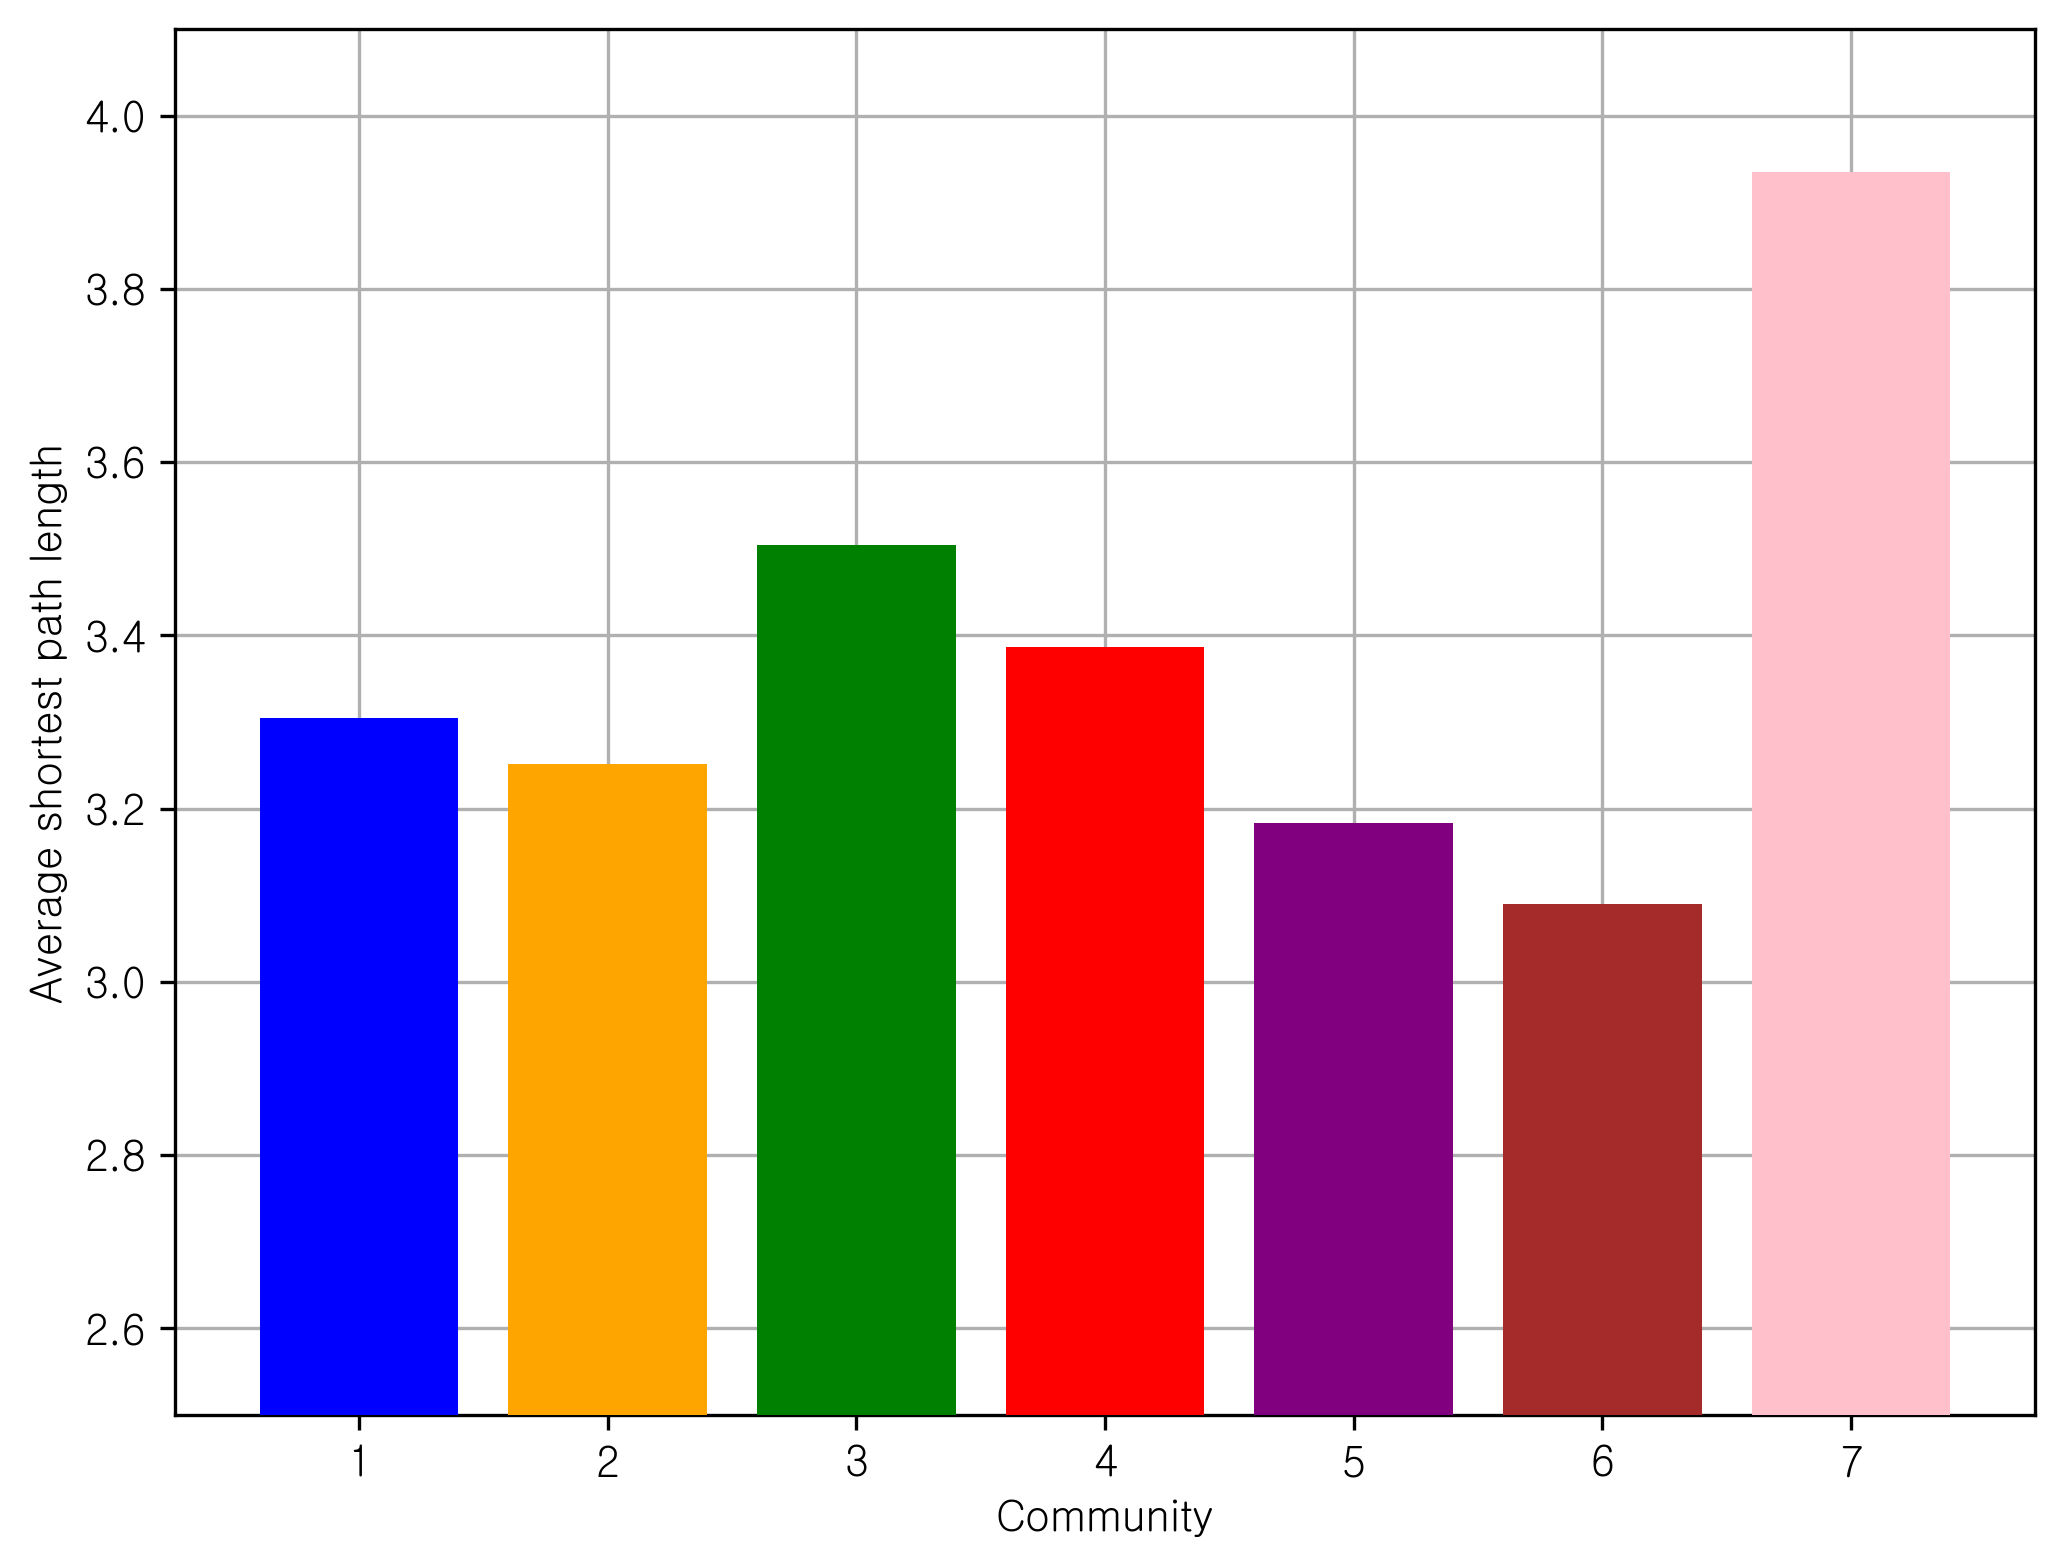

In [23]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# 그리드를 그리기 (zorder를 낮게 설정)
ax.grid(True, zorder=0)

# 막대 그래프 그리기 (zorder를 높게 설정)
x_labels = range(1, 8)
ax.bar(x_labels, list, color=colors, zorder=3)
ax.set_xticks(x_labels)
ax.set_ylim(2.5, 4.1)

plt.xlabel('Community')
plt.ylabel('Average shortest path length')

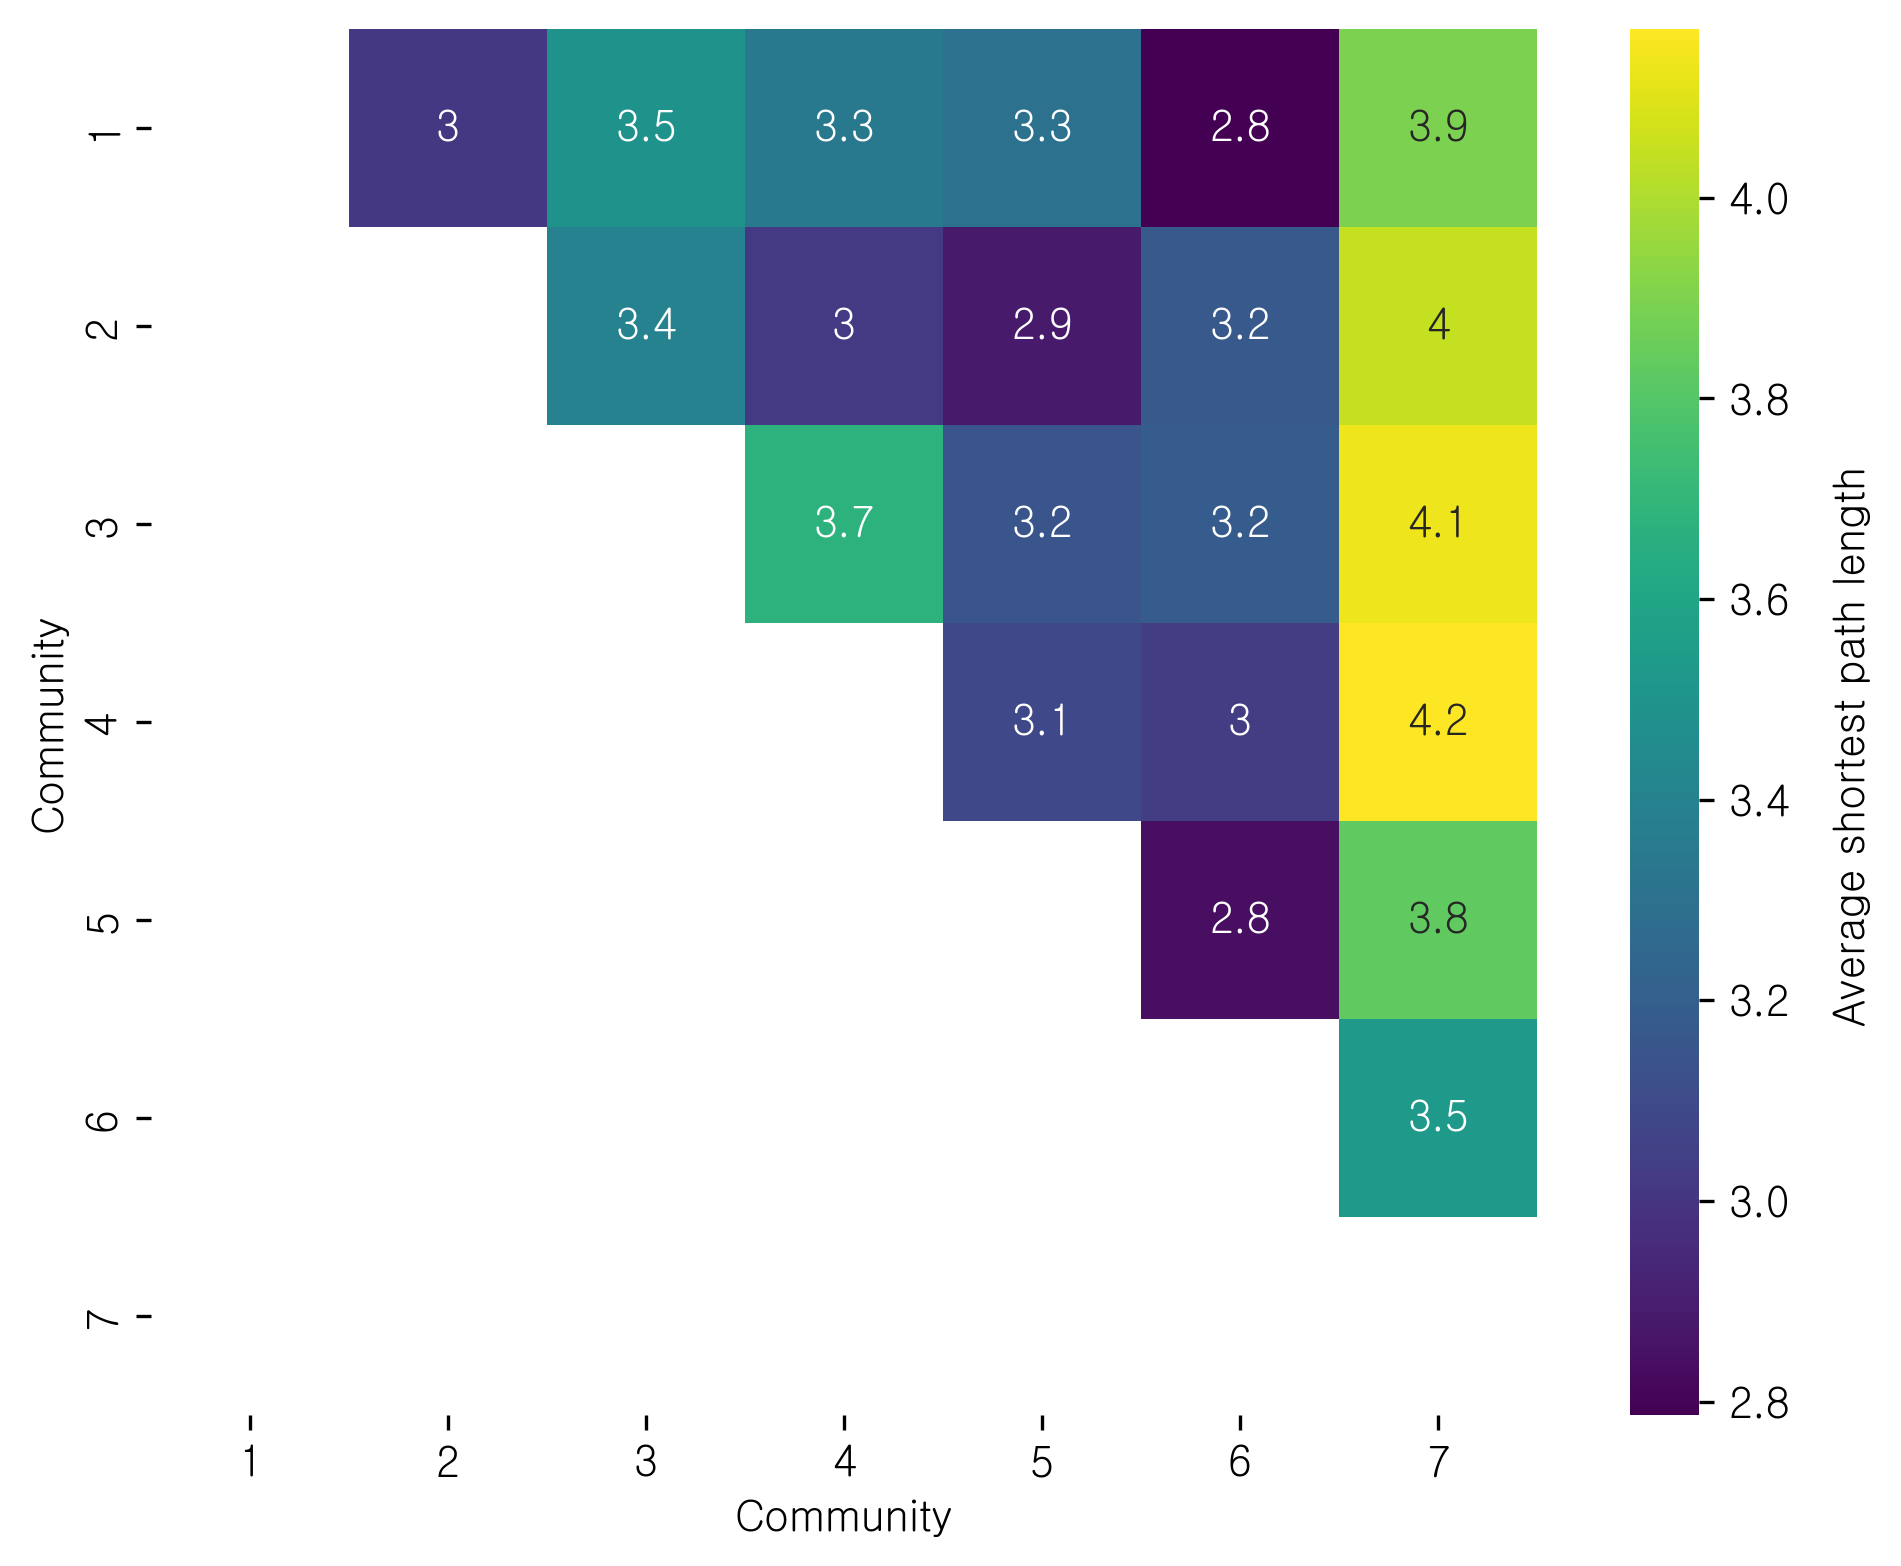

In [24]:
matrix = sum_matrix

# 좌하단 삼각형 부분만 남기고 나머지는 NaN으로 설정
mask = np.tri(*matrix.shape, k=-1).T
masked_matrix = np.where(mask, matrix, np.nan)
labels = np.arange(1, 8)

# 히트맵 그리기
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(masked_matrix, annot=True, cmap="viridis", cbar=True, square=True, xticklabels=labels, yticklabels=labels)


plt.xlabel('Community')
plt.ylabel('Community')

plt.text(8.5,5.0,'Average shortest path length', rotation=90)

plt.show()

In [25]:
for i in communities_giant:
    print(len(i))

51
46
34
32
30
18
13


In [26]:
for i in range(7):

    lst = []
    for i in communities_giant[i]:
        lst.append(i)

    print(lst)
    print()

['Sensor', 'Synthesis', 'Coil', 'Hydrogen_fusion', 'Nuclear_energy', 'Power_consumption', 'Perpetual_mobile', 'Parallel_connection', 'Mass', 'Light', 'Transformers', 'Wire', 'Inductor', 'Electric_energy', 'Generator', 'Sun', 'Proceed', 'Refraction', 'Electric_circuit', 'Heat_source', 'Electric_current', 'Serial_connection', 'Capacitor', 'Elastic_waves', 'Energy', 'Route', 'Magnetic_flux', 'Electrical_signal', 'Conservation_law', 'Resource', 'Convex_lens', 'Voltage', 'Magnetic_field', 'Battery', 'Coal_fuel', 'Reflect', 'Magnetic_field_lines', 'Magnetic_action', 'Resistance', 'Electrical_appliance', 'Model', 'Input_device', 'Flow', 'Connection', 'Electric_motor', 'Electromagnetic_induction', 'Transform', 'Bulb', 'Speaker', 'Transmission', 'Mechanical_energy']

['Resultant_force', 'Buoyancy', 'Object', 'Net_force', 'Length_contraction', 'Doppler_effect', 'Weight', 'Graph', 'Slope', 'Size', 'Location', 'Torque', "Kepler's_laws", 'Gravity', 'Pole', 'Distance', 'Stability', 'Balances', "Newt

In [27]:
import itertools

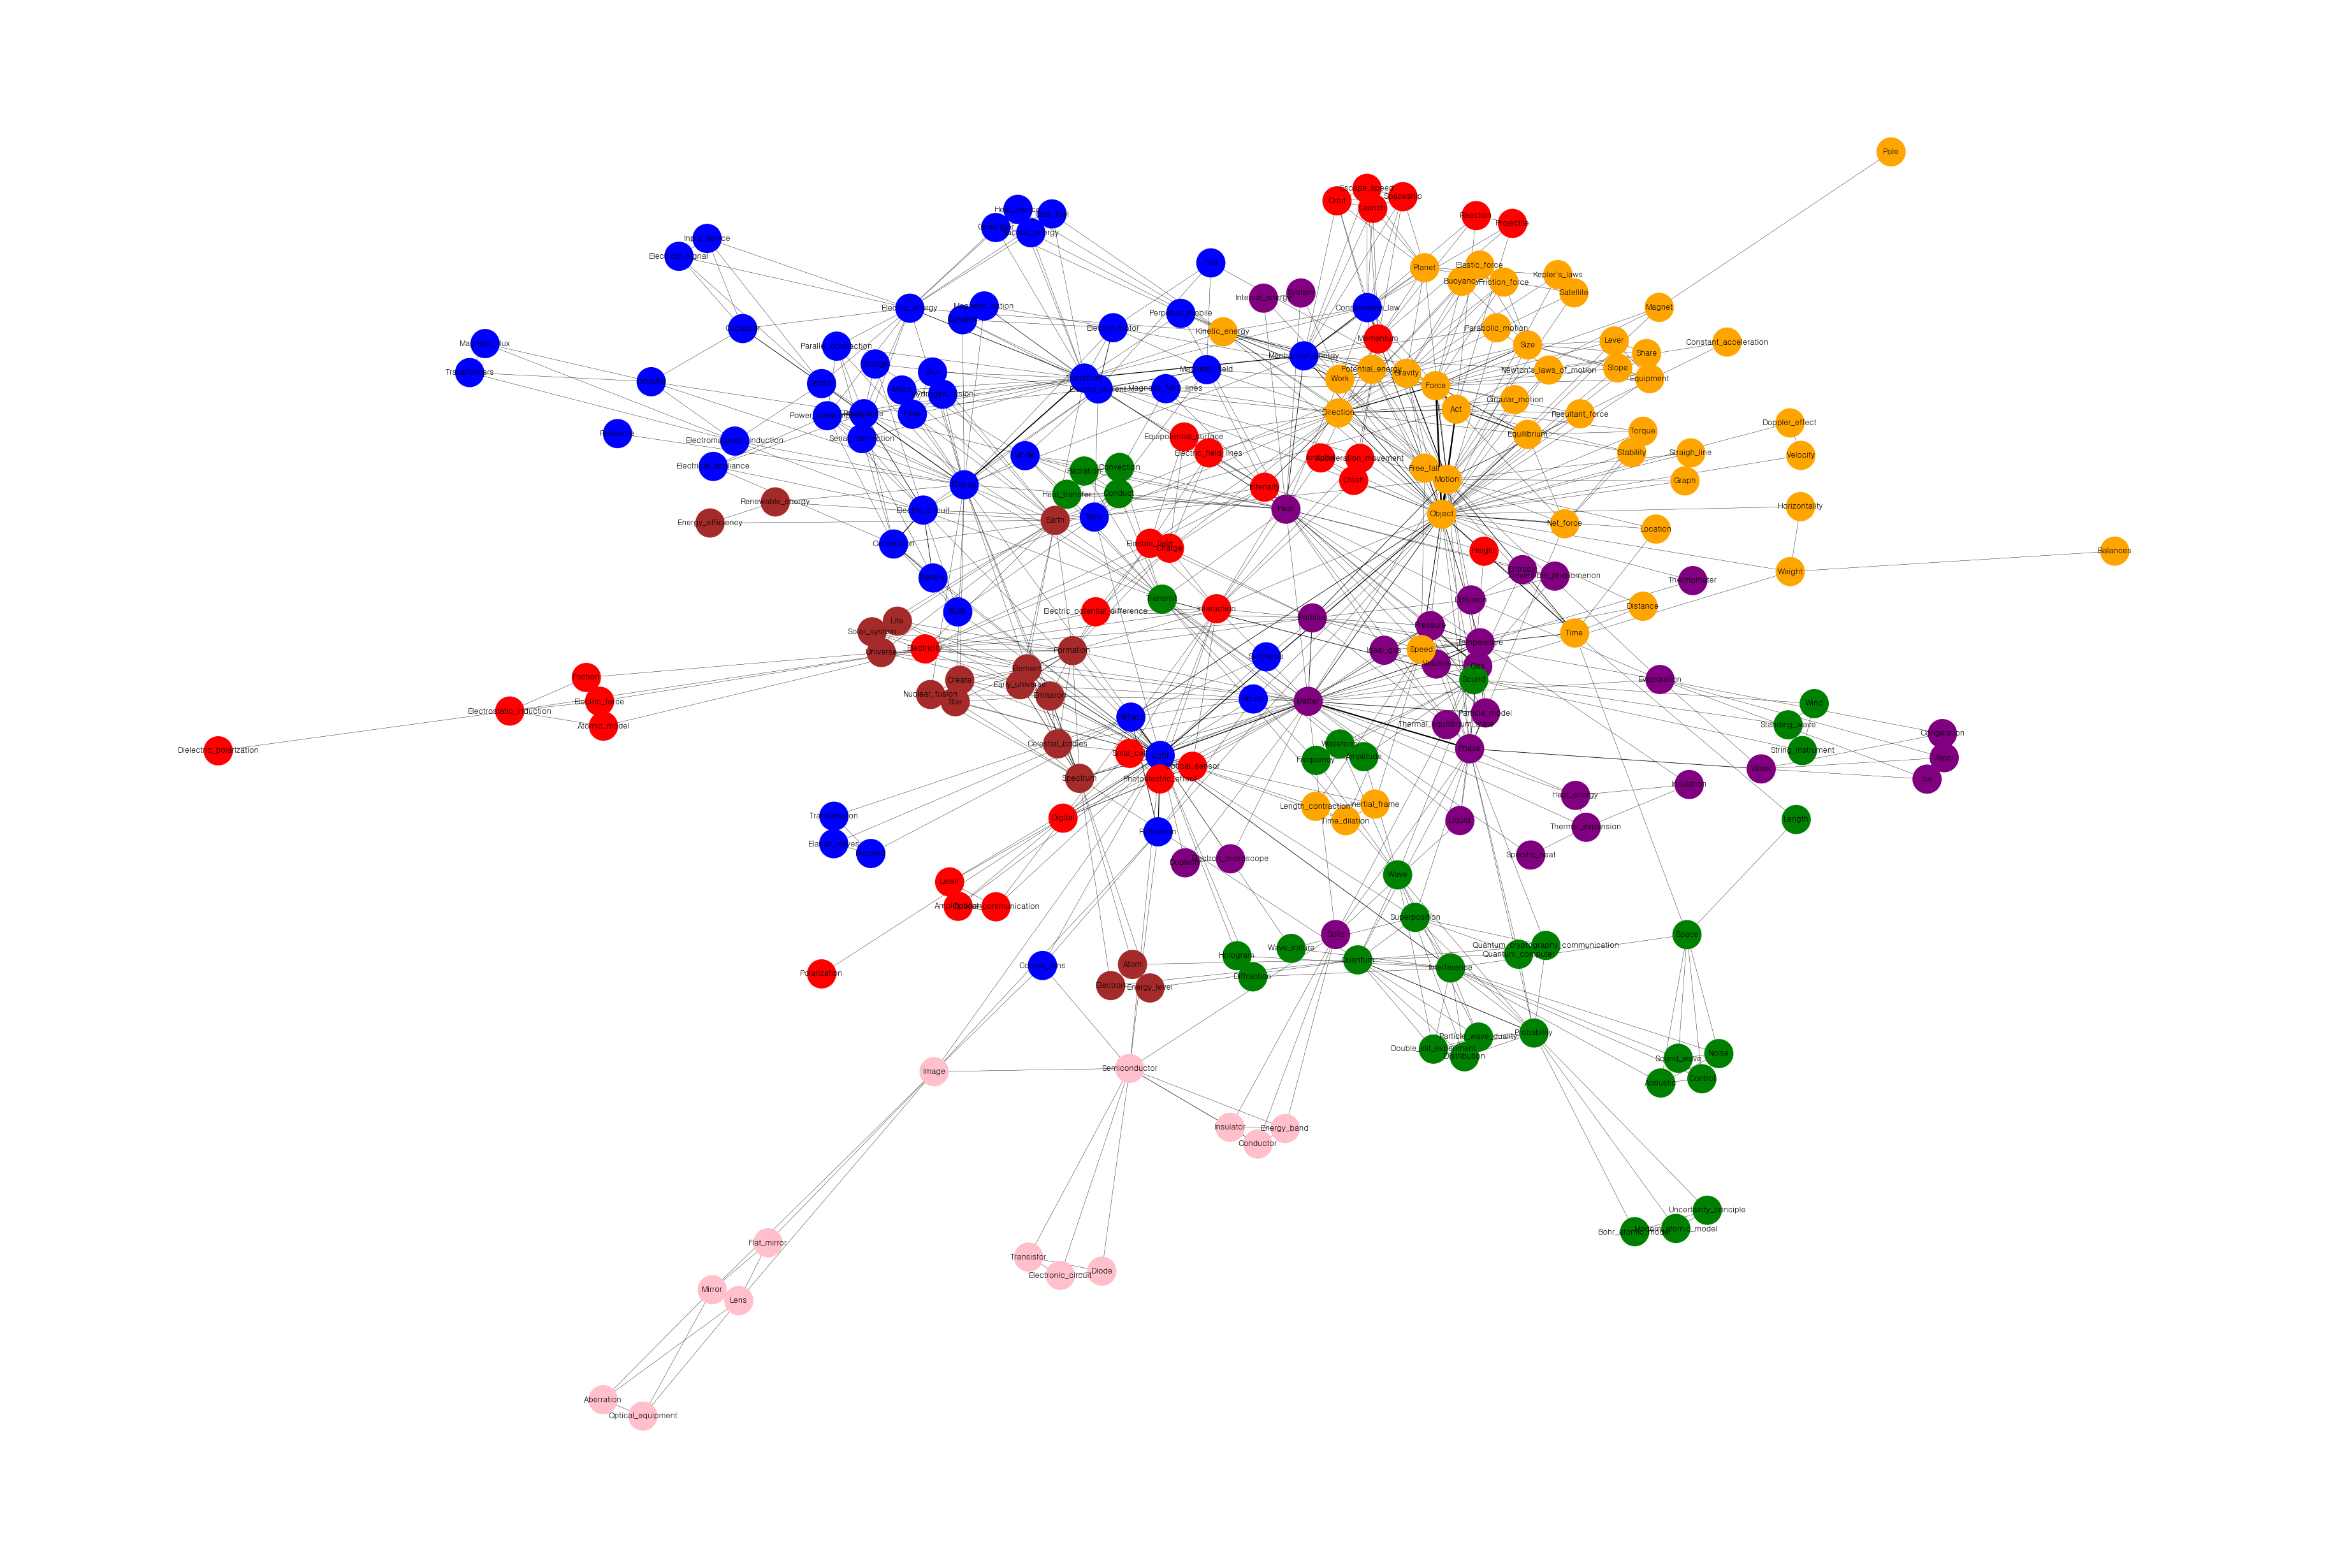

In [28]:
# 커뮤니티별로 색상 지정
colors = itertools.cycle(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])  # 필요한 색상 리스트

node_colors = {}
for community, color in zip(communities_giant, colors):
    for node in community:
        node_colors[node] = color

# 노드 색상 리스트 생성
node_color_list = [node_colors[node] for node in G_giant.nodes()]

# 그래프 레이아웃 설정
pos = nx.fruchterman_reingold_layout(G_giant, k=1, iterations=1000, weight='weight', seed=30) # 그래프의 노드 위치 결정

edge_weights = {(u, v): data['weight'] for u, v, data in G_giant.edges(data=True)}
edge_width = [edge_weights[edge] * 0.1 for edge in G_giant.edges()]

# 그래프 시각화
plt.figure(figsize=(12,8), dpi=300)
nx.draw(G_giant, pos, with_labels=True, node_color=node_color_list, width=edge_width, node_size=100, font_family = font, font_size=3)
plt.show()

## 전체 물리학 용어 통계

In [12]:
G = entire_Graph()

In [13]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 243
Number of edges: 852
WordFreq avg: 2.07, WordFreq std: 2.57
Degree avg: 7.01, Degree std: 6.49
NodeWeight avg: 7.98, NodeWeight std: 8.97
EdgeWeight avg: 1.14, EdgeWeight std: 0.53


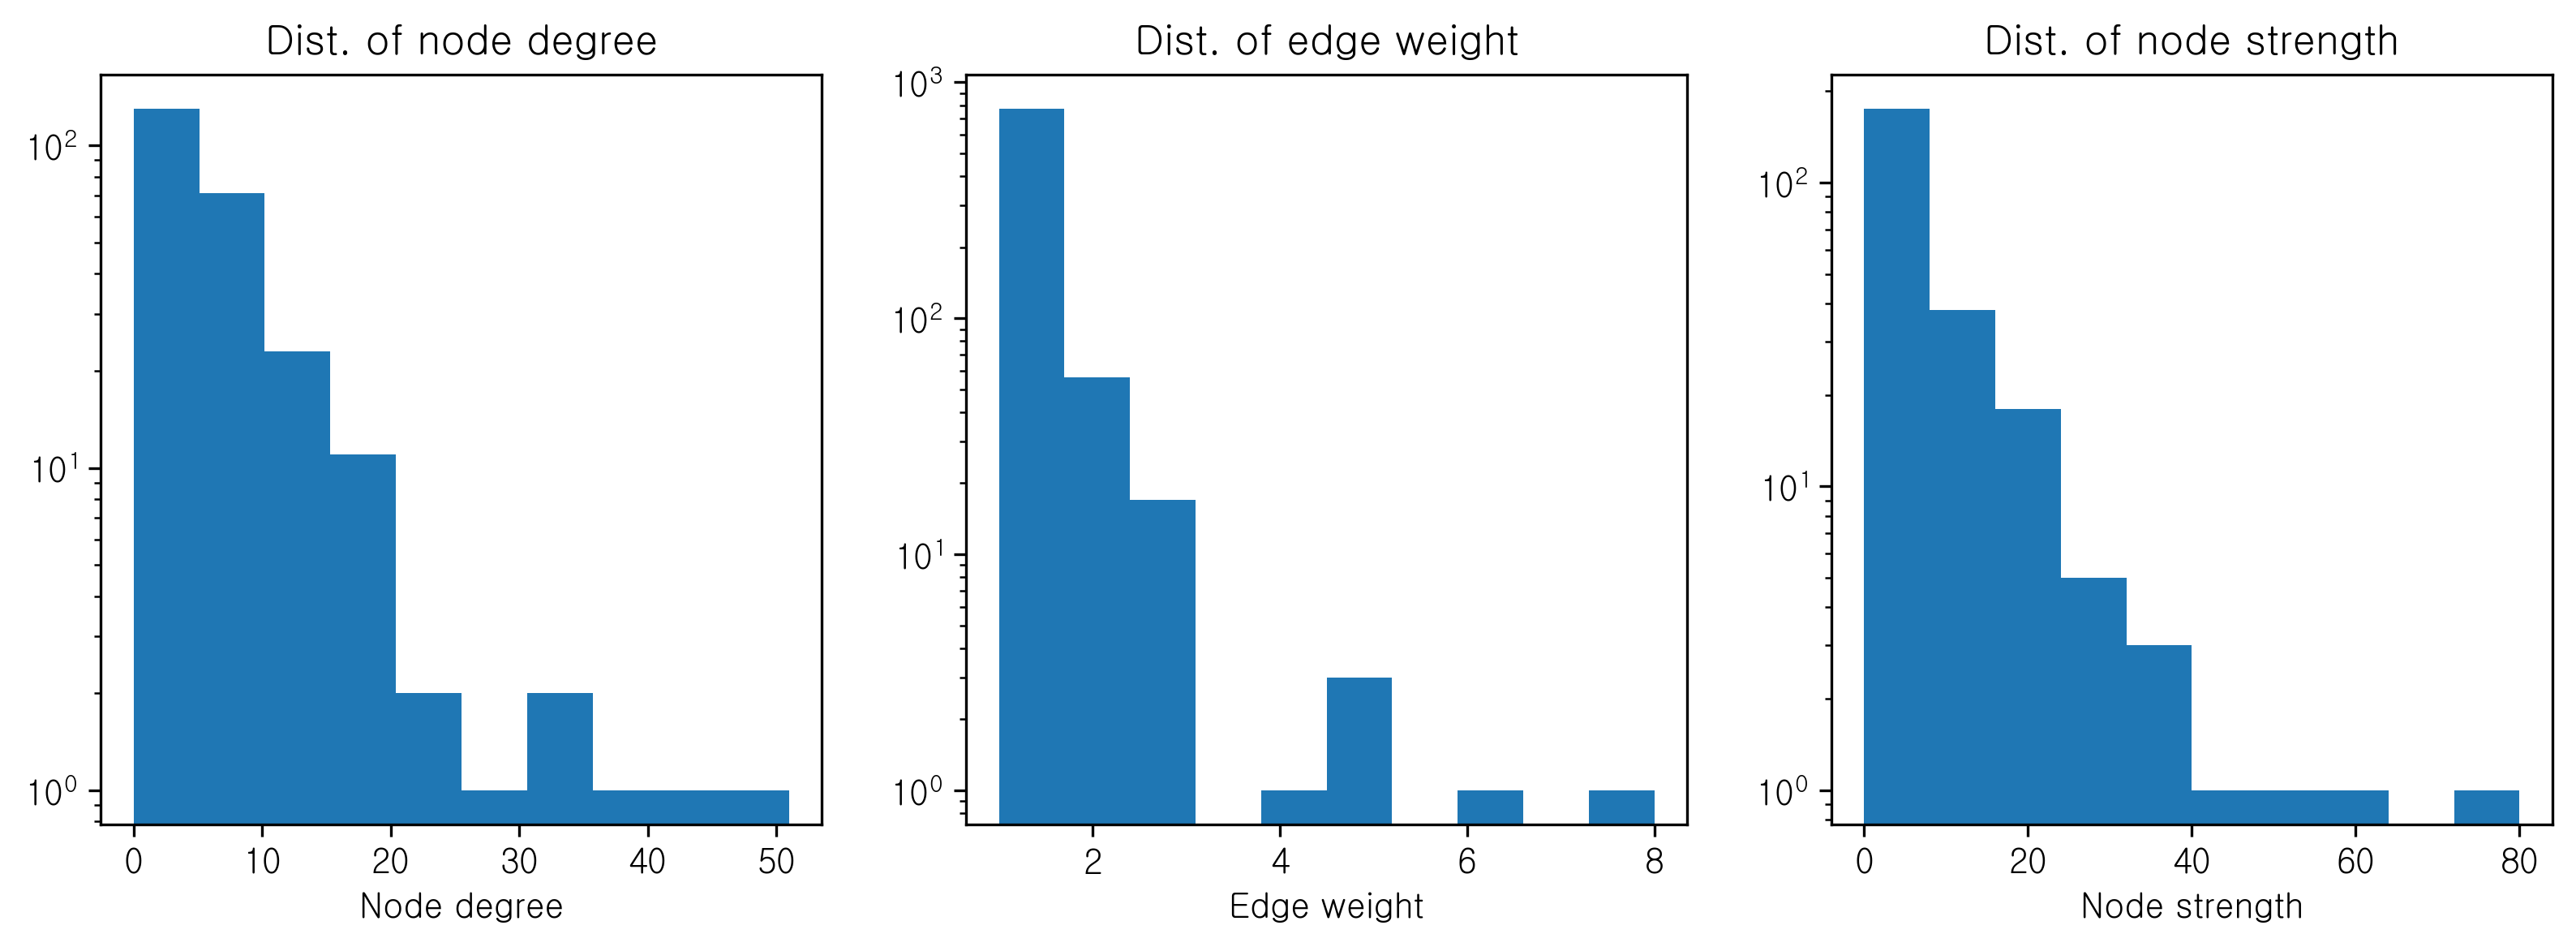

In [14]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

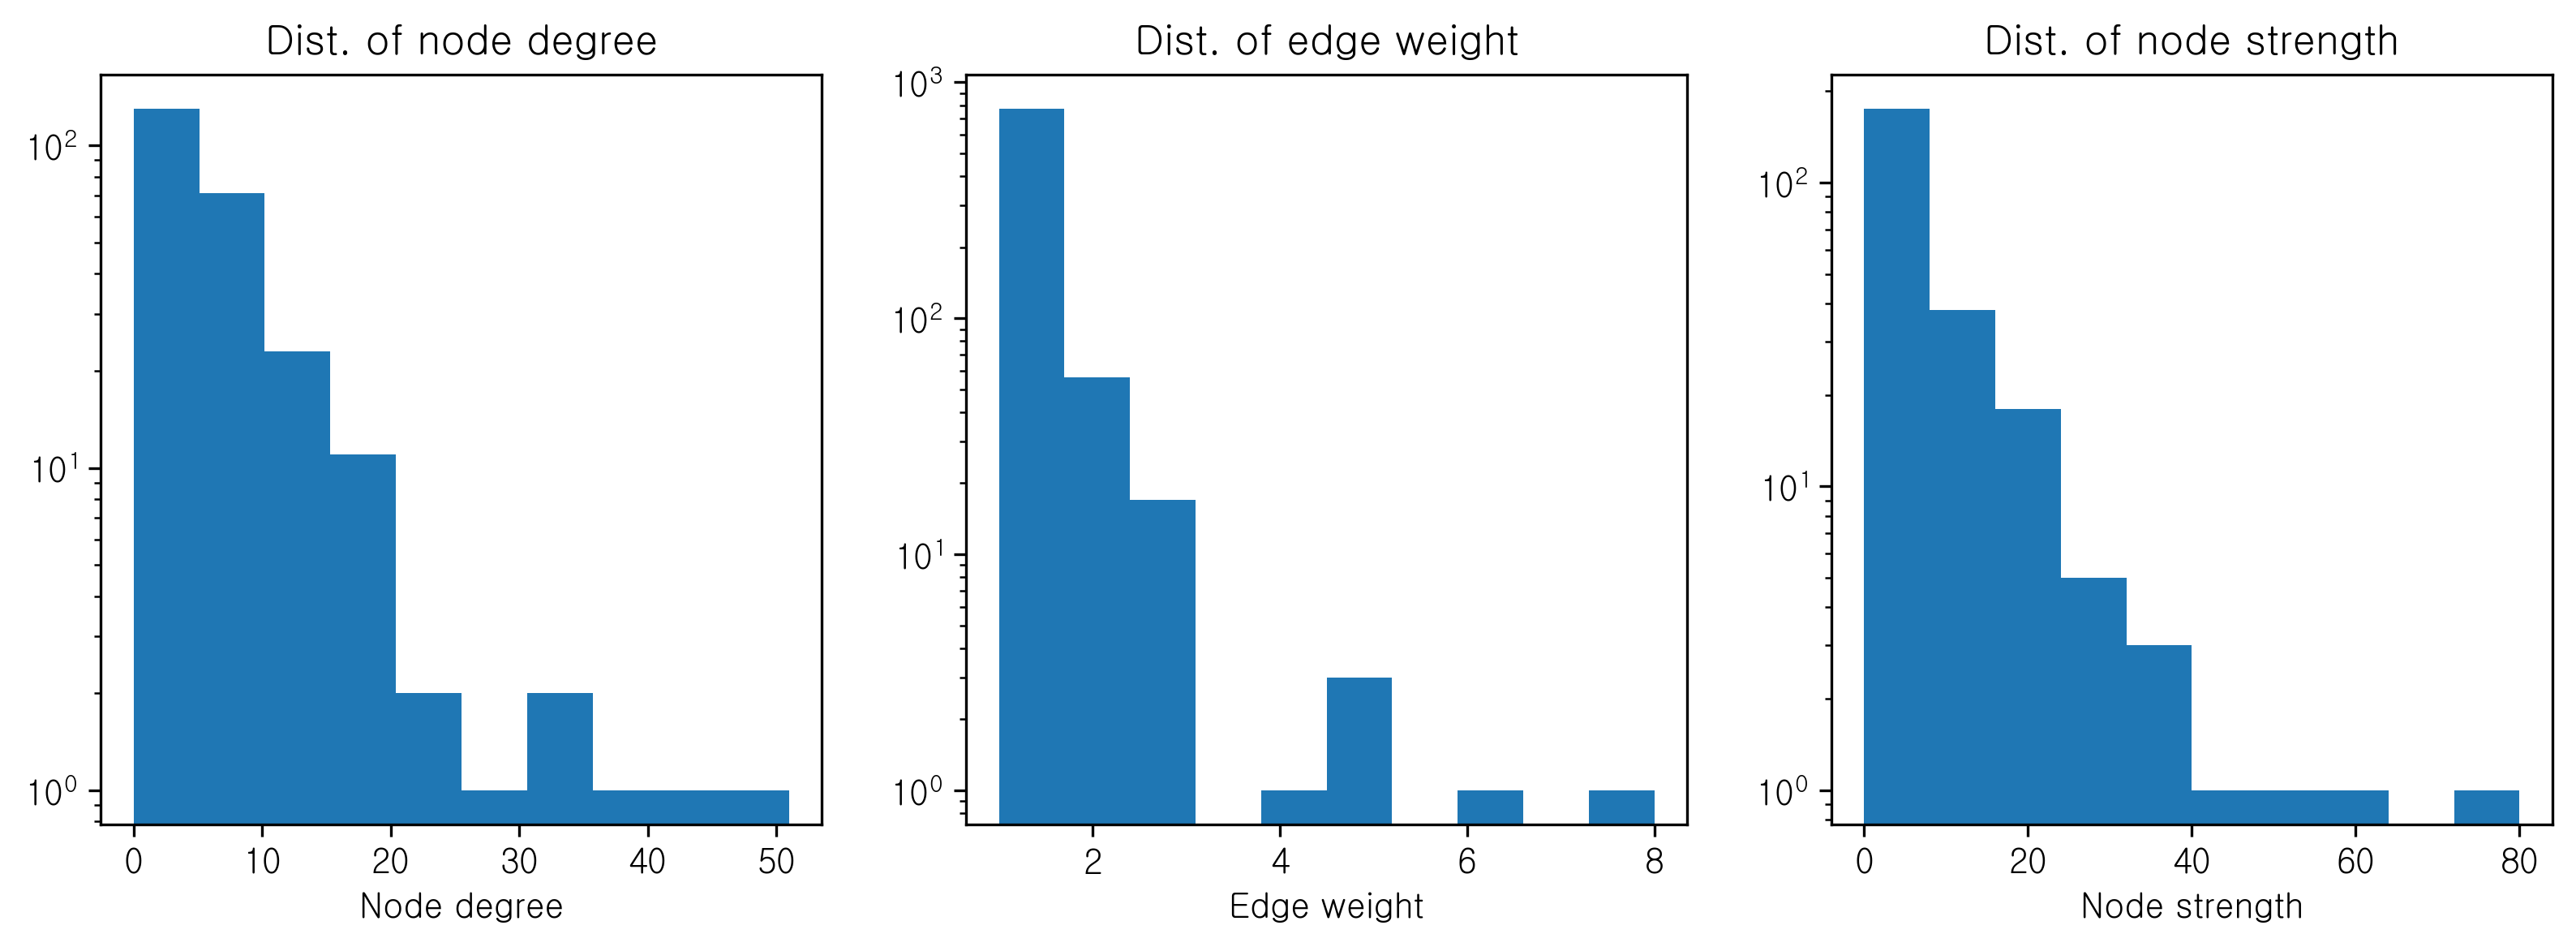

In [15]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions


Calculating best minimal value for power law fit
2: Pass, 4.0781267593571275

Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


3: Pass, 3.453916657685464

Calculating best minimal value for power law fit


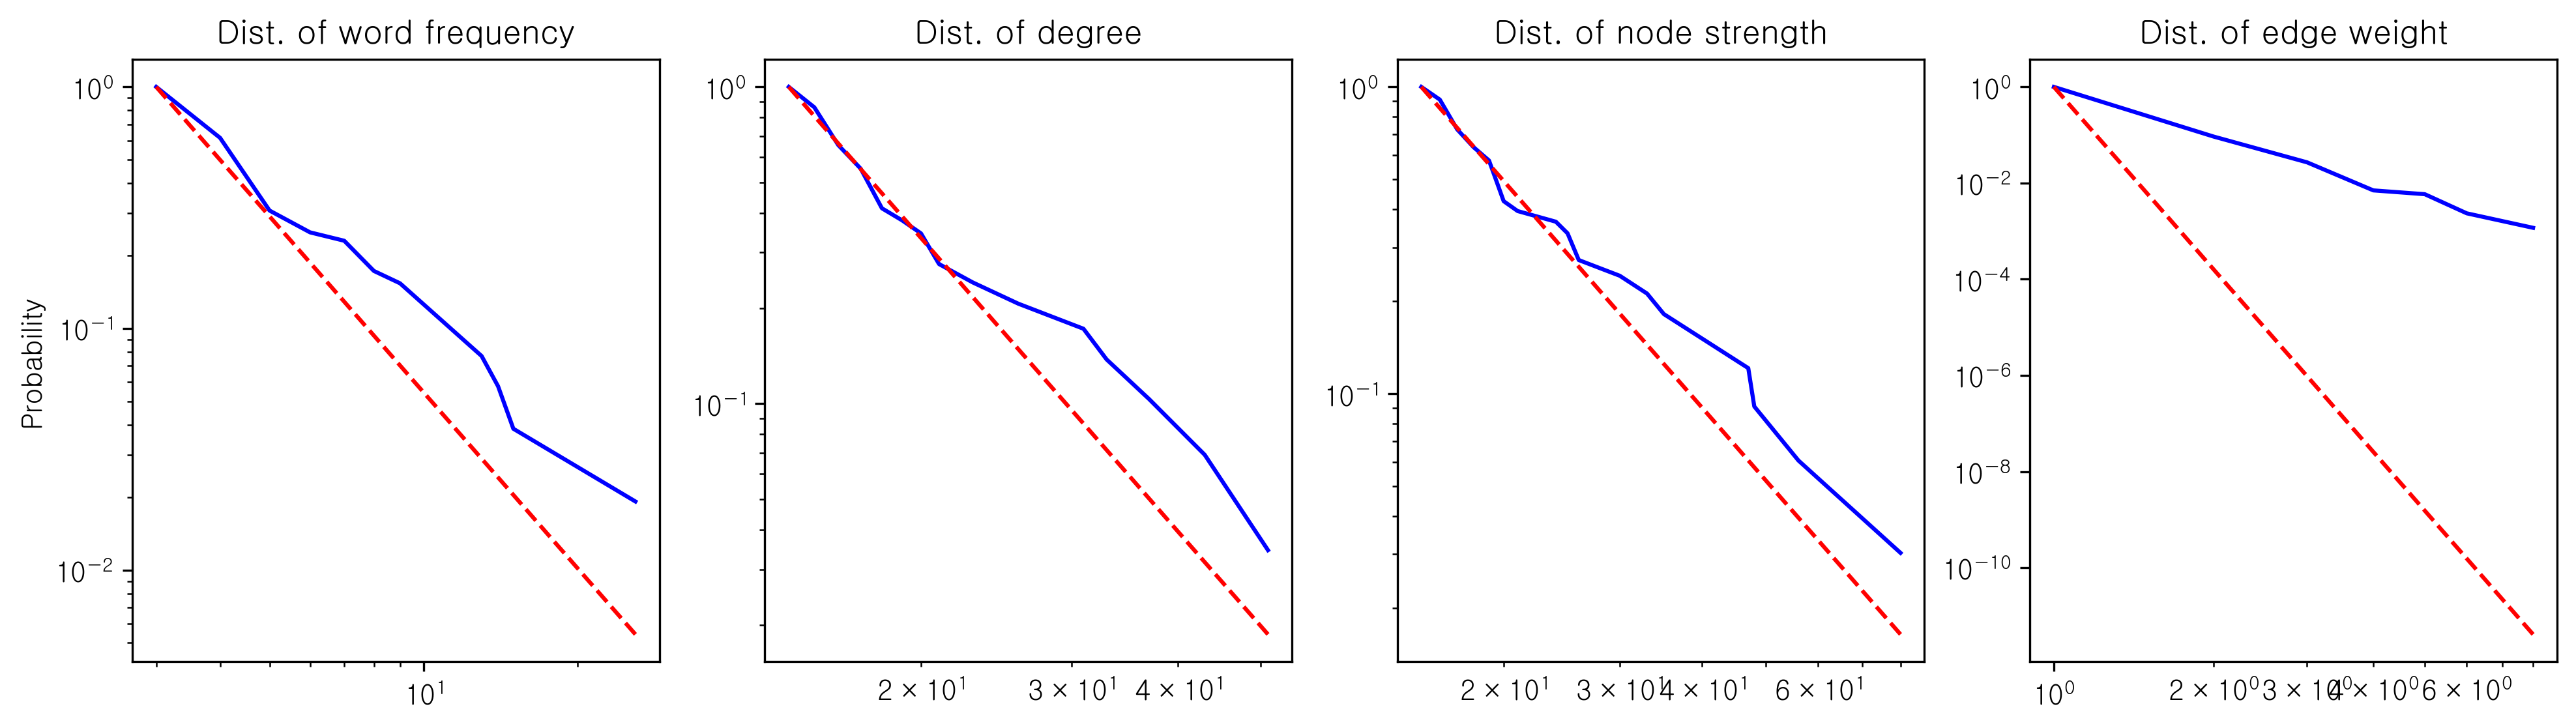

In [16]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [17]:
df = info(G)
df.head(20)

Node_F  Node Frequency            Node_ND  Node Degree  \
0              Object            26.0             Object         51.0   
1              Matter            15.0              Light         43.0   
2               Light            14.0             Matter         37.0   
3              Motion            13.0             Motion         33.0   
4               Force             9.0             Energy         31.0   
5               Phase             9.0          Transform         26.0   
6                 Gas             9.0               Heat         23.0   
7              Energy             9.0              Force         21.0   
8                 Act             8.0              Phase         20.0   
9         Temperature             7.0          Direction         20.0   
10               Heat             7.0              Earth         19.0   
11          Transform             7.0  Mechanical_energy         18.0   
12  Mechanical_energy             6.0                Act         17.0   
13              Sound             5.0            Gravity         17.0   
14          Direction             5.0          Formation         17.0   
15              Earth             5.0        Interaction         17.0   
16           Transmit             4.0   Electric_current         16.0   
17             Volume             4.0   Conservation_law         16.0   
18           Pressure             4.0       Interference         16.0   
19            Reflect             4.0                Gas         15.0   

              Node_NS  Node Strength                   Edge  Edge Weight  \
0              Object           80.0       (Object, Motion)            8   
1               Light           56.0        (Force, Object)            6   
2              Motion           48.0           (Force, Act)            5   
3              Matter           47.0          (Object, Act)            5   
4               Force           35.0        (Matter, Phase)            5   
5              Energy           35.0    (Energy, Transform)            4   
6           Transform           33.0     (Force, Direction)            3   
7                 Act           30.0        (Object, Light)            3   
8               Phase           26.0         (Object, Time)            3   
9                Heat           25.0        (Matter, Light)            3   
10          Direction           25.0          (Gas, Volume)            3   
11  Mechanical_energy           24.0        (Gas, Pressure)            3   
12                Gas           21.0     (Act, Equilibrium)            3   
13            Element           20.0          (Act, Motion)            3   
14        Temperature           19.0     (Volume, Pressure)            3   
15            Gravity           19.0  (Volume, Temperature)            3   
16   Conservation_law           19.0       (Light, Reflect)            3   
17          Formation           19.0    (Light, Refraction)            3   
18              Earth           19.0         (Lens, Mirror)            3   
19   Electric_current           18.0      (Motion, Gravity)            3   

              Node_BC  Betweenness Centrality  
0               Light                0.298037  
1              Object                0.287116  
2              Matter                0.188850  
3              Motion                0.148757  
4              Energy                0.146563  
5               Phase                0.118867  
6           Transform                0.116714  
7                Heat                0.113137  
8        Interference                0.092395  
9            Transmit                0.085750  
10              Force                0.085629  
11              Earth                0.082407  
12          Direction                0.081177  
13  Mechanical_energy                0.078189  
14              Sound                0.071734  
15        Interaction                0.071201  
16                Act                0.068102  
17      Semiconducto

# 초3-6

C:\Users\user\AppData\Local\Temp\ipykernel_36592\1875973532.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_36592\1875973532.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


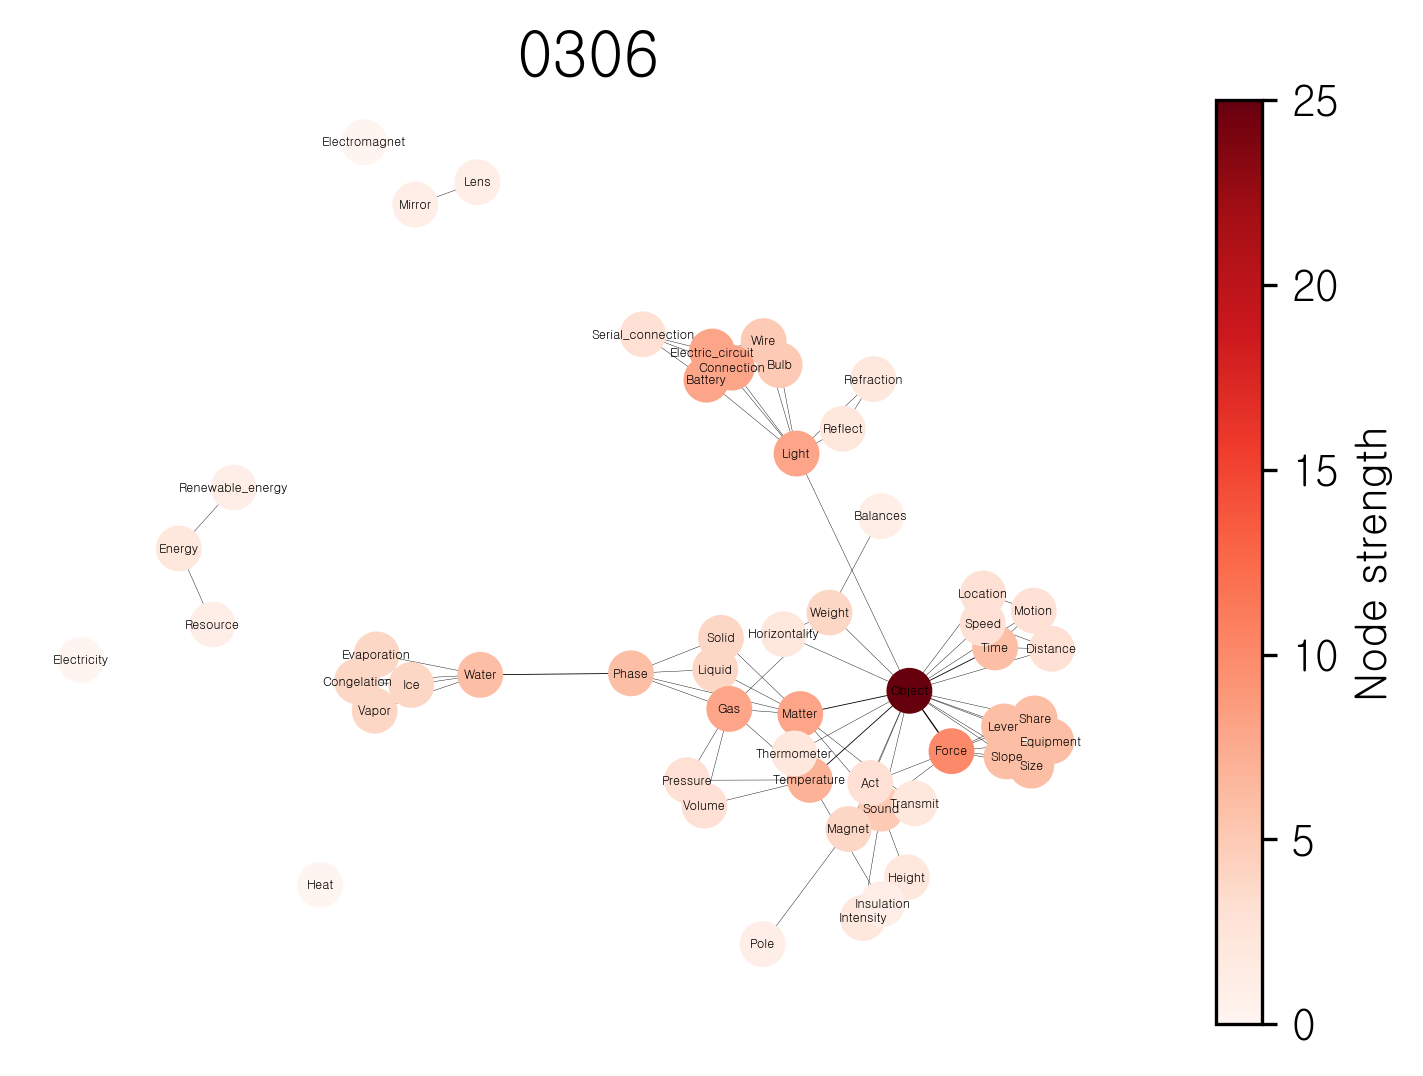

In [18]:
subject_graph(3, file_lst[0], '0306')

In [19]:
G = graph(3, file_lst[0])

In [20]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 54
Number of edges: 107
WordFreq avg: 1.76, WordFreq std: 1.71
Degree avg: 3.96, Degree std: 3.06
NodeWeight avg: 4.3, NodeWeight std: 3.76
EdgeWeight avg: 1.08, EdgeWeight std: 0.31


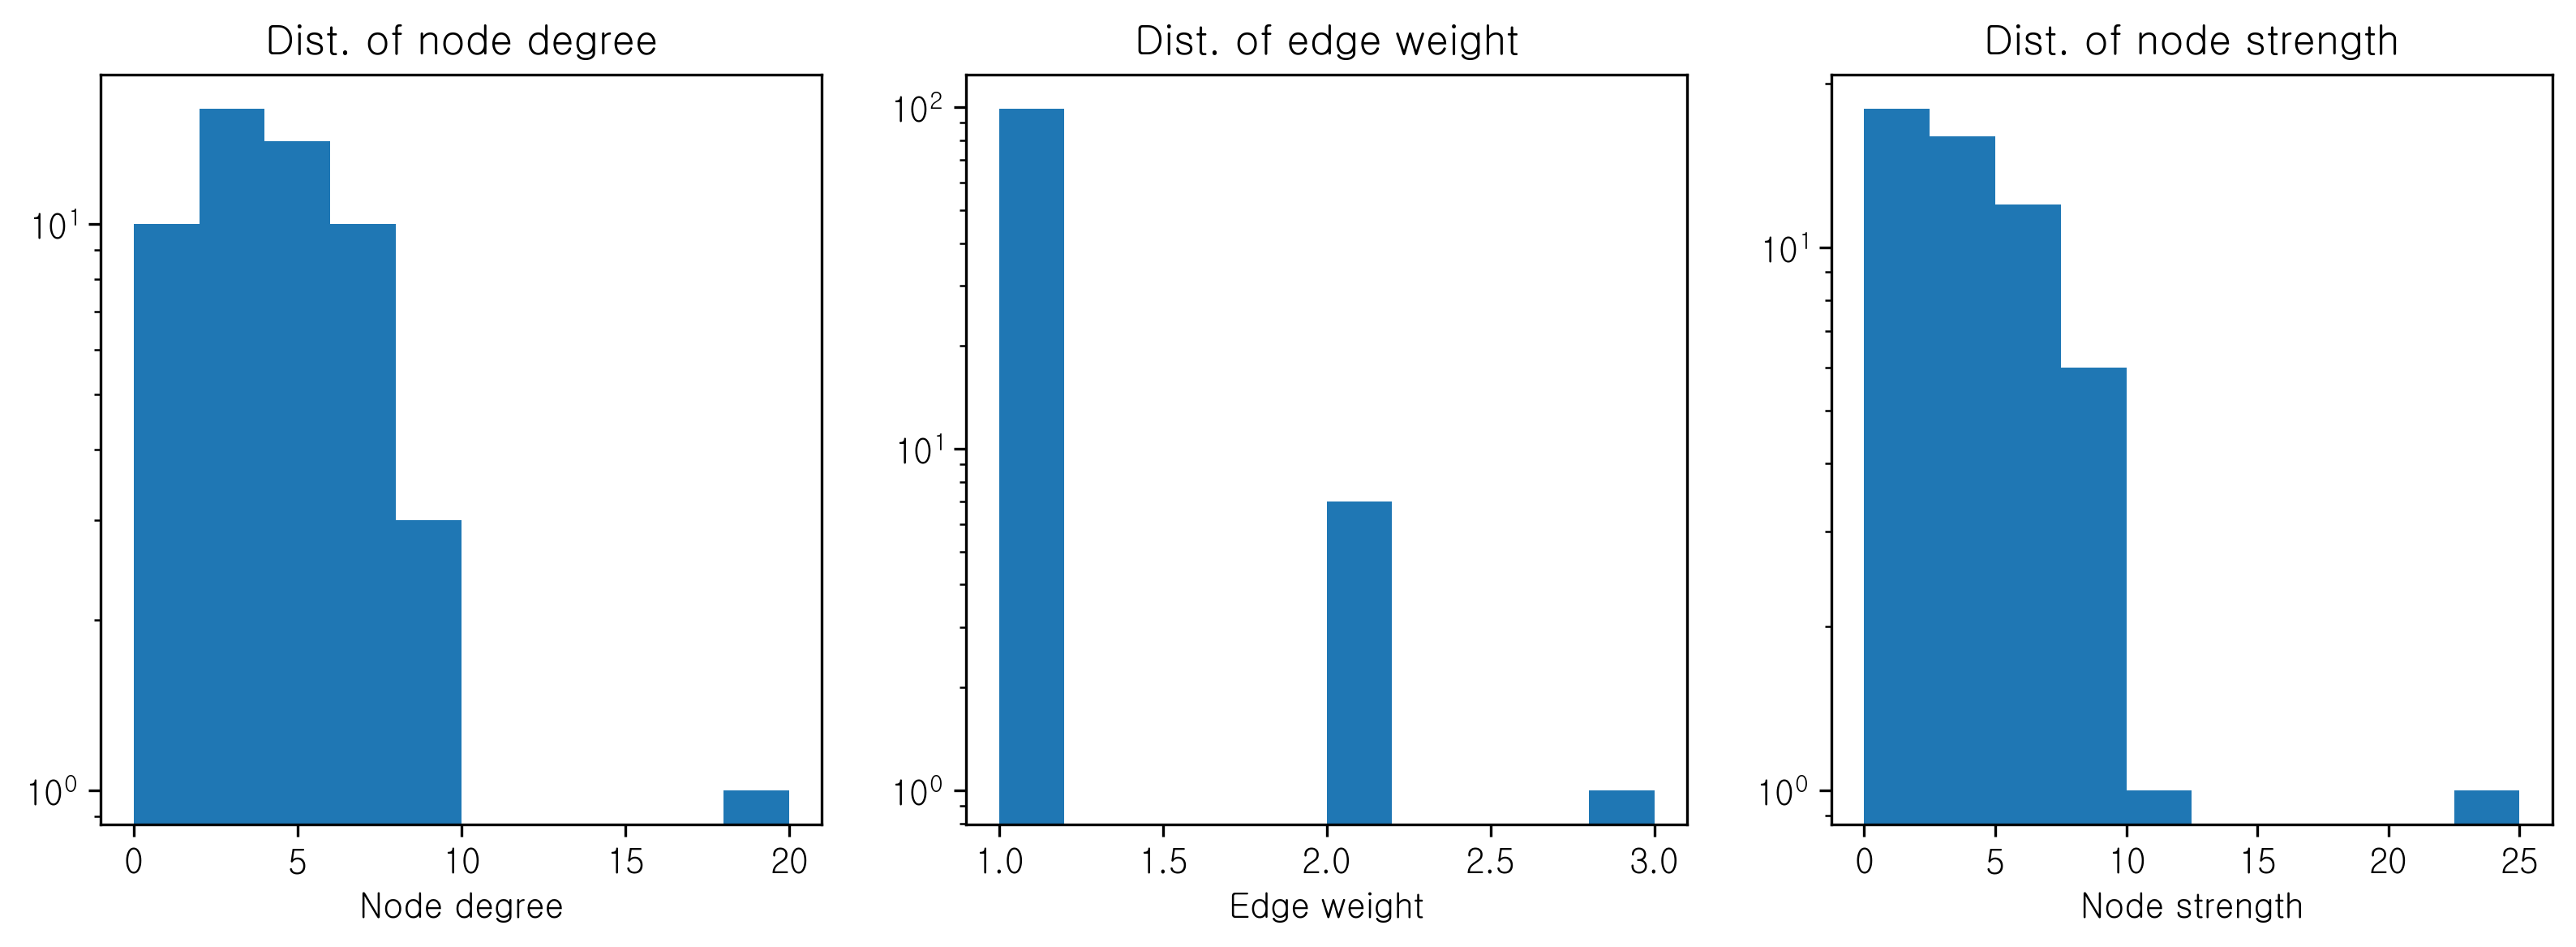

In [21]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Calculating best minimal value for power law fit


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


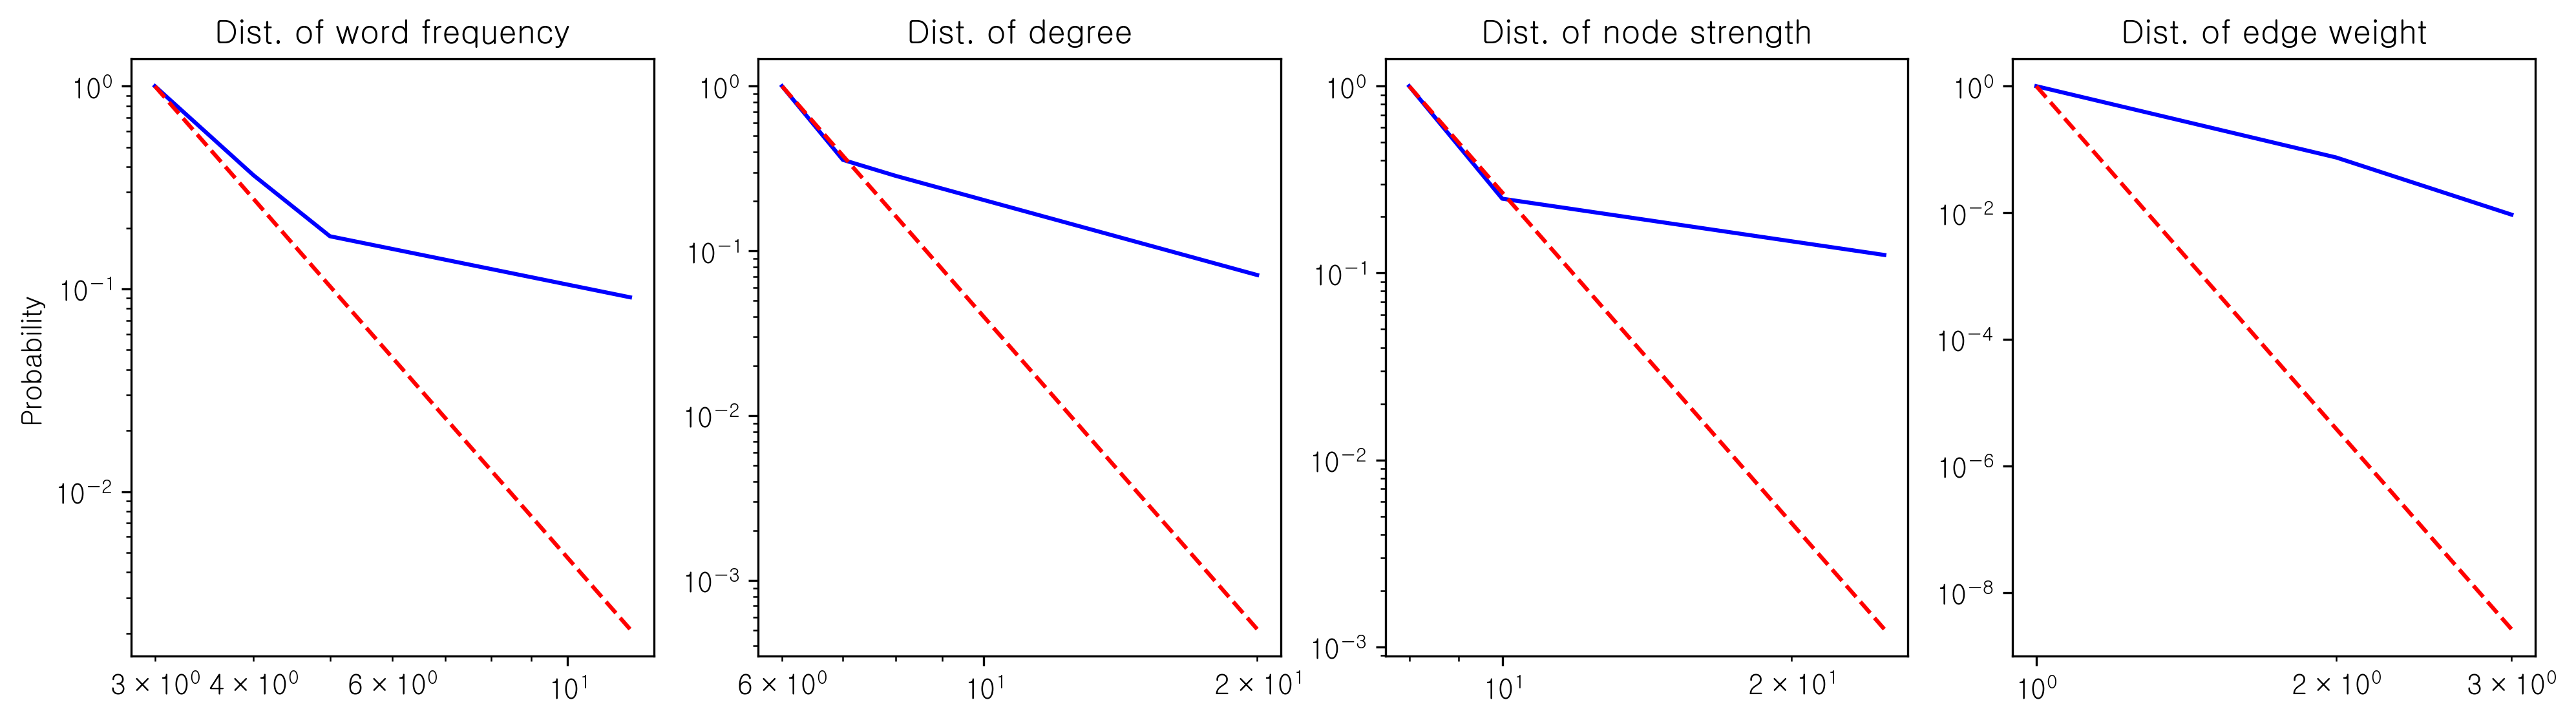

In [22]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [23]:
df = info(G)
df.head(10)

Node_F  Node Frequency    Node_ND  Node Degree           Node_NS  \
0       Object            12.0     Object         20.0            Object   
1          Gas             5.0      Force          8.0             Force   
2       Matter             4.0        Gas          8.0            Matter   
3  Temperature             4.0      Light          8.0               Gas   
4        Force             3.0     Matter          7.0             Light   
5       Weight             3.0       Size          6.0        Connection   
6        Phase             3.0  Equipment          6.0           Battery   
7        Sound             3.0      Slope          6.0  Electric_circuit   
8       Magnet             3.0      Lever          6.0       Temperature   
9        Water             3.0      Share          6.0              Size   

   Node Strength                            Edge  Edge Weight      Node_BC  \
0           25.0                 (Force, Object)            3       Object   
1           10.0                (Object, Matter)            2        Light   
2            8.0           (Object, Temperature)            2       Matter   
3            8.0                  (Object, Time)            2          Gas   
4            8.0                  (Phase, Water)            2        Phase   
5            8.0           (Connection, Battery)            2  Temperature   
6            8.0  (Connection, Electric_circuit)            2        Water   
7            8.0     (Battery, Electric_circuit)            2        Sound   
8            7.0                   (Force, Size)            1       Weight   
9            6.0              (Force, Equipment)            1        Force   

   Betweenness Centrality  
0                0.788332  
1                0.313468  
2                0.295373  
3                0.255961  
4                0.236754  
5                0.206567  
6                0.166869  
7                0.154425  
8                0.125433  
9                0.114458

# 중1-3

C:\Users\user\AppData\Local\Temp\ipykernel_36592\1875973532.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_36592\1875973532.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


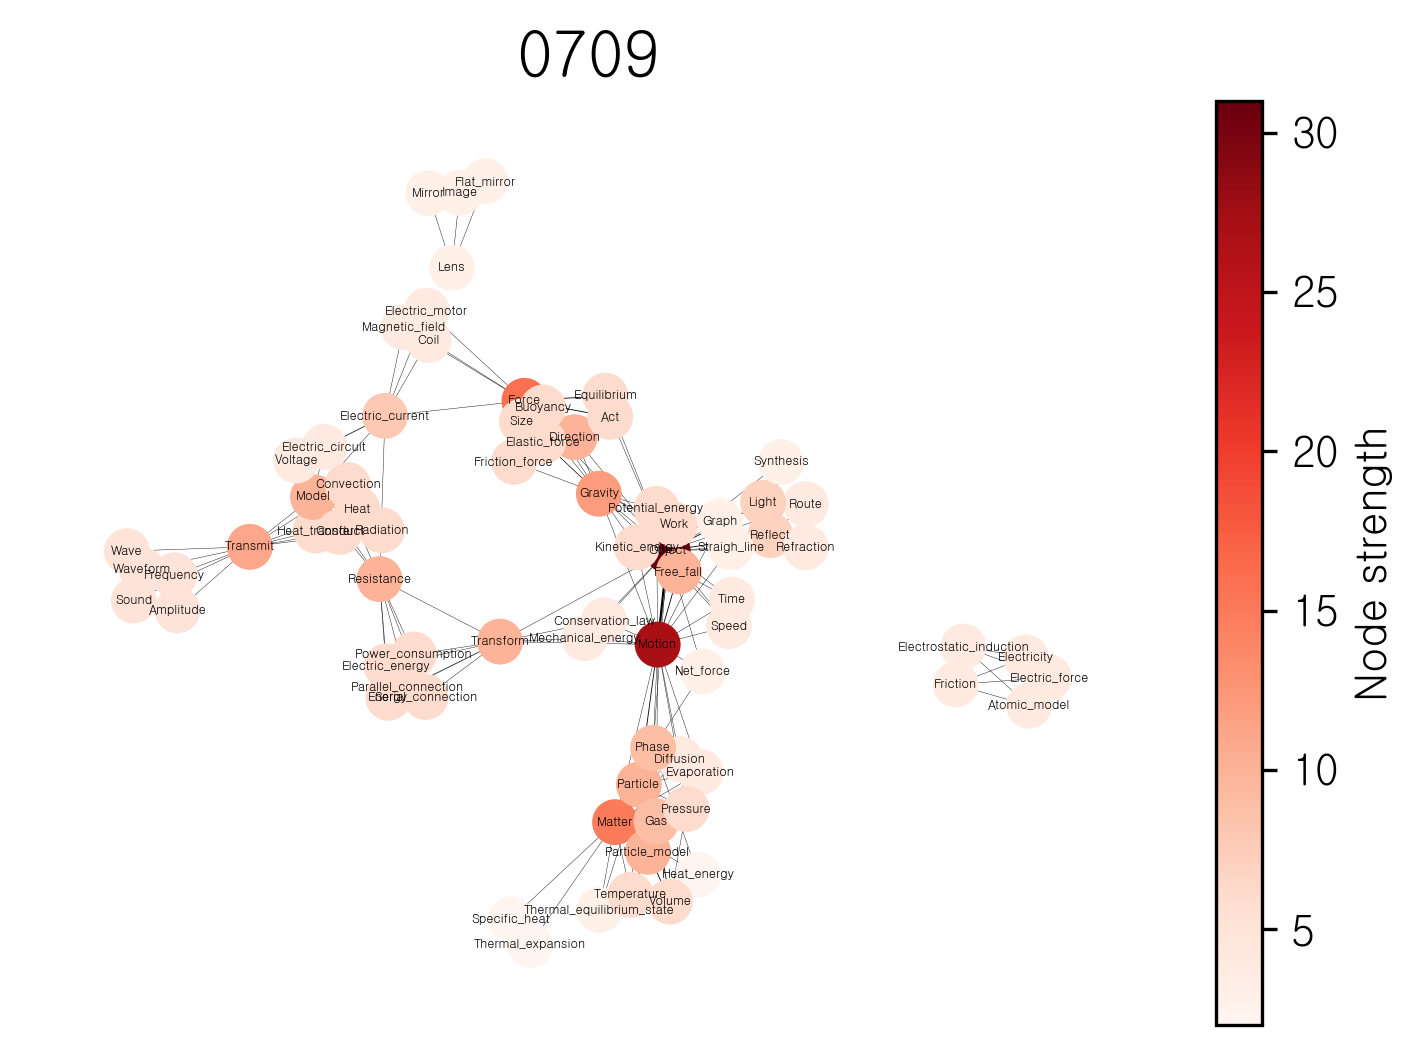

In [24]:
subject_graph(3, file_lst[1], '0709')

In [25]:
G = graph(3, file_lst[1])

In [26]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 75
Number of edges: 219
WordFreq avg: 1.61, WordFreq std: 1.33
Degree avg: 5.84, Degree std: 3.6
NodeWeight avg: 6.45, NodeWeight std: 4.67
EdgeWeight avg: 1.11, EdgeWeight std: 0.4


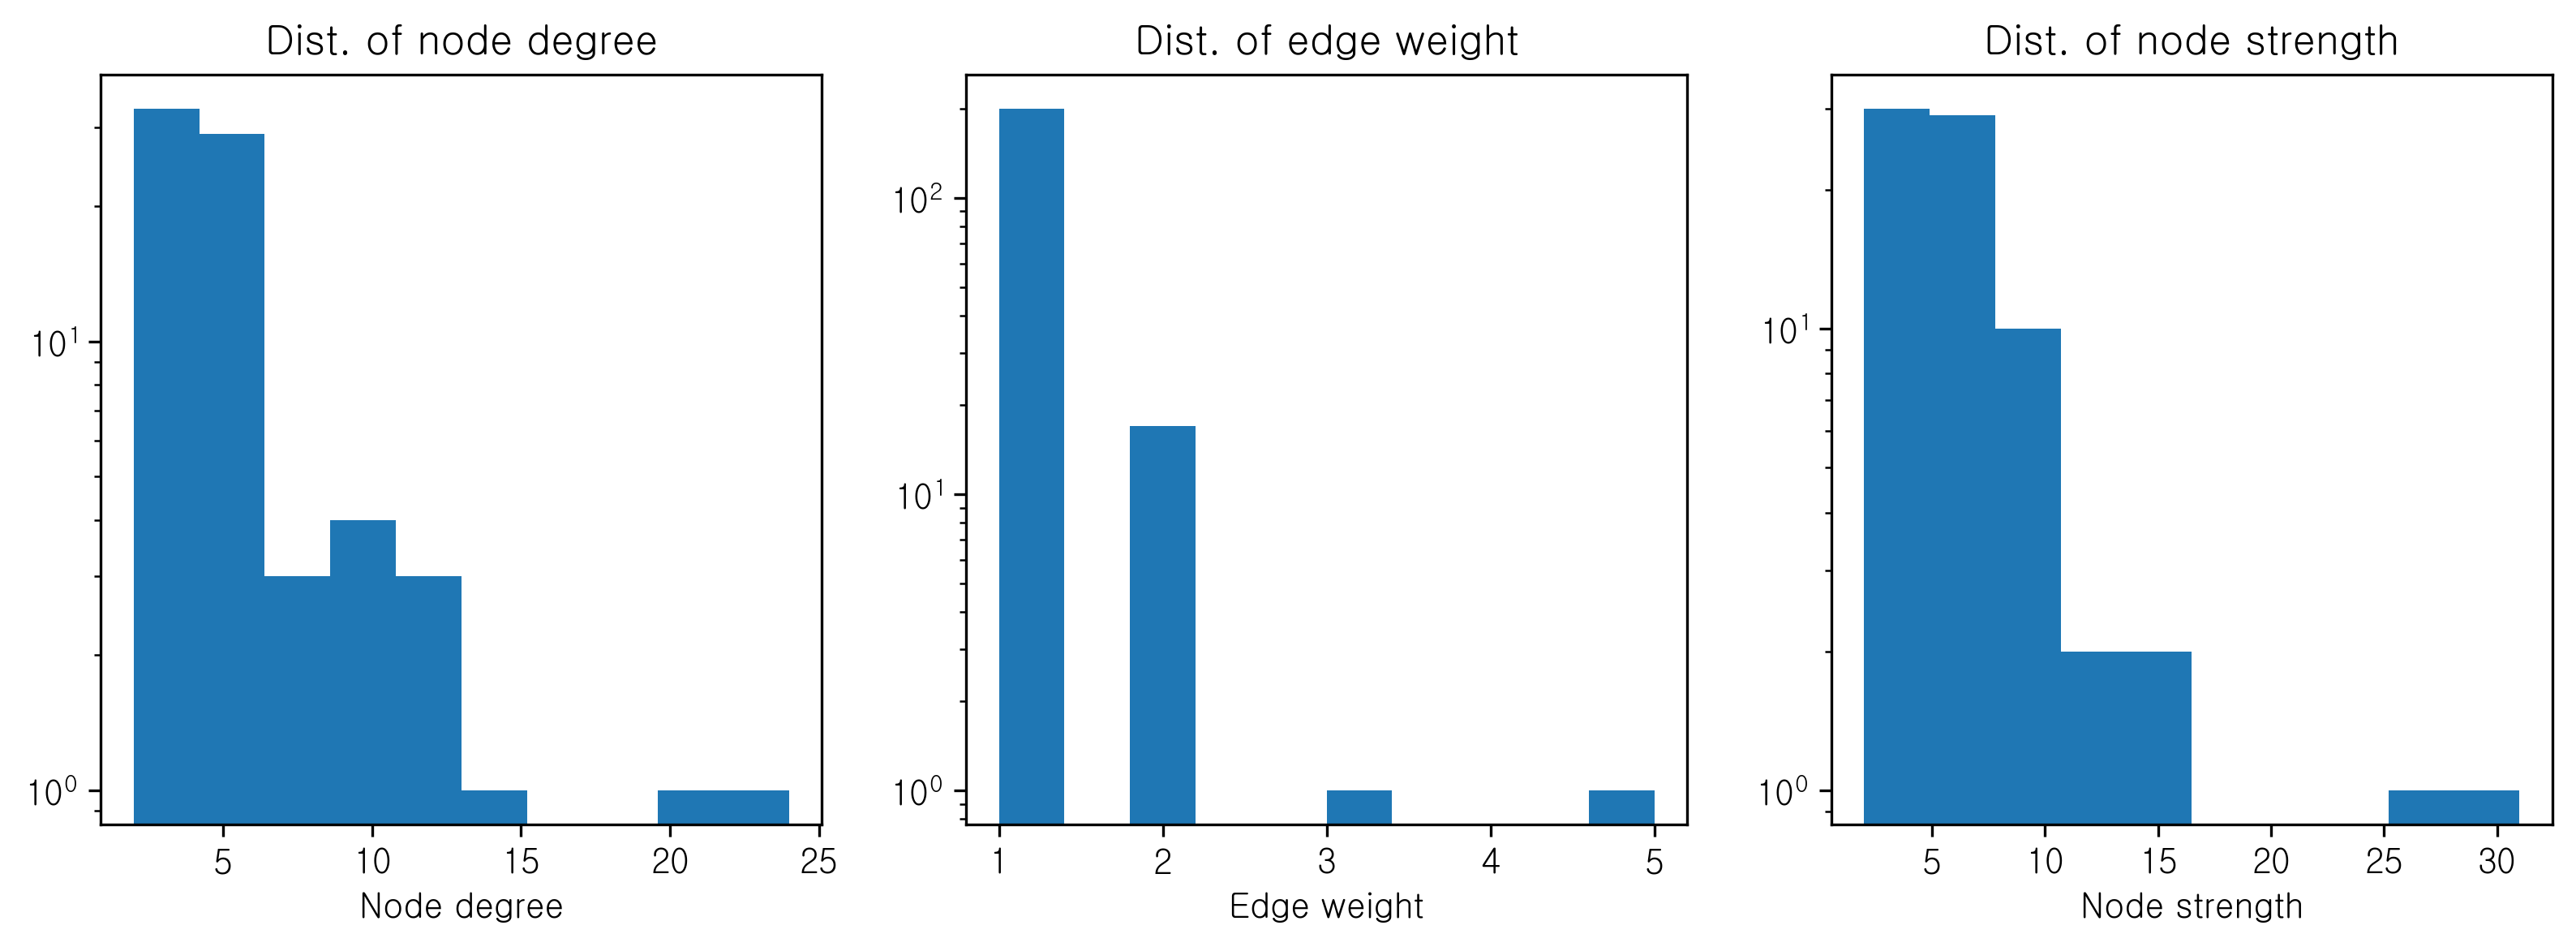

In [27]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that a

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


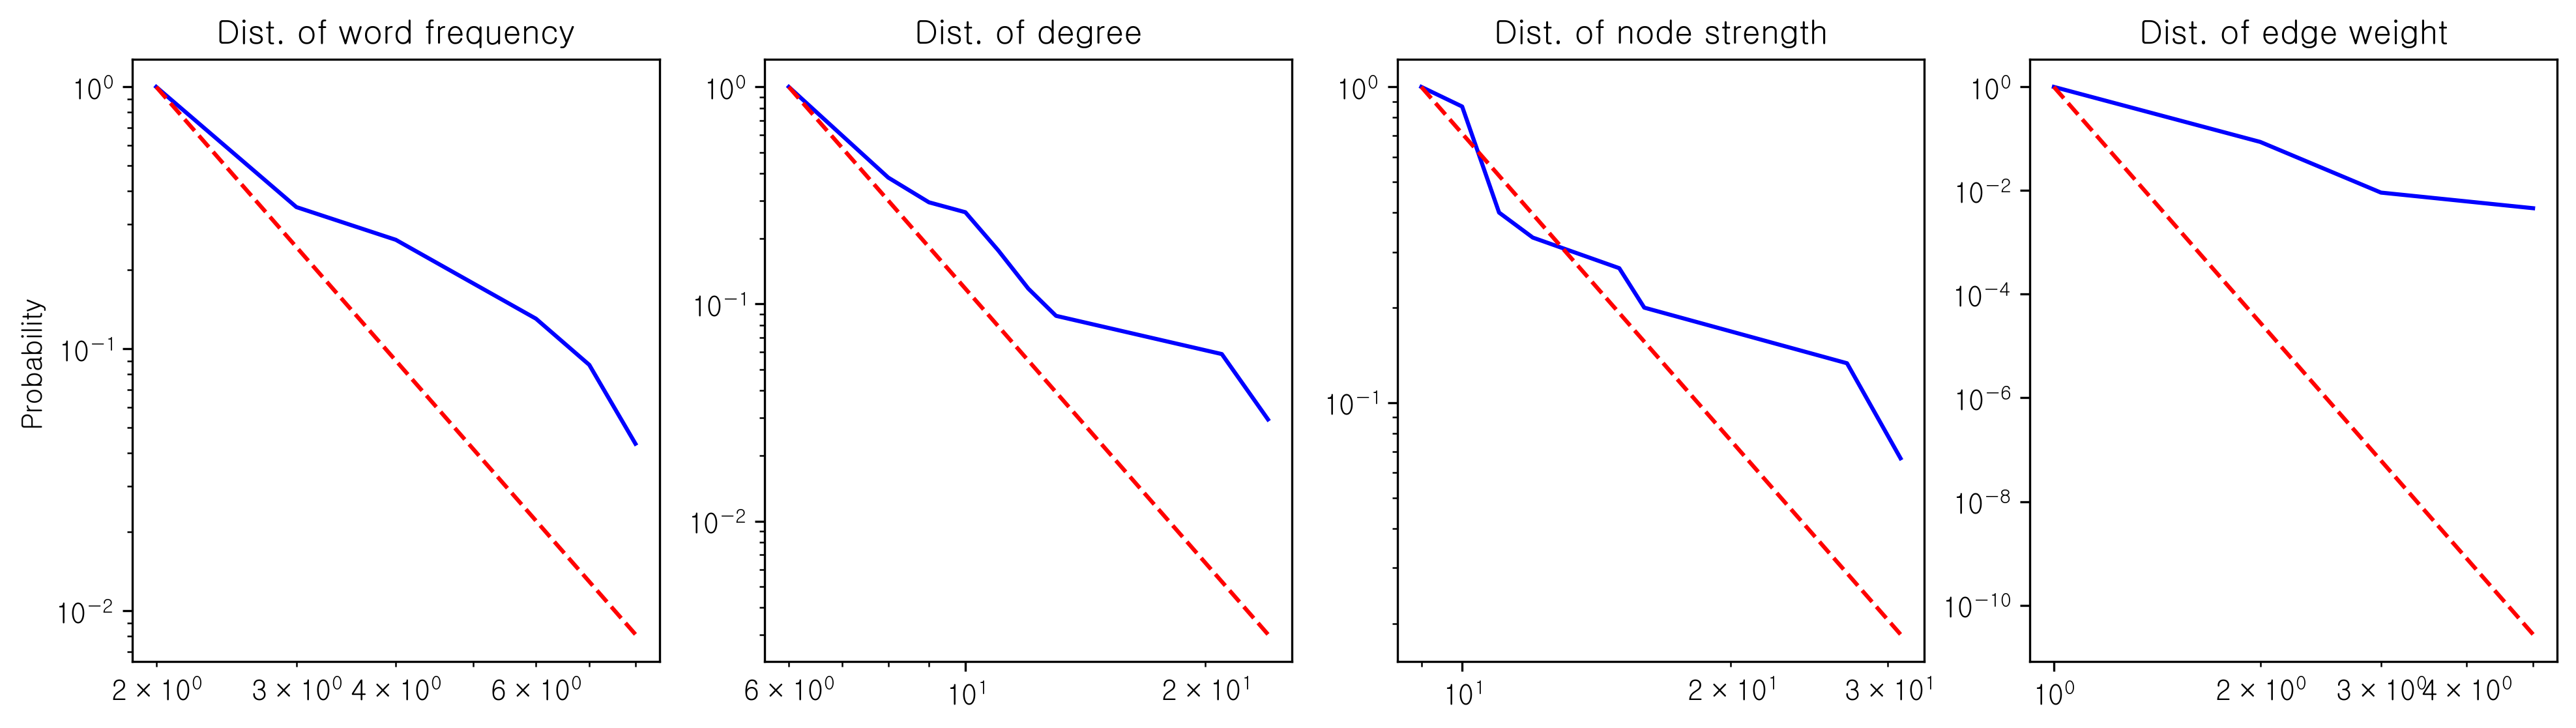

In [28]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [29]:
df = info(G)
df.head(20)

Node_F  Node Frequency           Node_ND  Node Degree  \
0             Object             8.0            Object         24.0   
1             Motion             7.0            Motion         21.0   
2             Matter             6.0             Force         13.0   
3              Phase             4.0           Gravity         12.0   
4     Particle_model             4.0            Matter         11.0   
5              Force             4.0          Transmit         11.0   
6           Particle             3.0             Model         10.0   
7                Gas             3.0        Resistance         10.0   
8        Temperature             2.0         Transform         10.0   
9           Transmit             2.0         Direction          9.0   
10             Model             2.0          Particle          8.0   
11         Direction             2.0  Electric_current          8.0   
12       Equilibrium             2.0         Free_fall          8.0   
13               Act             2.0       Temperature          6.0   
14           Gravity             2.0              Heat          6.0   
15          Pressure             2.0     Heat_transfer          6.0   
16            Volume             2.0         Radiation          6.0   
17             Light             2.0           Conduct          6.0   
18           Reflect             2.0        Convection          6.0   
19  Electric_current             2.0             Phase          6.0   

             Node_NS  Node Strength                                 Edge  \
0             Object           31.0                     (Motion, Object)   
1             Motion           27.0                      (Matter, Phase)   
2              Force           16.0                   (Matter, Particle)   
3             Matter           15.0             (Matter, Particle_model)   
4            Gravity           12.0                   (Particle, Motion)   
5           Transmit           11.0                  (Motion, Free_fall)   
6           Particle           10.0              (Phase, Particle_model)   
7              Model           10.0                (Particle_model, Gas)   
8     Particle_model           10.0             (Particle_model, Volume)   
9          Direction           10.0                      (Object, Light)   
10        Resistance           10.0                    (Object, Reflect)   
11         Transform           10.0                  (Object, Free_fall)   
12         Free_fall           10.0                   (Direction, Force)   
13             Phase            9.0                   (Equilibrium, Act)   
14               Gas            9.0                 (Equilibrium, Force)   
15  Electric_current            8.0                         (Act, Force)   
16             Light            7.0                      (Gas, Pressure)   
17           Reflect            7.0                        (Gas, Volume)   
18       Temperature            6.0                     (Light, Reflect)   
19              Heat            6.0  (Matter, Thermal_equilibrium_state)   

    Edge Weight            Node_BC  Betweenness Centrality  
0             5             Object                0.456678  
1             3             Motion                0.436328  
2             2              Model                0.315845  
3             2              Force                0.309820  
4             2          Transform                0.286417  
5             2         Resistance                0.264505  
6             2   Electric_current                0.258736  
7             2            Gravity                0.182138  
8             2           Transmit                0.164606  
9             2             Matter                0.157906  
10            2              Phase                0.108724  
11            2           Particle                0.091185  
12            2          Direction                0.090161  
13            2            Voltage                0.083579  
14        

# 통합과학

C:\Users\user\AppData\Local\Temp\ipykernel_36592\1875973532.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_36592\1875973532.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


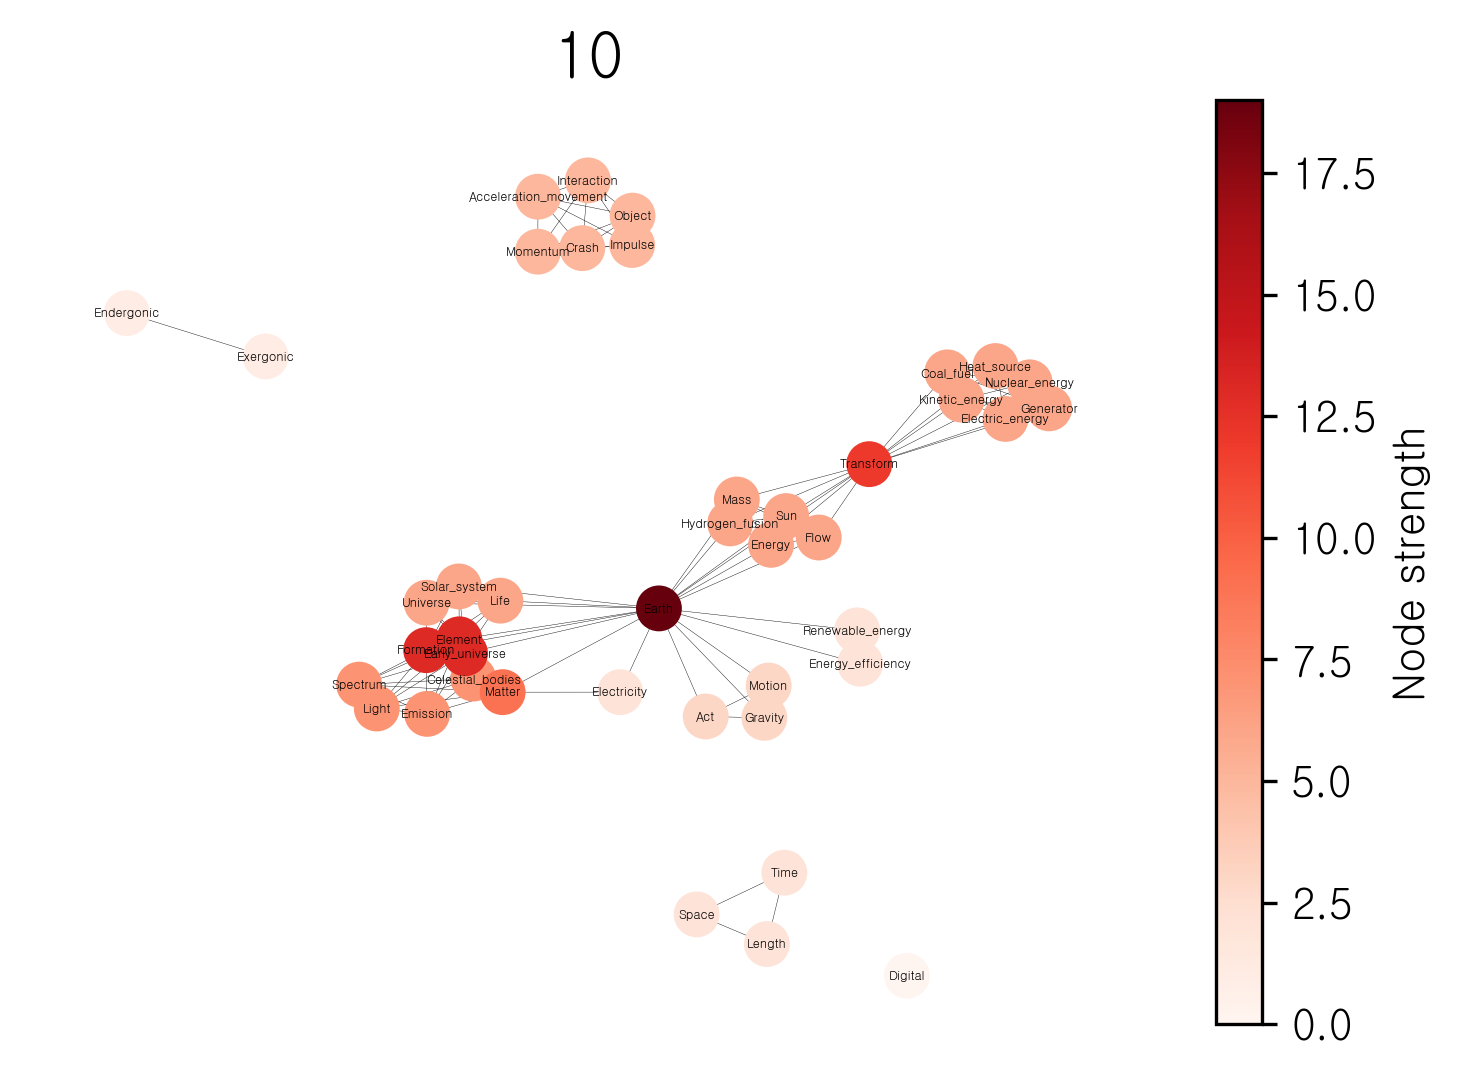

In [30]:
subject_graph(3, file_lst[2], '10')

In [31]:
G = graph(3, file_lst[2])

In [32]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 42
Number of edges: 119
WordFreq avg: 1.21, WordFreq std: 0.67
Degree avg: 5.67, Degree std: 3.46
NodeWeight avg: 5.81, NodeWeight std: 3.71
EdgeWeight avg: 1.03, EdgeWeight std: 0.16


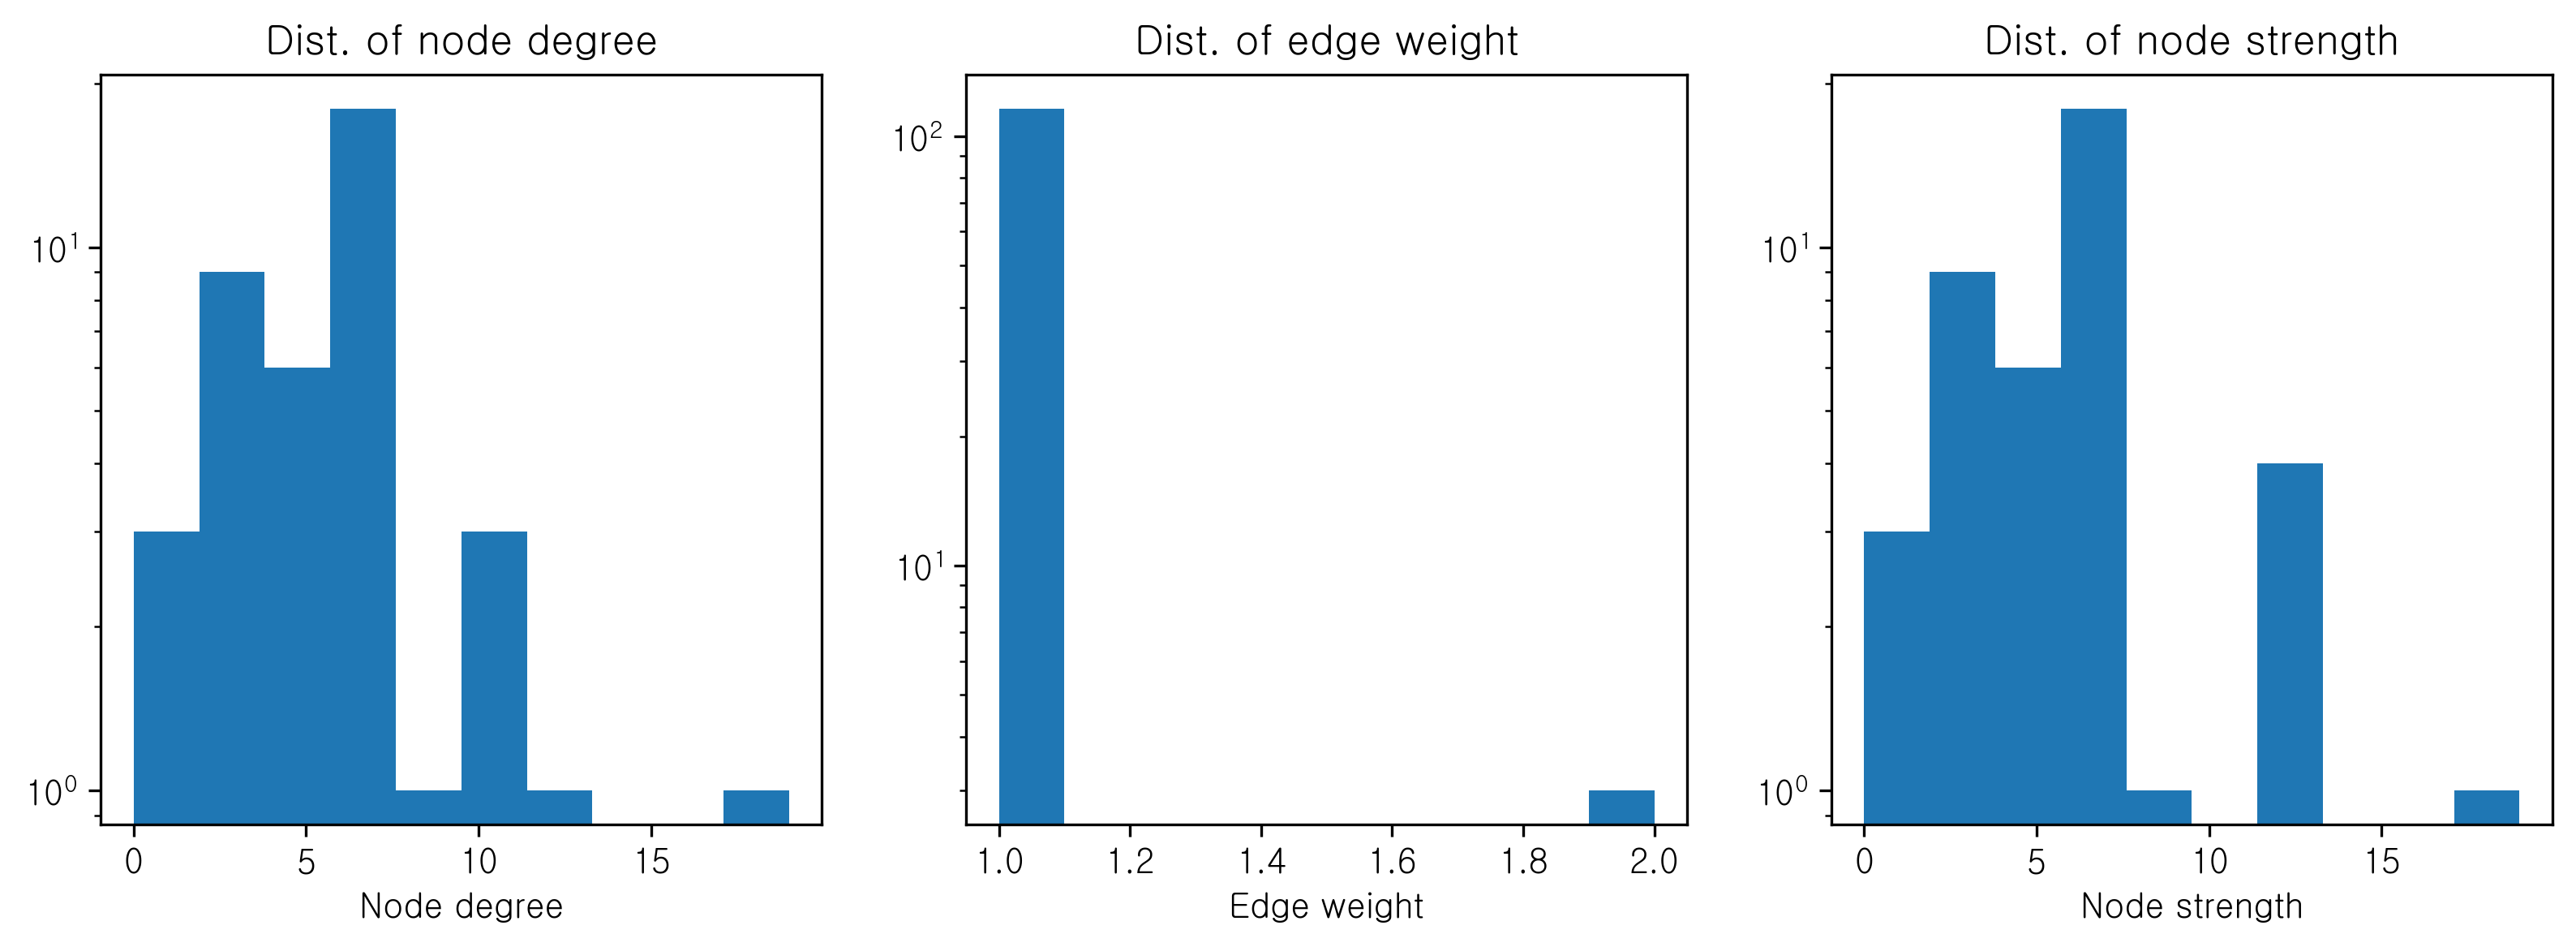

In [33]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested dist

Calculating best minimal value for power law fit


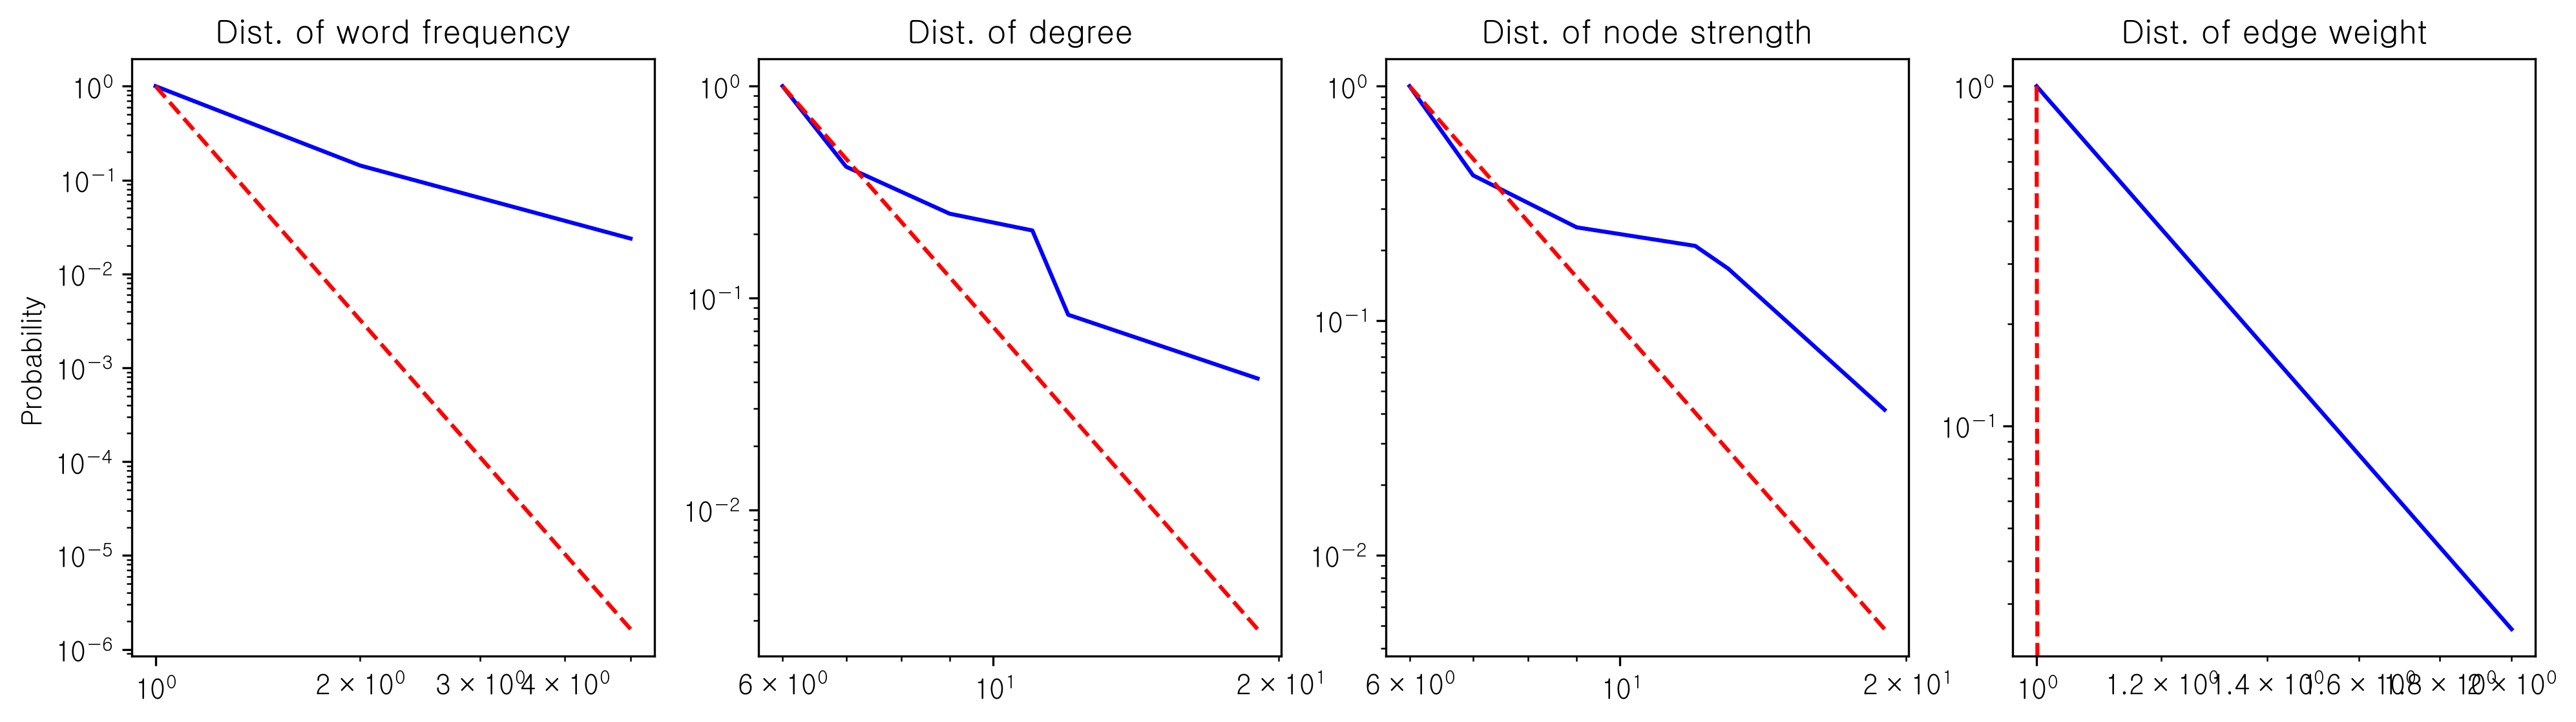

In [34]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [35]:
df = info(G)
df.head(20)

Node_F  Node Frequency           Node_ND  Node Degree  \
0              Earth             5.0             Earth         19.0   
1             Matter             2.0         Transform         12.0   
2            Element             2.0           Element         11.0   
3          Formation             2.0         Formation         11.0   
4     Early_universe             2.0    Early_universe         11.0   
5          Transform             2.0            Matter          9.0   
6             Length             1.0  Celestial_bodies          7.0   
7              Space             1.0          Emission          7.0   
8               Time             1.0             Light          7.0   
9            Digital             1.0          Spectrum          7.0   
10  Celestial_bodies             1.0              Life          6.0   
11          Emission             1.0      Solar_system          6.0   
12             Light             1.0          Universe          6.0   
13          Spectrum             1.0              Flow          6.0   
14              Life             1.0              Mass          6.0   
15      Solar_system             1.0            Energy          6.0   
16          Universe             1.0   Hydrogen_fusion          6.0   
17       Electricity             1.0               Sun          6.0   
18           Gravity             1.0   Electric_energy          6.0   
19               Act             1.0    Nuclear_energy          6.0   

             Node_NS  Node Strength                                Edge  \
0              Earth           19.0                (Element, Formation)   
1            Element           13.0           (Element, Early_universe)   
2          Formation           13.0         (Formation, Early_universe)   
3     Early_universe           13.0                     (Length, Space)   
4          Transform           12.0                      (Length, Time)   
5             Matter            9.0                       (Space, Time)   
6   Celestial_bodies            7.0          (Celestial_bodies, Matter)   
7           Emission            7.0         (Celestial_bodies, Element)   
8              Light            7.0        (Celestial_bodies, Emission)   
9           Spectrum            7.0       (Celestial_bodies, Formation)   
10              Life            6.0           (Celestial_bodies, Light)   
11      Solar_system            6.0  (Celestial_bodies, Early_universe)   
12          Universe            6.0        (Celestial_bodies, Spectrum)   
13              Flow            6.0                   (Matter, Element)   
14              Mass            6.0                  (Matter, Emission)   
15            Energy            6.0                 (Matter, Formation)   
16   Hydrogen_fusion            6.0                     (Matter, Light)   
17               Sun            6.0            (Matter, Early_universe)   
18   Electric_energy            6.0                  (Matter, Spectrum)   
19    Nuclear_energy            6.0                     (Matter, Earth)   

    Edge Weight          Node_BC  Betweenness Centrality  
0             2            Earth                0.713654  
1             2        Transform                0.380366  
2             2           Matter                0.131289  
3             1        Formation                0.127176  
4             1   Early_universe                0.127176  
5             1          Element                0.127176  
6             1             Mass                0.081633  
7             1             Flow                0.081633  
8             1              Sun                0.081633  
9             1  Hydrogen_fusion                0.081633  
10            1           Energy                0.081633  
11            1         Universe                0.064276  
12            1             Life                0.064276  
13            1     Solar_system                0.064276  
14            1  Electric_energy                0.045742  
15

# 물리학

C:\Users\user\AppData\Local\Temp\ipykernel_36592\2281605840.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_36592\2281605840.py:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


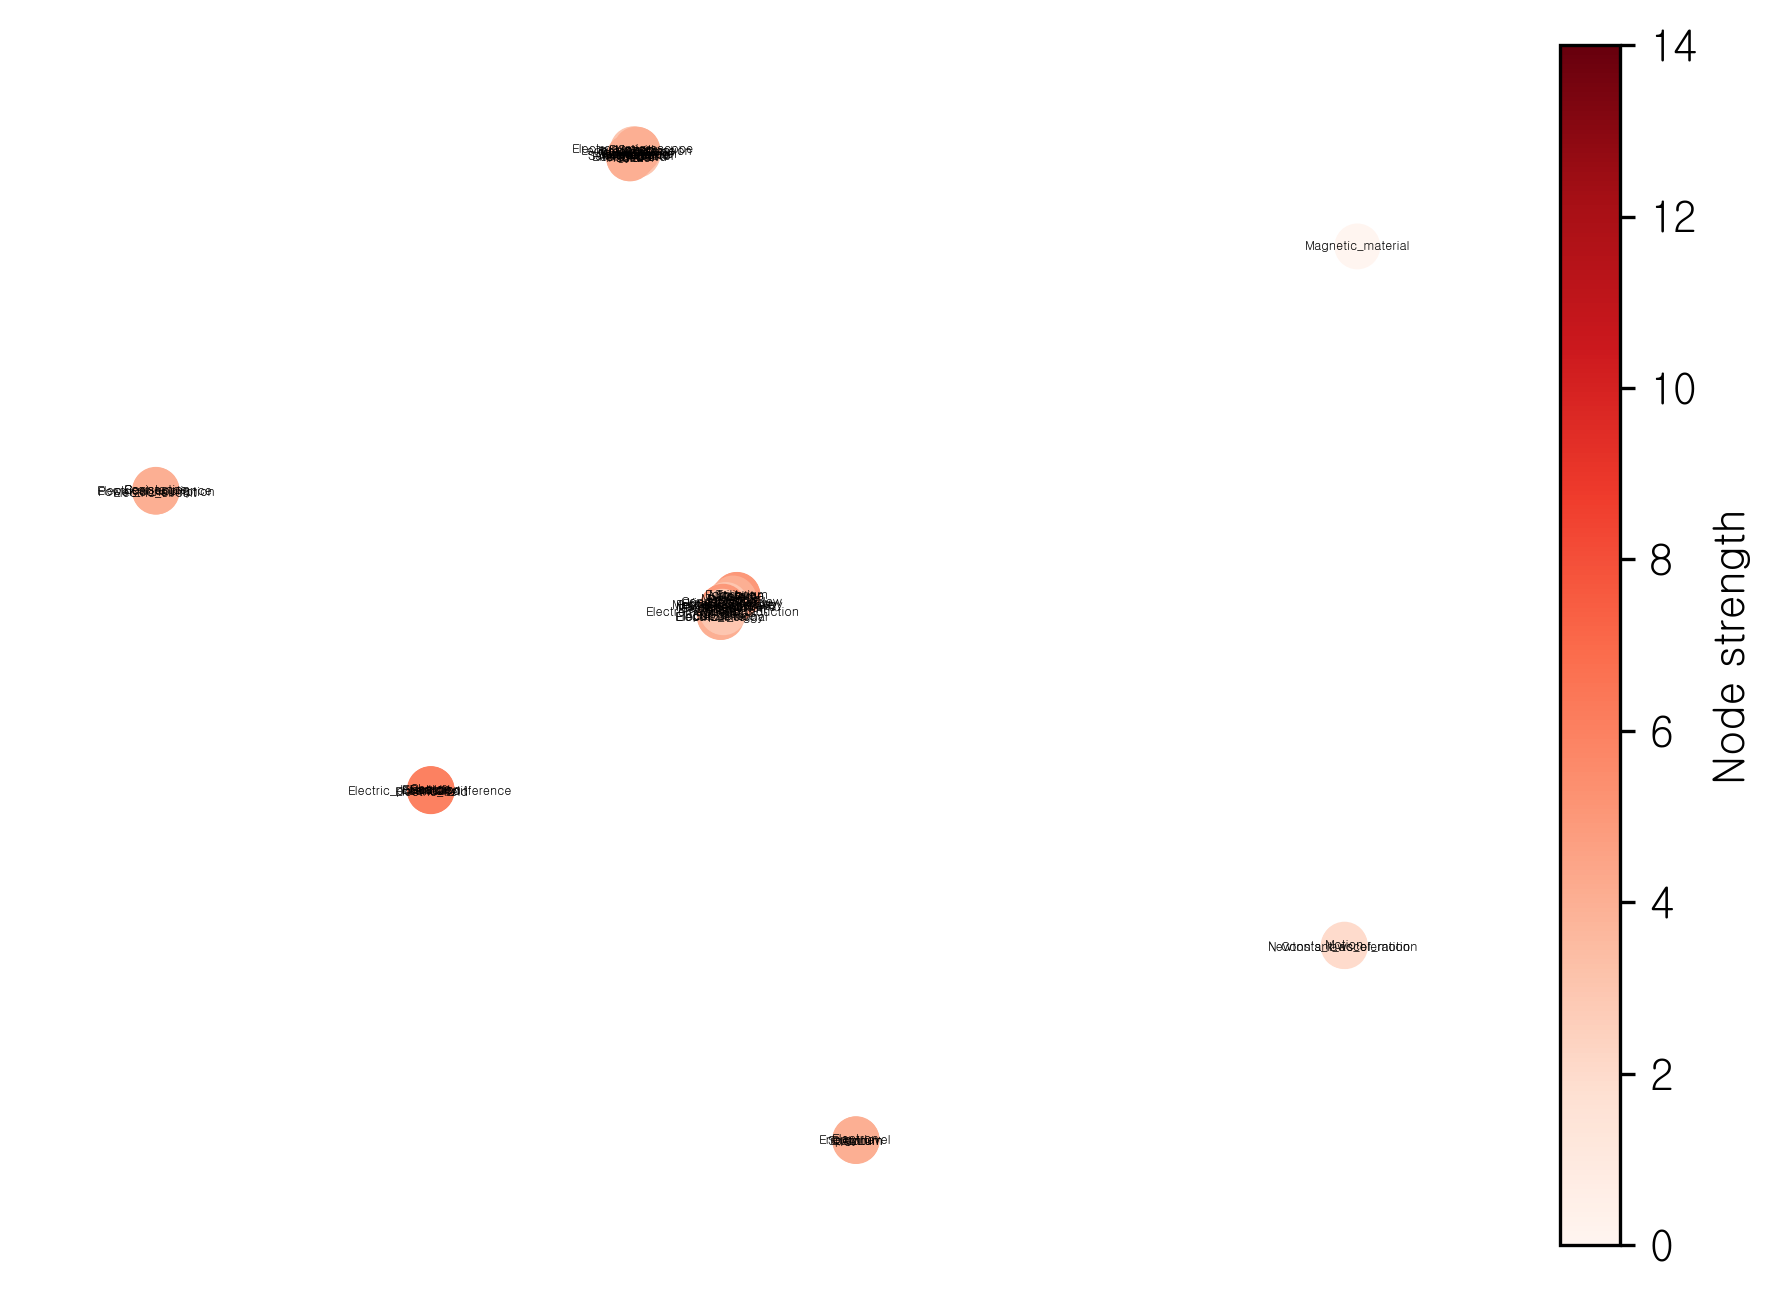

In [36]:
subject_graph_ver2(10000, 14, 1, file_lst[3])

C:\Users\user\AppData\Local\Temp\ipykernel_36592\2281605840.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_36592\2281605840.py:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


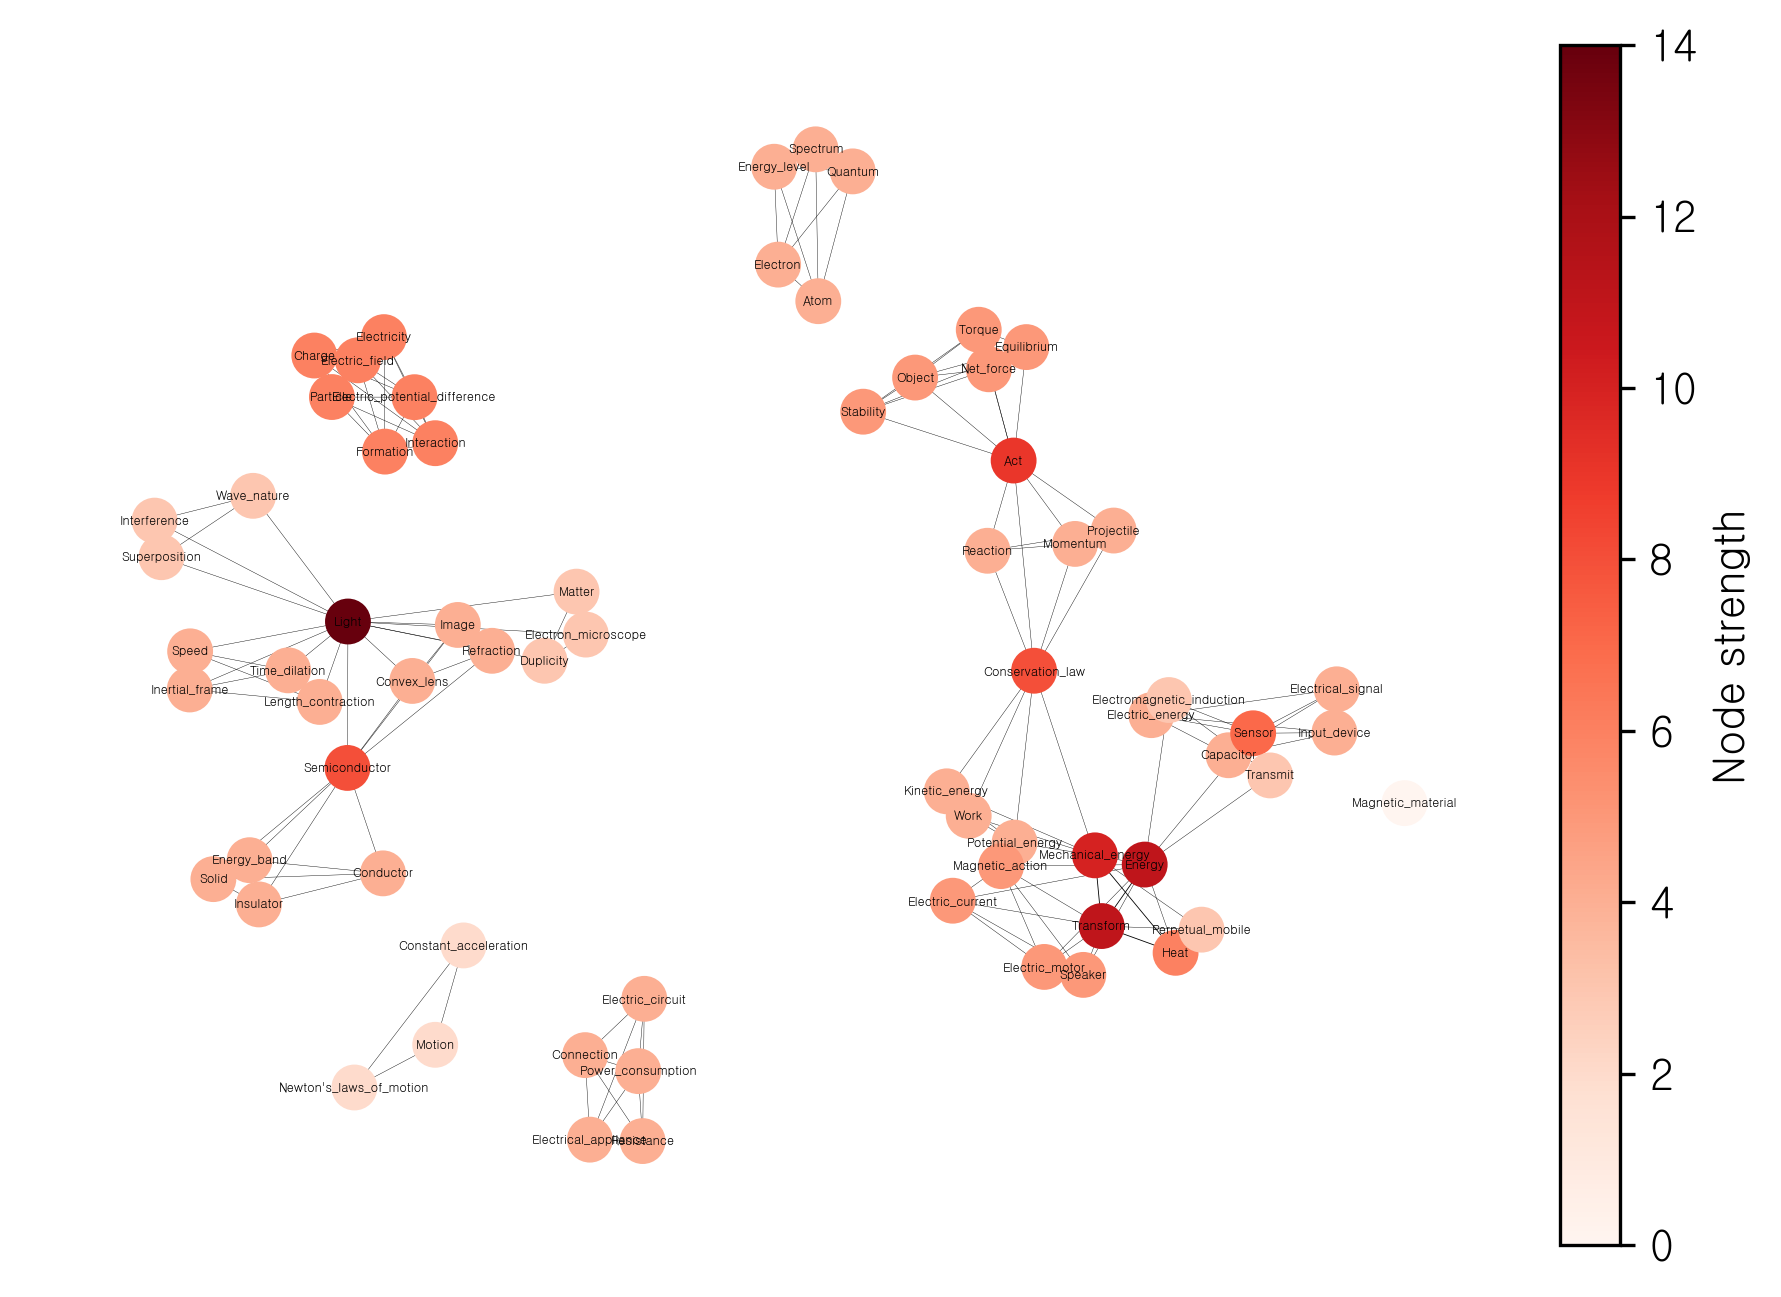

In [37]:
#(itr, seed, k, file_name)
subject_graph_ver2(500, 100, 3, file_lst[3])

C:\Users\user\AppData\Local\Temp\ipykernel_36592\2281605840.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_36592\2281605840.py:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


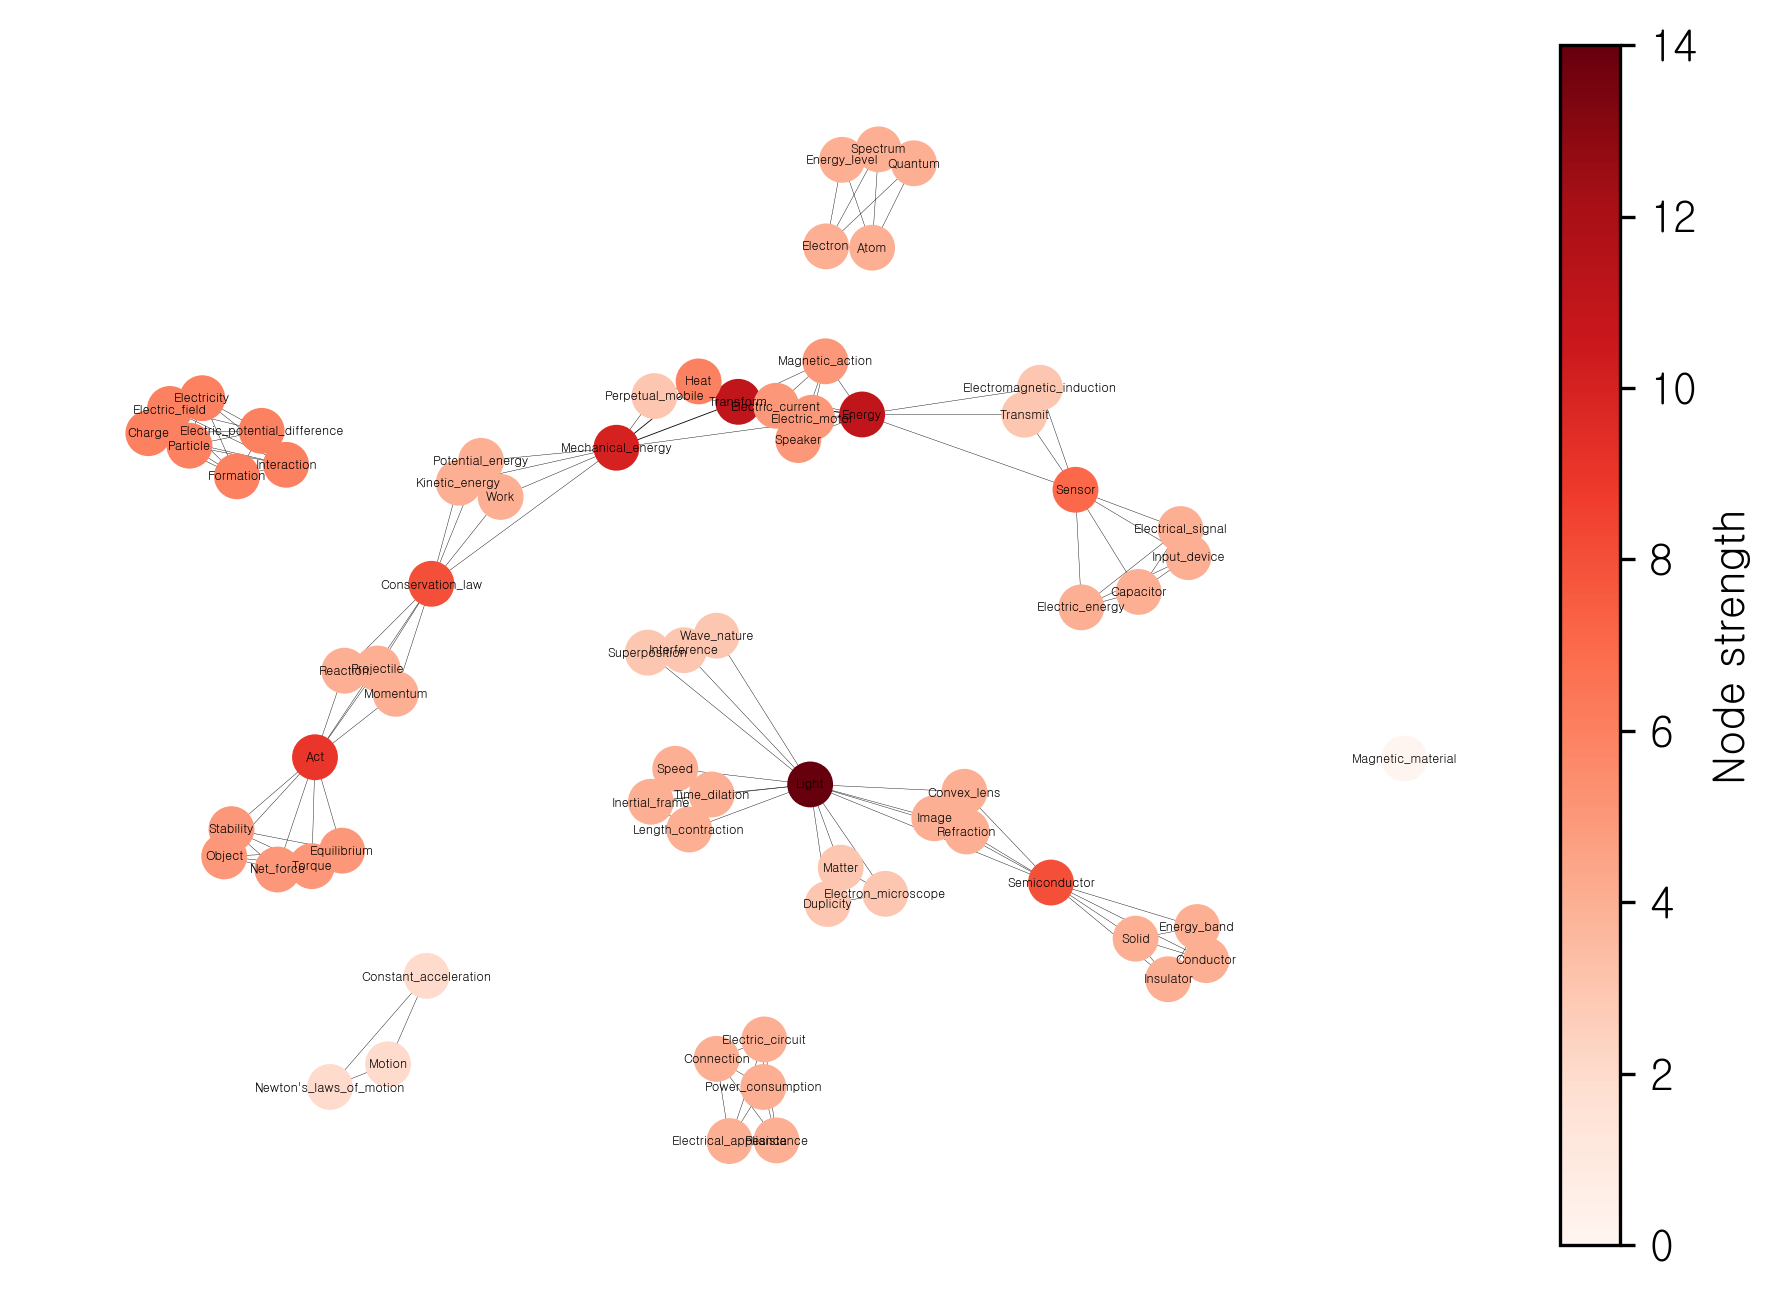

In [38]:
#(itr, seed, k, file_name)
subject_graph_ver2(300, 100, 1.5, file_lst[3])

C:\Users\user\AppData\Local\Temp\ipykernel_36592\2281605840.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_36592\2281605840.py:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


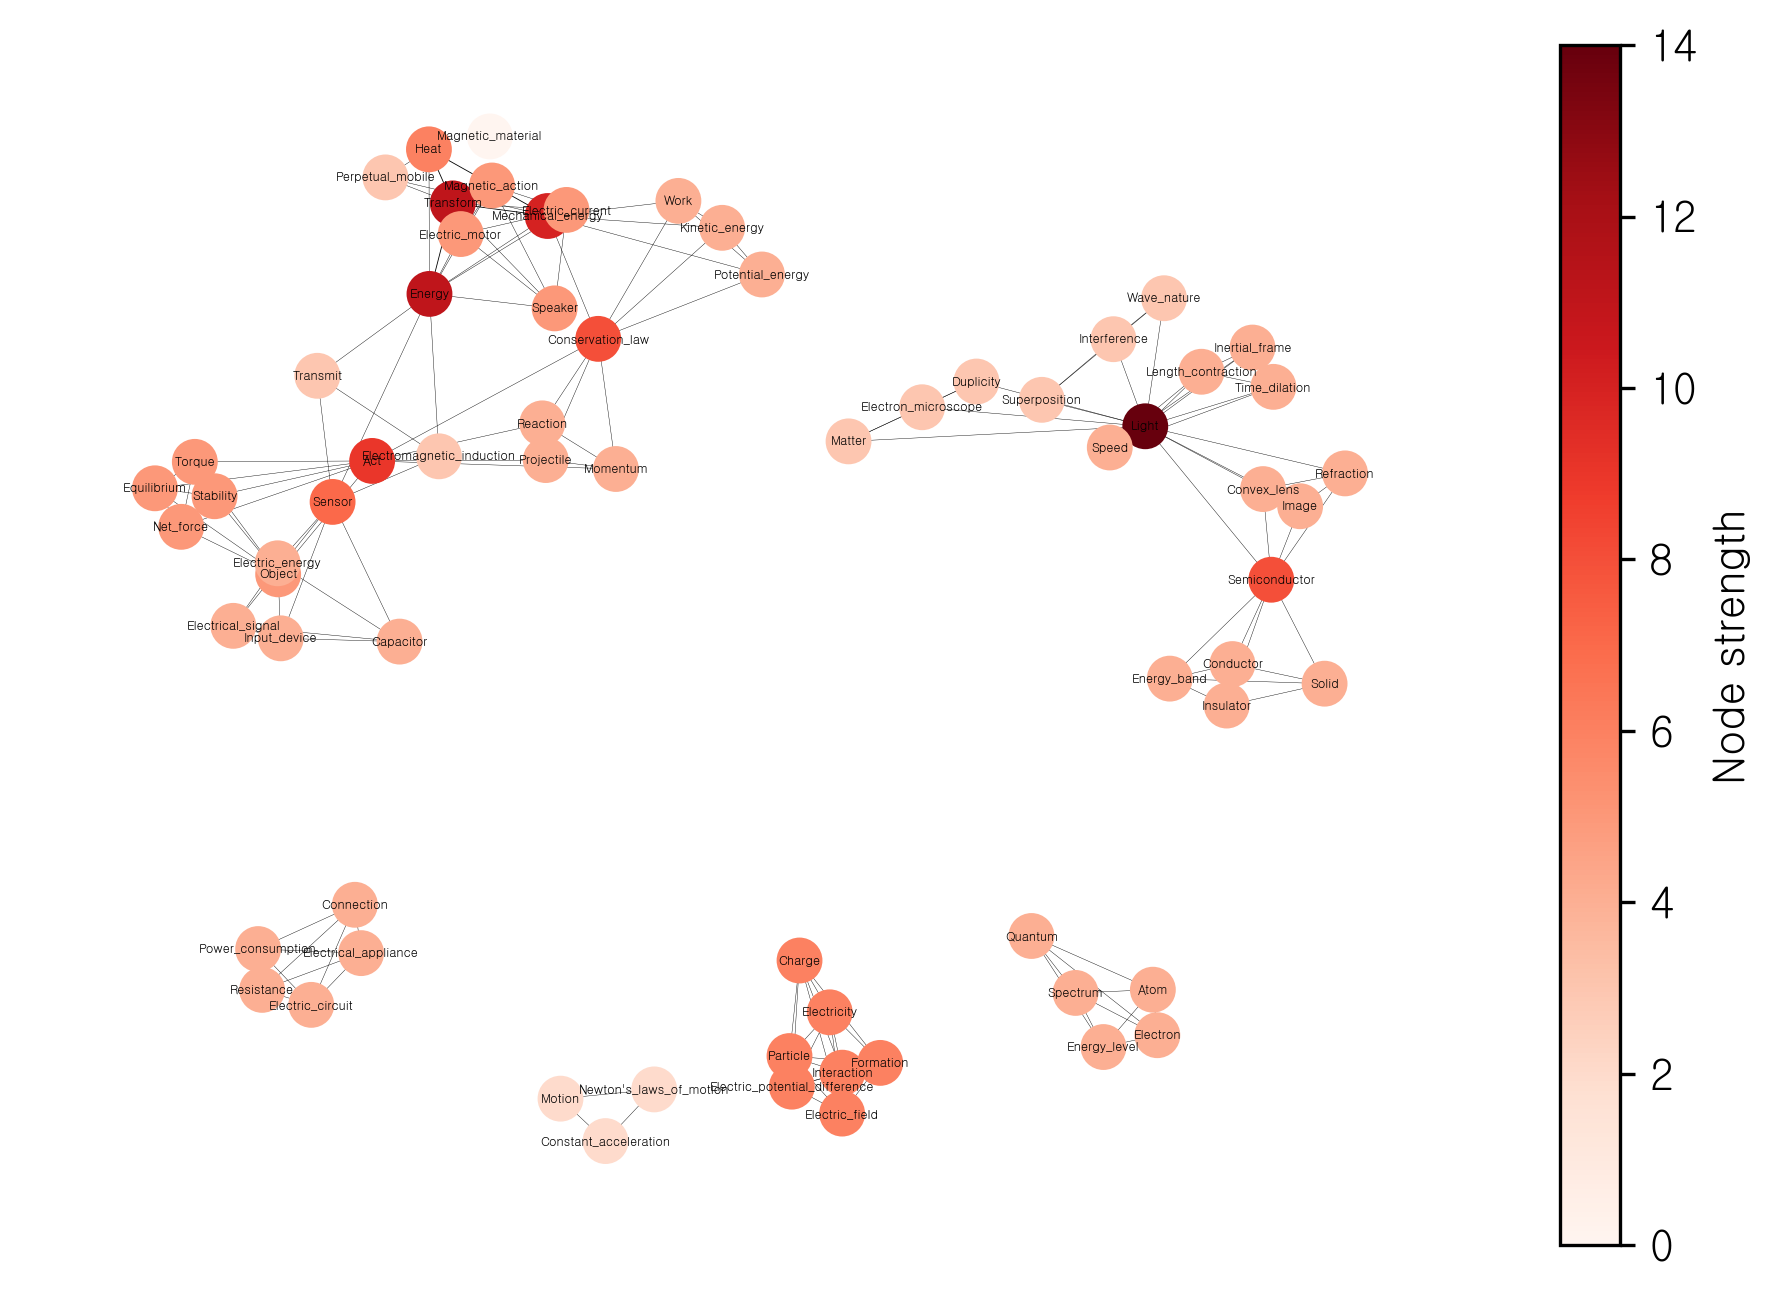

In [39]:
#(itr, seed, k, file_name)
subject_graph_ver2(500, 51, 3.1, file_lst[3])

In [40]:
G = graph(3, file_lst[3])

In [41]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 69
Number of edges: 160
WordFreq avg: 1.2, WordFreq std: 0.58
Degree avg: 4.64, Degree std: 2.01
NodeWeight avg: 4.75, NodeWeight std: 2.22
EdgeWeight avg: 1.02, EdgeWeight std: 0.16


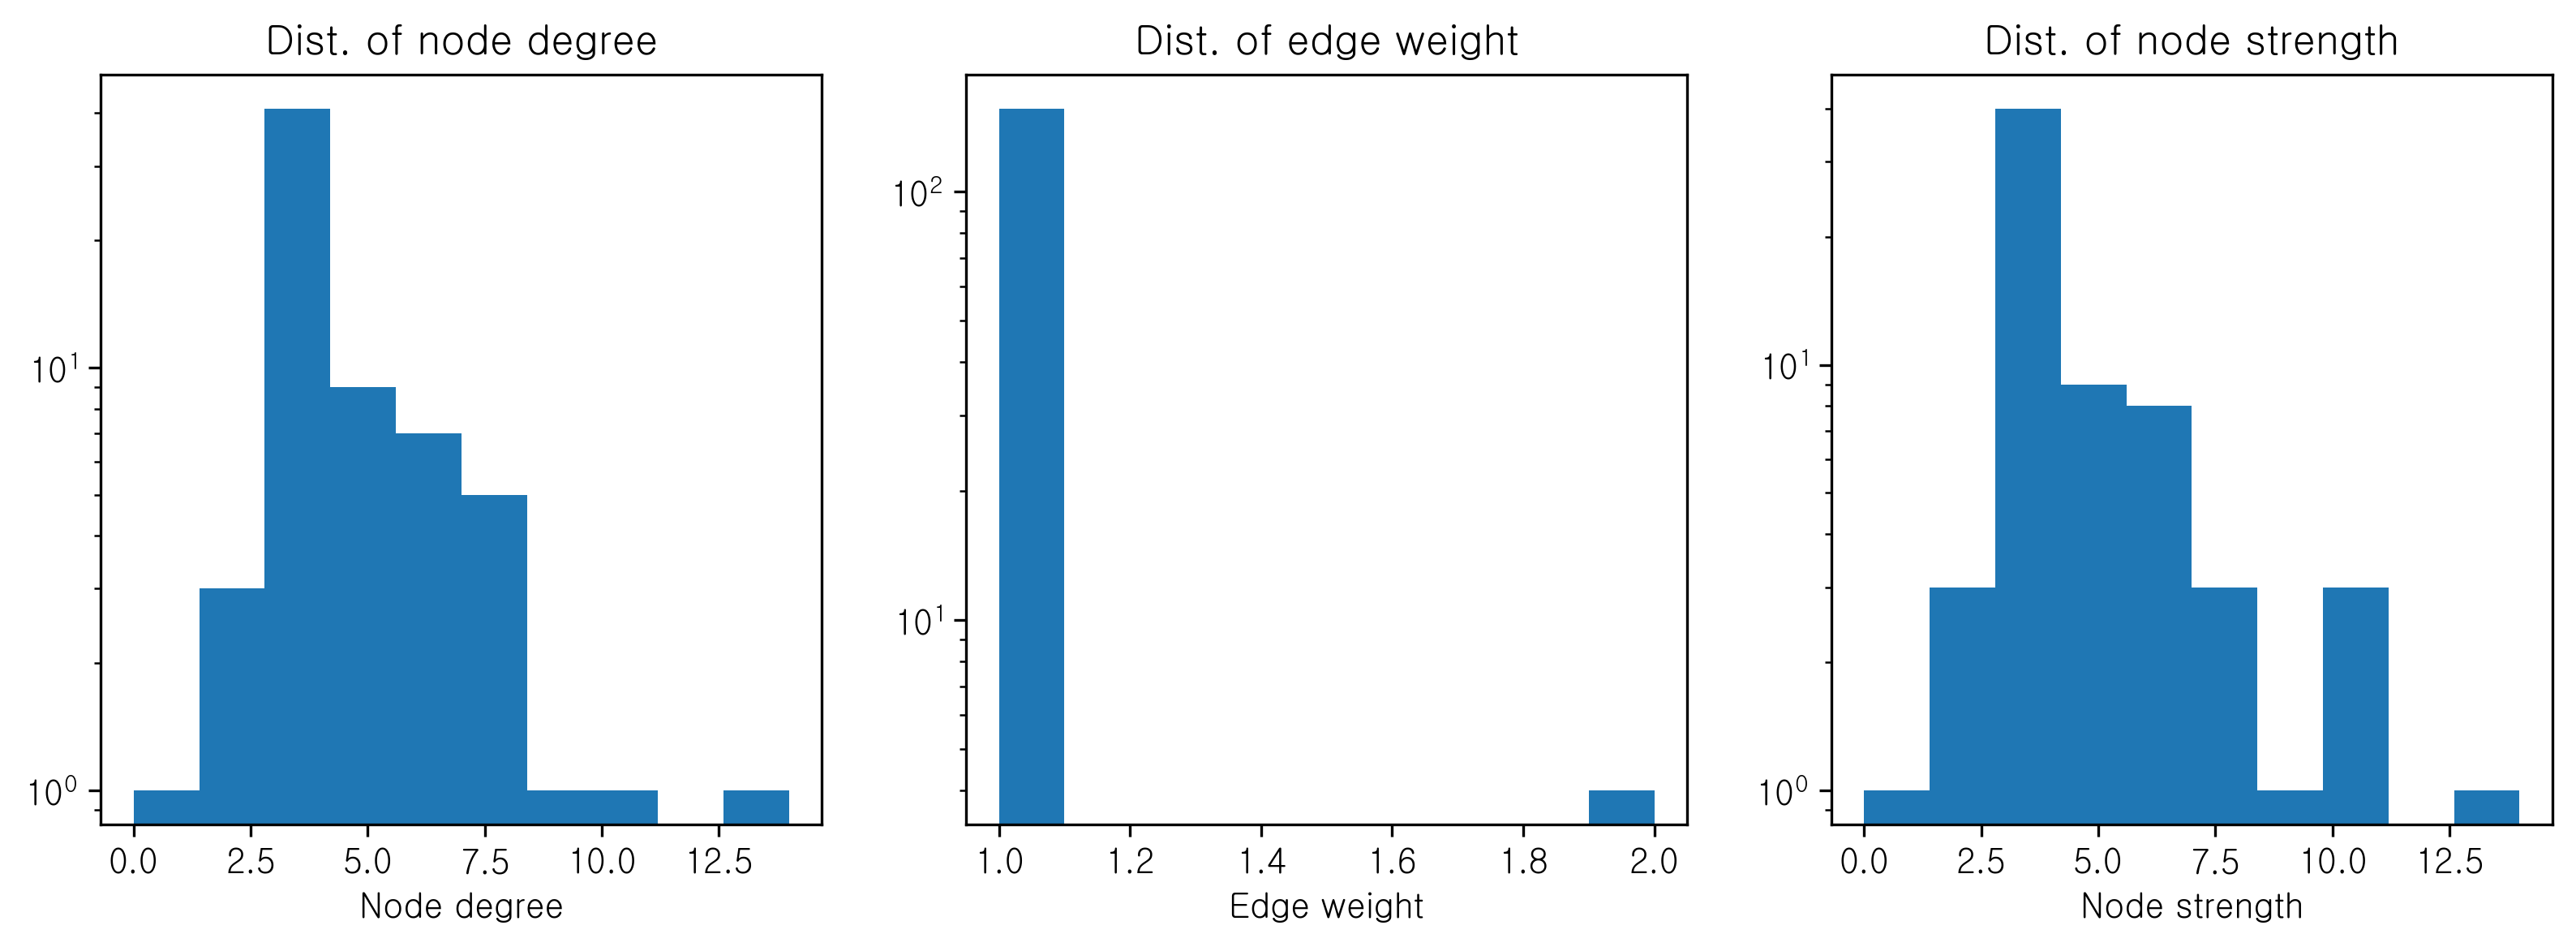

In [42]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


2: Pass, 8.773093410213537

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1408: RuntimeWarning: overflow encountered in scalar power
  C = ( self.Lambda**(1-self.alpha) /
D:\anaconda3\Lib\site-packages\powerlaw.py:1408: RuntimeWarning: invalid value encountered in scalar divide
  C = ( self.Lambda**(1-self.alpha) /
D:\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:917: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
D:\anaconda3\Lib\site-packages\powerlaw.py:1396: RuntimeWarning: overflow encountered in scalar power
  self.Lambda**(1-self.alpha)
D:\anaconda3\Lib\site-packages\powerlaw.py:1808: RuntimeWarning: invalid value encountered in subtract
  ( (loglikelihoods1-loglikelihoods2) - mean_diff)**2


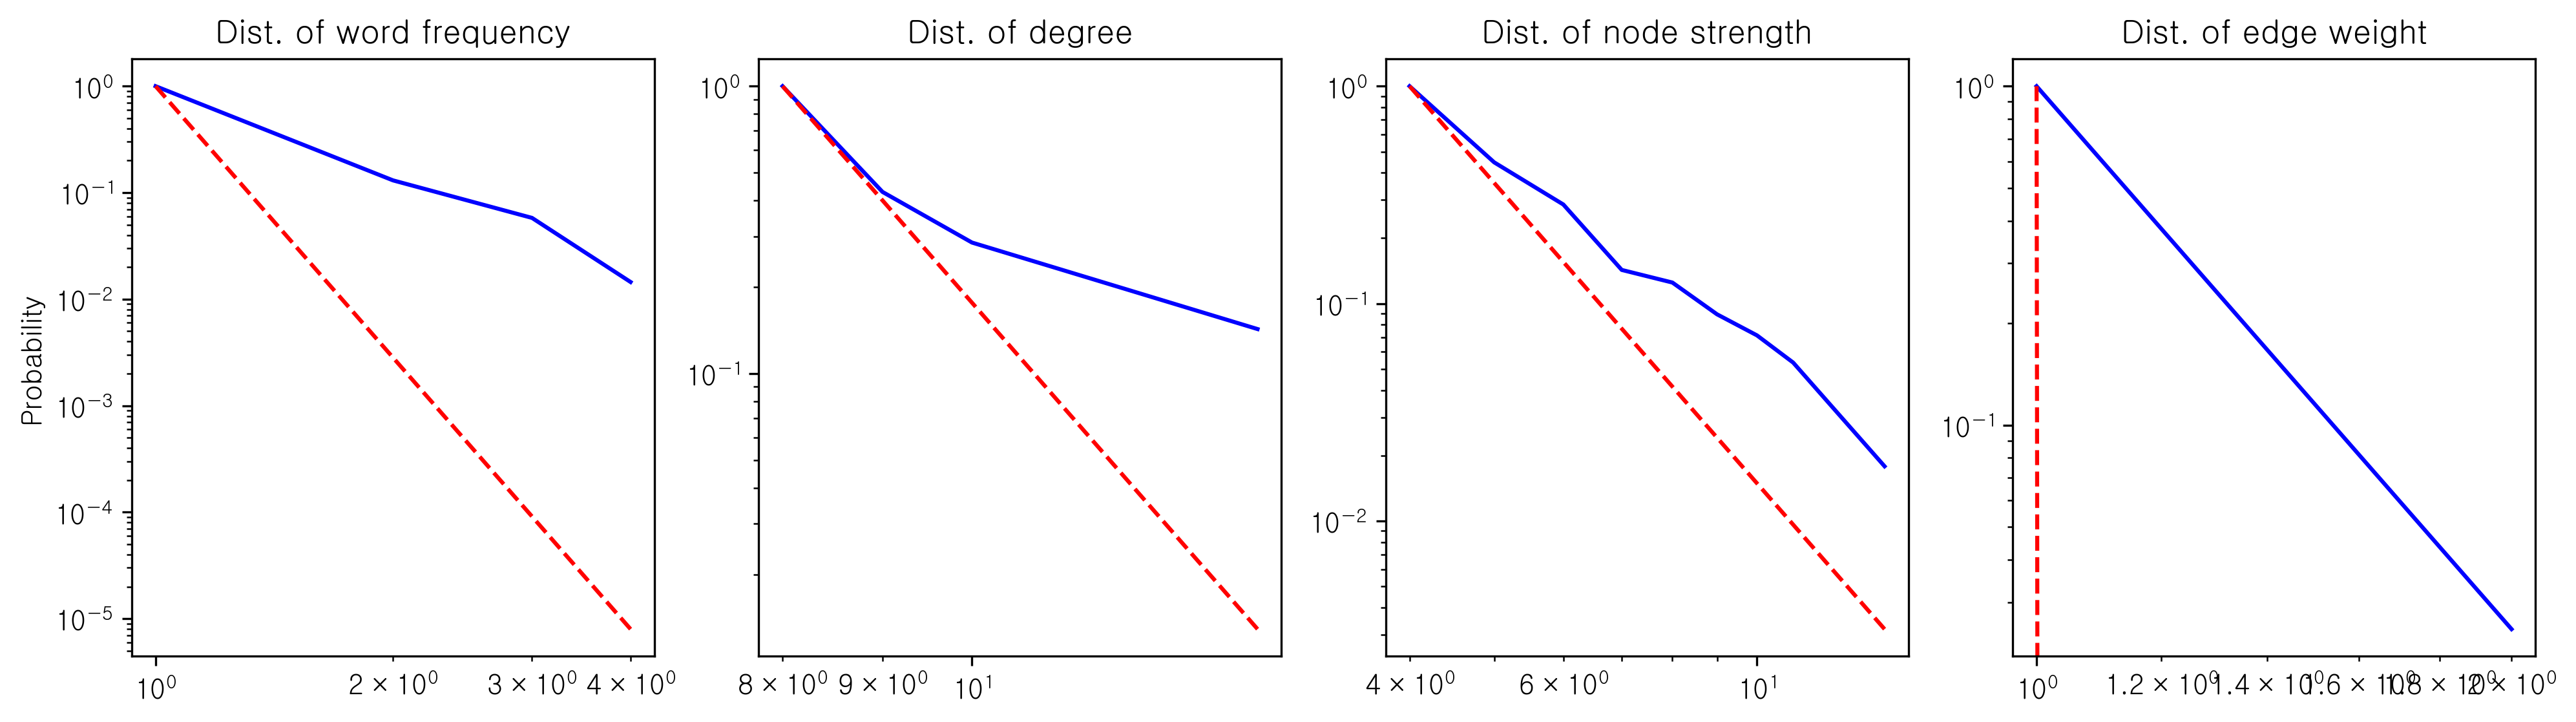

In [43]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [44]:
df = info(G)
df.head(20)

Node_F  Node Frequency                        Node_ND  \
0                     Light             4.0                          Light   
1         Mechanical_energy             3.0                         Energy   
2                 Transform             3.0                            Act   
3                    Energy             3.0               Conservation_law   
4                       Act             2.0              Mechanical_energy   
5          Conservation_law             2.0                      Transform   
6                      Heat             2.0                  Semiconductor   
7                    Sensor             2.0                         Sensor   
8             Semiconductor             2.0                      Formation   
9                    Object             1.0                         Charge   
10                   Torque             1.0                    Interaction   
11                Stability             1.0                 Electric_field   
12              Equilibrium             1.0  Electric_potential_difference   
13                Net_force             1.0                    Electricity   
14  Newton's_laws_of_motion             1.0                       Particle   
15    Constant_acceleration             1.0                         Object   
16                   Motion             1.0                         Torque   
17                 Momentum             1.0                      Stability   
18               Projectile             1.0                    Equilibrium   
19                 Reaction             1.0                      Net_force   

    Node Degree                        Node_NS  Node Strength  \
0          14.0                          Light           14.0   
1          10.0                      Transform           11.0   
2           9.0                         Energy           11.0   
3           8.0              Mechanical_energy           10.0   
4           8.0                            Act            9.0   
5           8.0               Conservation_law            8.0   
6           8.0                  Semiconductor            8.0   
7           7.0                         Sensor            7.0   
8           6.0                           Heat            6.0   
9           6.0                      Formation            6.0   
10          6.0                         Charge            6.0   
11          6.0                    Interaction            6.0   
12          6.0                 Electric_field            6.0   
13          6.0  Electric_potential_difference            6.0   
14          6.0                    Electricity            6.0   
15          5.0                       Particle            6.0   
16          5.0                         Object            5.0   
17          5.0                         Torque            5.0   
18          5.0                      Stability            5.0   
19          5.0                    Equilibrium            5.0   

                              Edge  Edge Weight                    Node_BC  \
0   (Mechanical_energy, Transform)            2          Mechanical_energy   
1        (Mechanical_energy, Heat)            2                     Energy   
2              (Transform, Energy)            2           Conservation_law   
3                (Transform, Heat)            2                        Act   
4                 (Object, Torque)            1                  Transform   
5              (Object, Stability)            1                     Sensor   
6            (Object, Equilibrium)            1                       Heat   
7                    (Object, Act)            1           Potential_energy   
8              (Object, Net_force)            1             Kinetic_energy   
9              (Torque, Stability)            1                       Work   
10           (Torque, Equilibrium)            1                   Reaction   
11                   (Torque, Act)            1                   Momentum   
12

# 역학과 에너지

C:\Users\user\AppData\Local\Temp\ipykernel_36592\2281605840.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_36592\2281605840.py:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


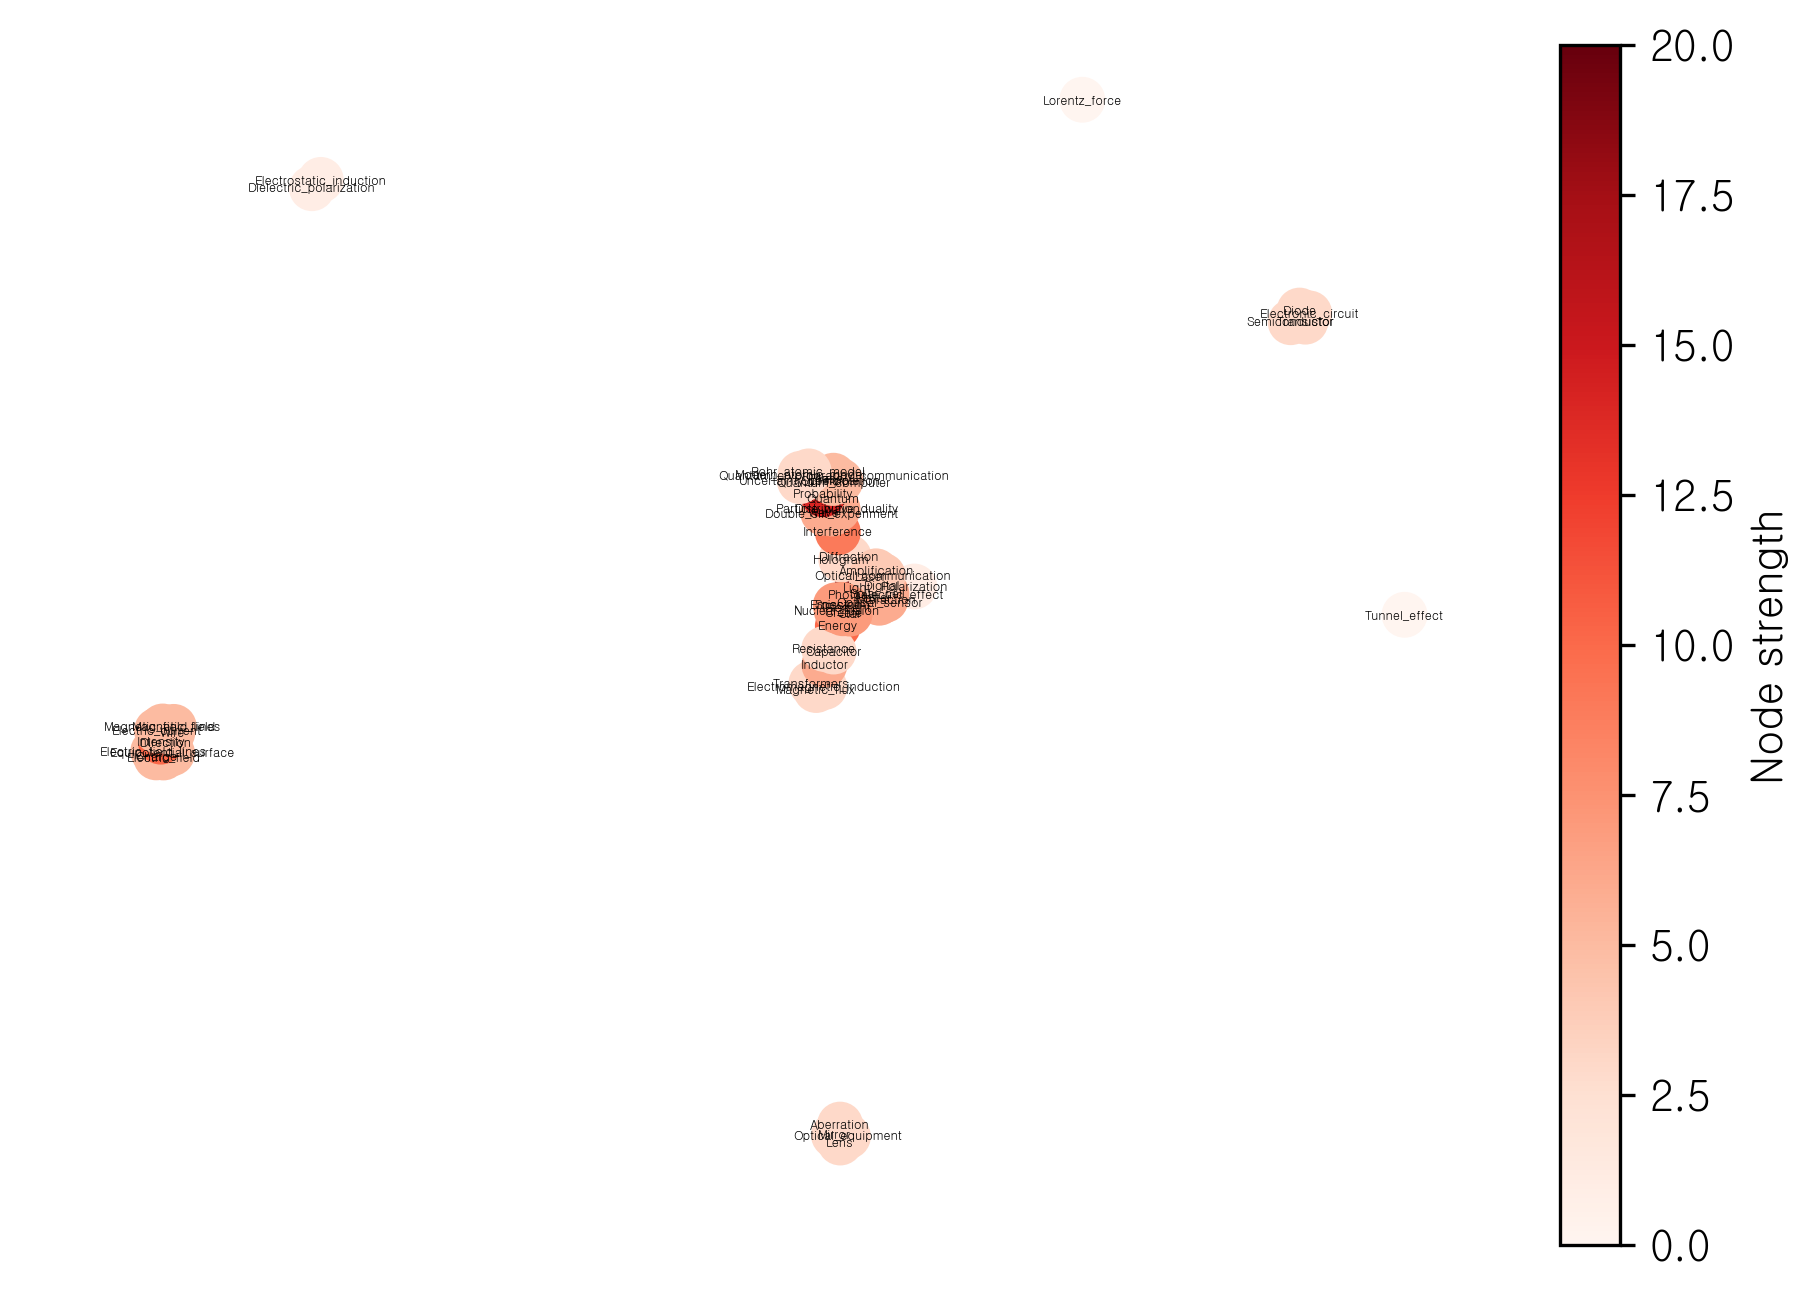

In [45]:
#(itr, seed, k, file_name)
subject_graph_ver2(1000, 1, 1, file_lst[5])

C:\Users\user\AppData\Local\Temp\ipykernel_36592\2281605840.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_36592\2281605840.py:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


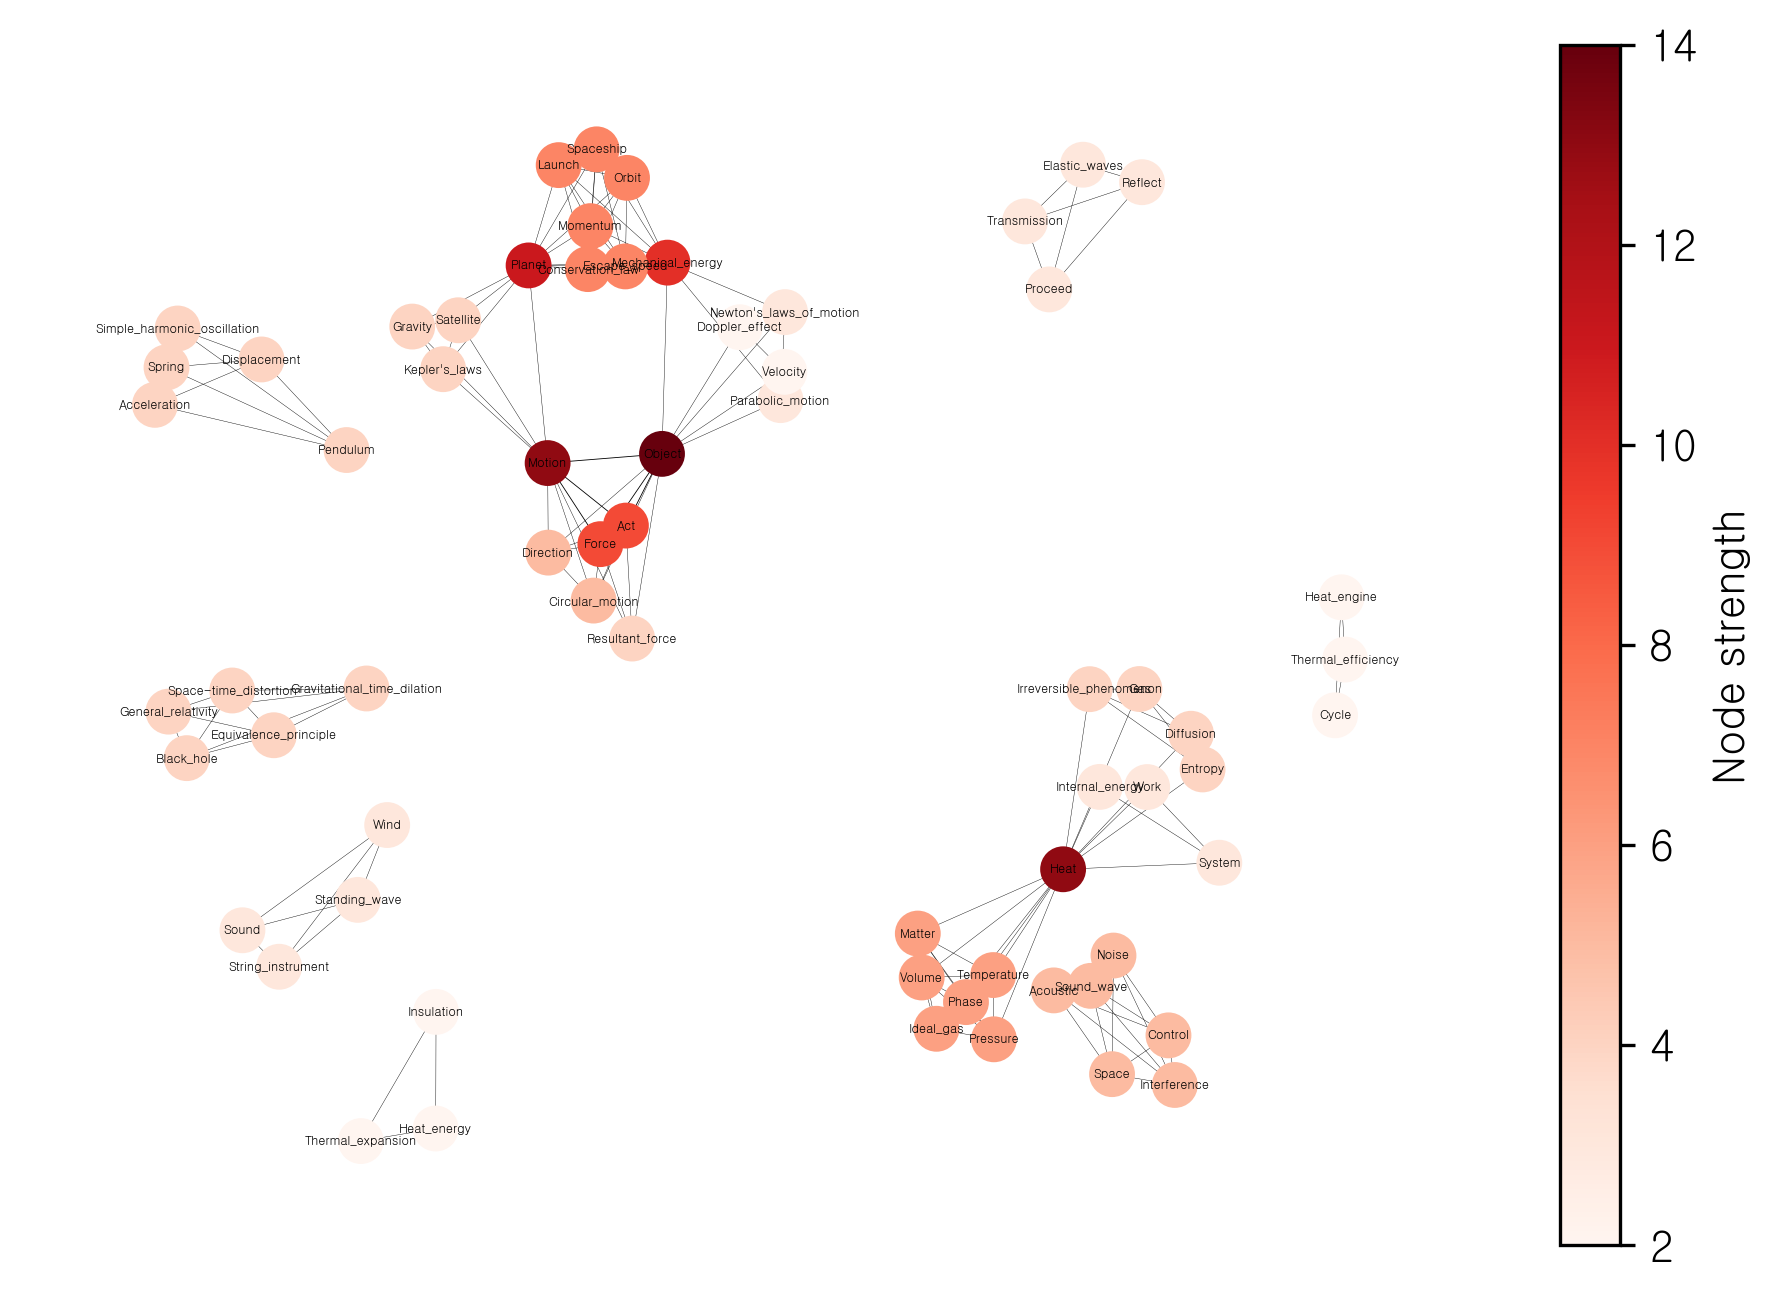

In [46]:
#(itr, seed, k, file_name)
subject_graph_ver2(150,8, 1.0, file_lst[4])

In [47]:
G = graph(3, file_lst[4])

In [48]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 66
Number of edges: 156
WordFreq avg: 1.17, WordFreq std: 0.54
Degree avg: 4.73, Degree std: 2.32
NodeWeight avg: 4.91, NodeWeight std: 2.68
EdgeWeight avg: 1.04, EdgeWeight std: 0.19


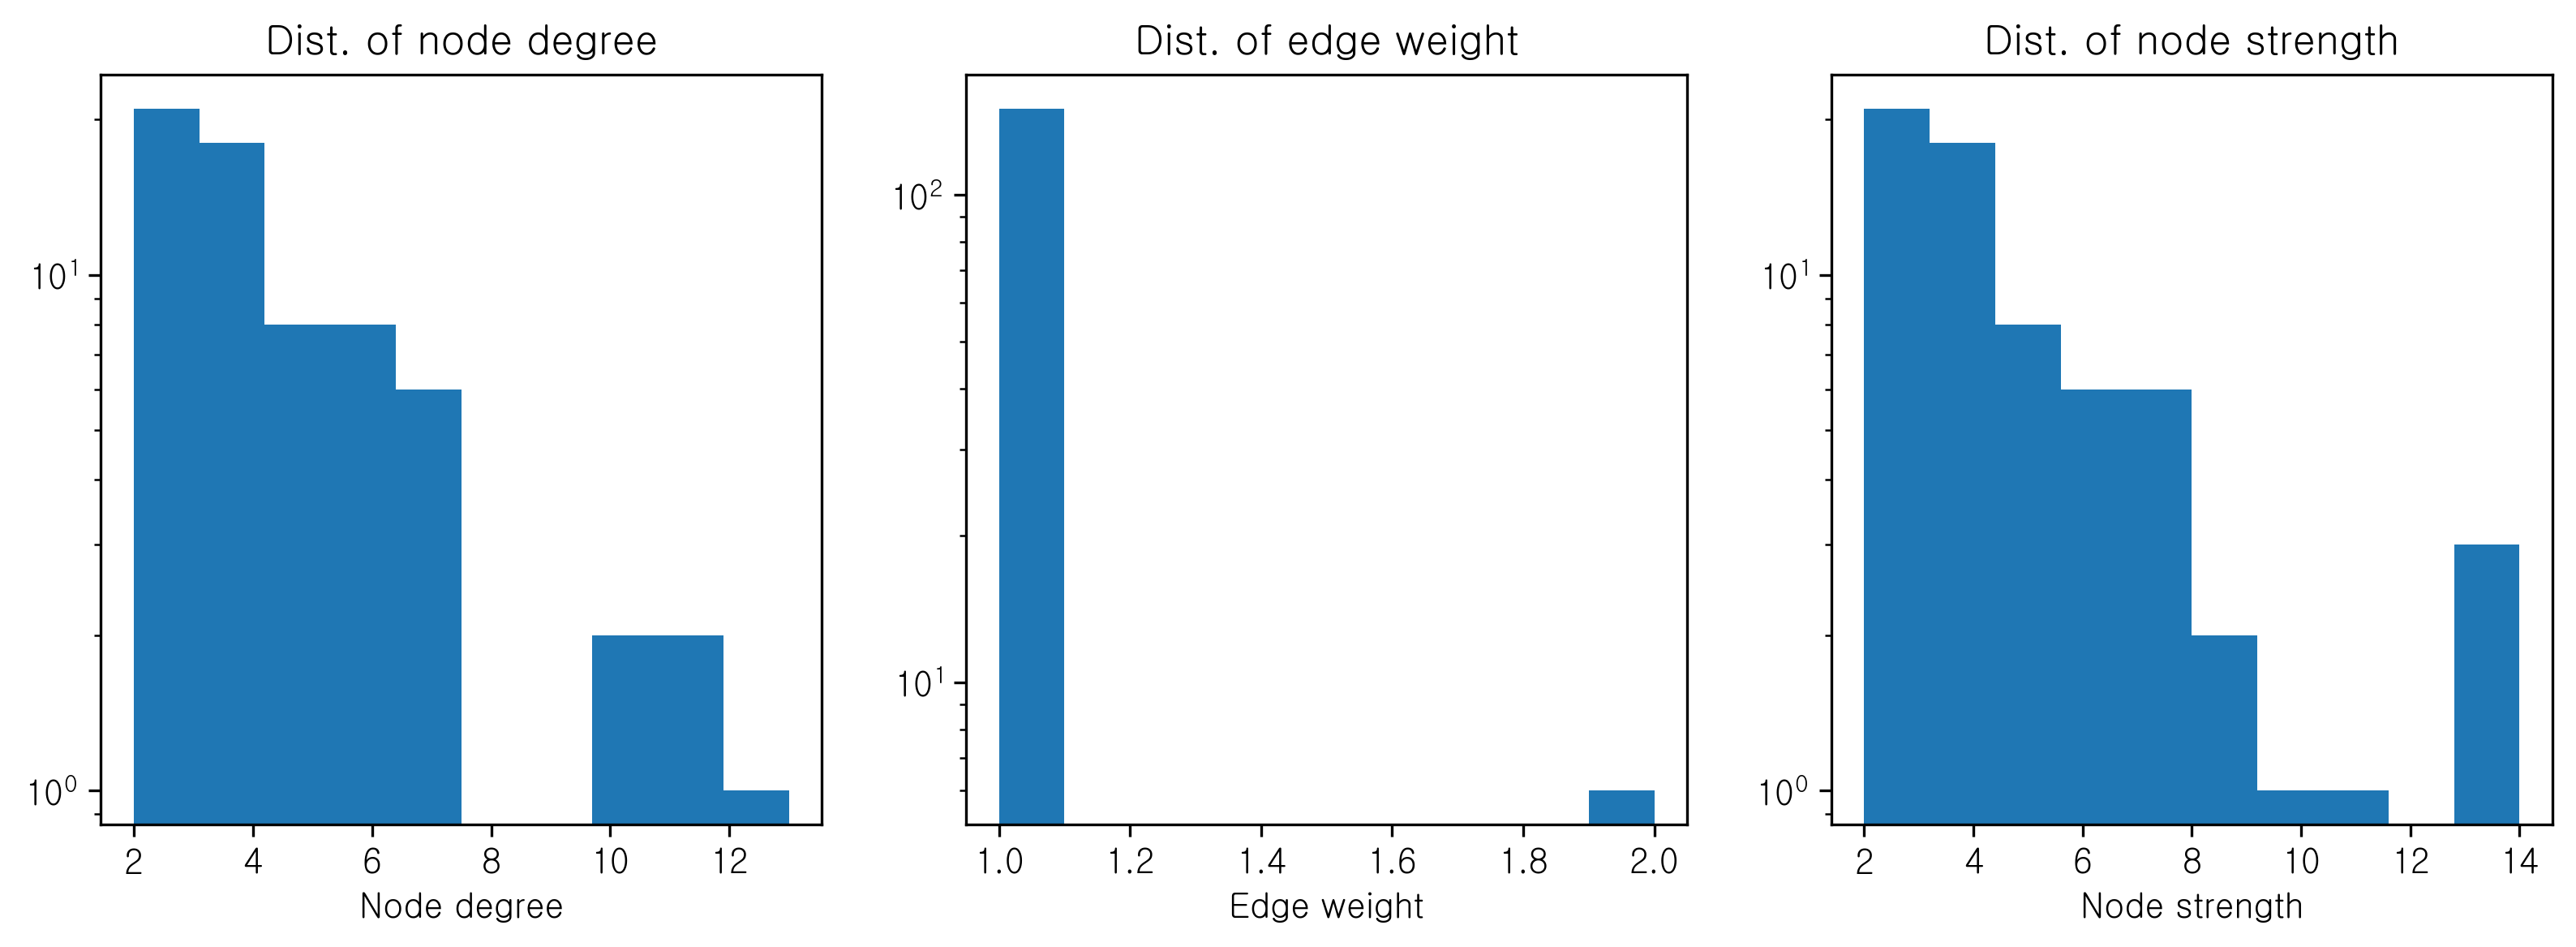

In [49]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1408: RuntimeWarning: overflow encountered in scalar power
  C = ( self.Lambda**(1-self.alpha) /
D:\anaconda3\Lib\site-packages\powerlaw.py:1408: RuntimeWarning: invalid value encountered in scalar divide
  C = ( self.Lambda**(1-self.alpha) /
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


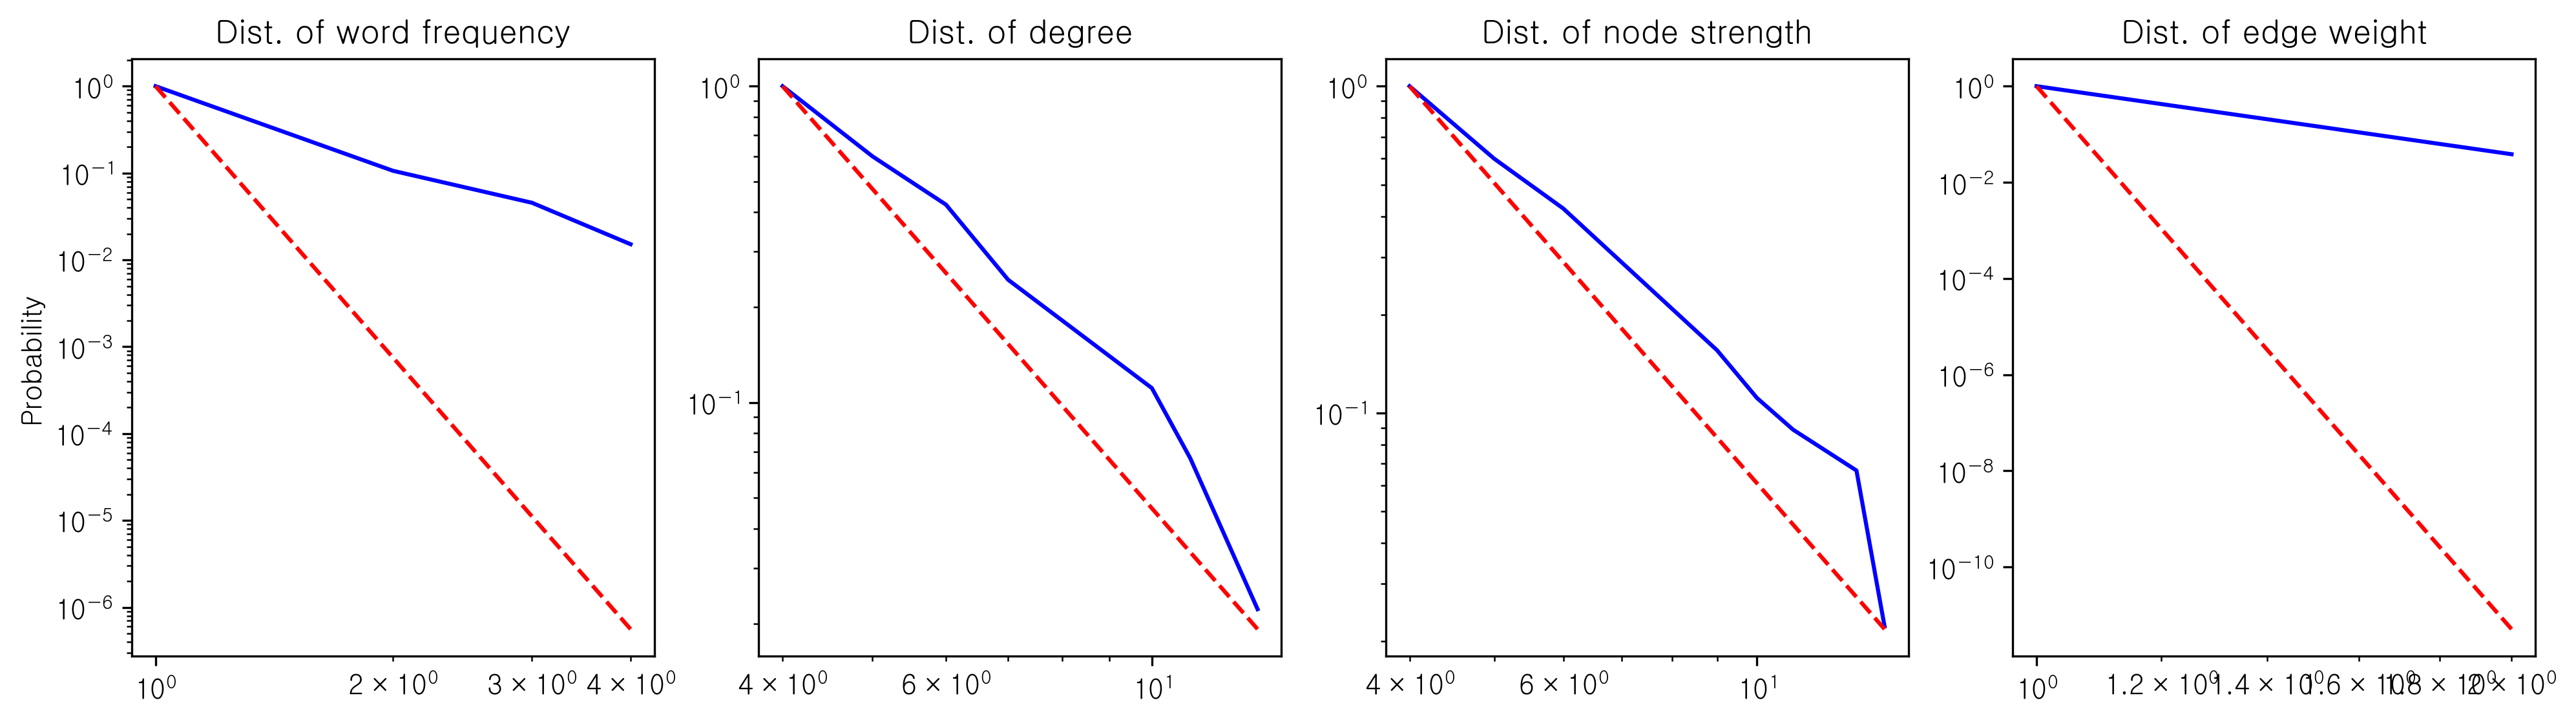

In [50]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [51]:
df = info(G)
df.head(20)

Node_F  Node Frequency            Node_ND  Node Degree  \
0                    Object             4.0               Heat         13.0   
1                    Motion             3.0             Object         11.0   
2                      Heat             3.0             Planet         11.0   
3                       Act             2.0             Motion         10.0   
4                     Force             2.0  Mechanical_energy         10.0   
5         Mechanical_energy             2.0          Spaceship          7.0   
6                    Planet             2.0           Momentum          7.0   
7           Resultant_force             1.0             Launch          7.0   
8   Newton's_laws_of_motion             1.0       Escape_speed          7.0   
9          Parabolic_motion             1.0   Conservation_law          7.0   
10                Direction             1.0              Orbit          7.0   
11          Circular_motion             1.0                Act          6.0   
12                  Gravity             1.0              Force          6.0   
13            Kepler's_laws             1.0             Matter          6.0   
14                Satellite             1.0           Pressure          6.0   
15                Spaceship             1.0        Temperature          6.0   
16                 Momentum             1.0          Ideal_gas          6.0   
17                   Launch             1.0              Phase          6.0   
18             Escape_speed             1.0             Volume          6.0   
19         Conservation_law             1.0          Direction          5.0   

              Node_NS  Node Strength                               Edge  \
0              Object           14.0                   (Object, Motion)   
1              Motion           13.0                      (Object, Act)   
2                Heat           13.0                    (Object, Force)   
3              Planet           11.0                      (Motion, Act)   
4   Mechanical_energy           10.0                    (Motion, Force)   
5                 Act            9.0                       (Act, Force)   
6               Force            9.0          (Object, Resultant_force)   
7           Spaceship            7.0        (Object, Mechanical_energy)   
8            Momentum            7.0  (Object, Newton's_laws_of_motion)   
9              Launch            7.0         (Object, Parabolic_motion)   
10       Escape_speed            7.0                (Object, Direction)   
11   Conservation_law            7.0          (Object, Circular_motion)   
12              Orbit            7.0           (Object, Doppler_effect)   
13             Matter            6.0                 (Object, Velocity)   
14           Pressure            6.0          (Motion, Resultant_force)   
15        Temperature            6.0                (Motion, Direction)   
16          Ideal_gas            6.0          (Motion, Circular_motion)   
17              Phase            6.0                  (Motion, Gravity)   
18             Volume            6.0                   (Motion, Planet)   
19          Direction            5.0            (Motion, Kepler's_laws)   

    Edge Weight                  Node_BC  Betweenness Centrality  
0             2                   Object                0.451729  
1             2                   Motion                0.376993  
2             2                   Planet                0.352644  
3             2        Mechanical_energy                0.316766  
4             2                    Force                0.108096  
5             2                      Act                0.108096  
6             1            Kepler's_laws                0.084323  
7             1                  Gravity                0.084323  
8             1                Satellite                0.084323  
9             1  Newton's_laws_of_motion                0.082907  
10            1         Parabolic_motion        

# 전자기와 양자

C:\Users\user\AppData\Local\Temp\ipykernel_36592\2281605840.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_36592\2281605840.py:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


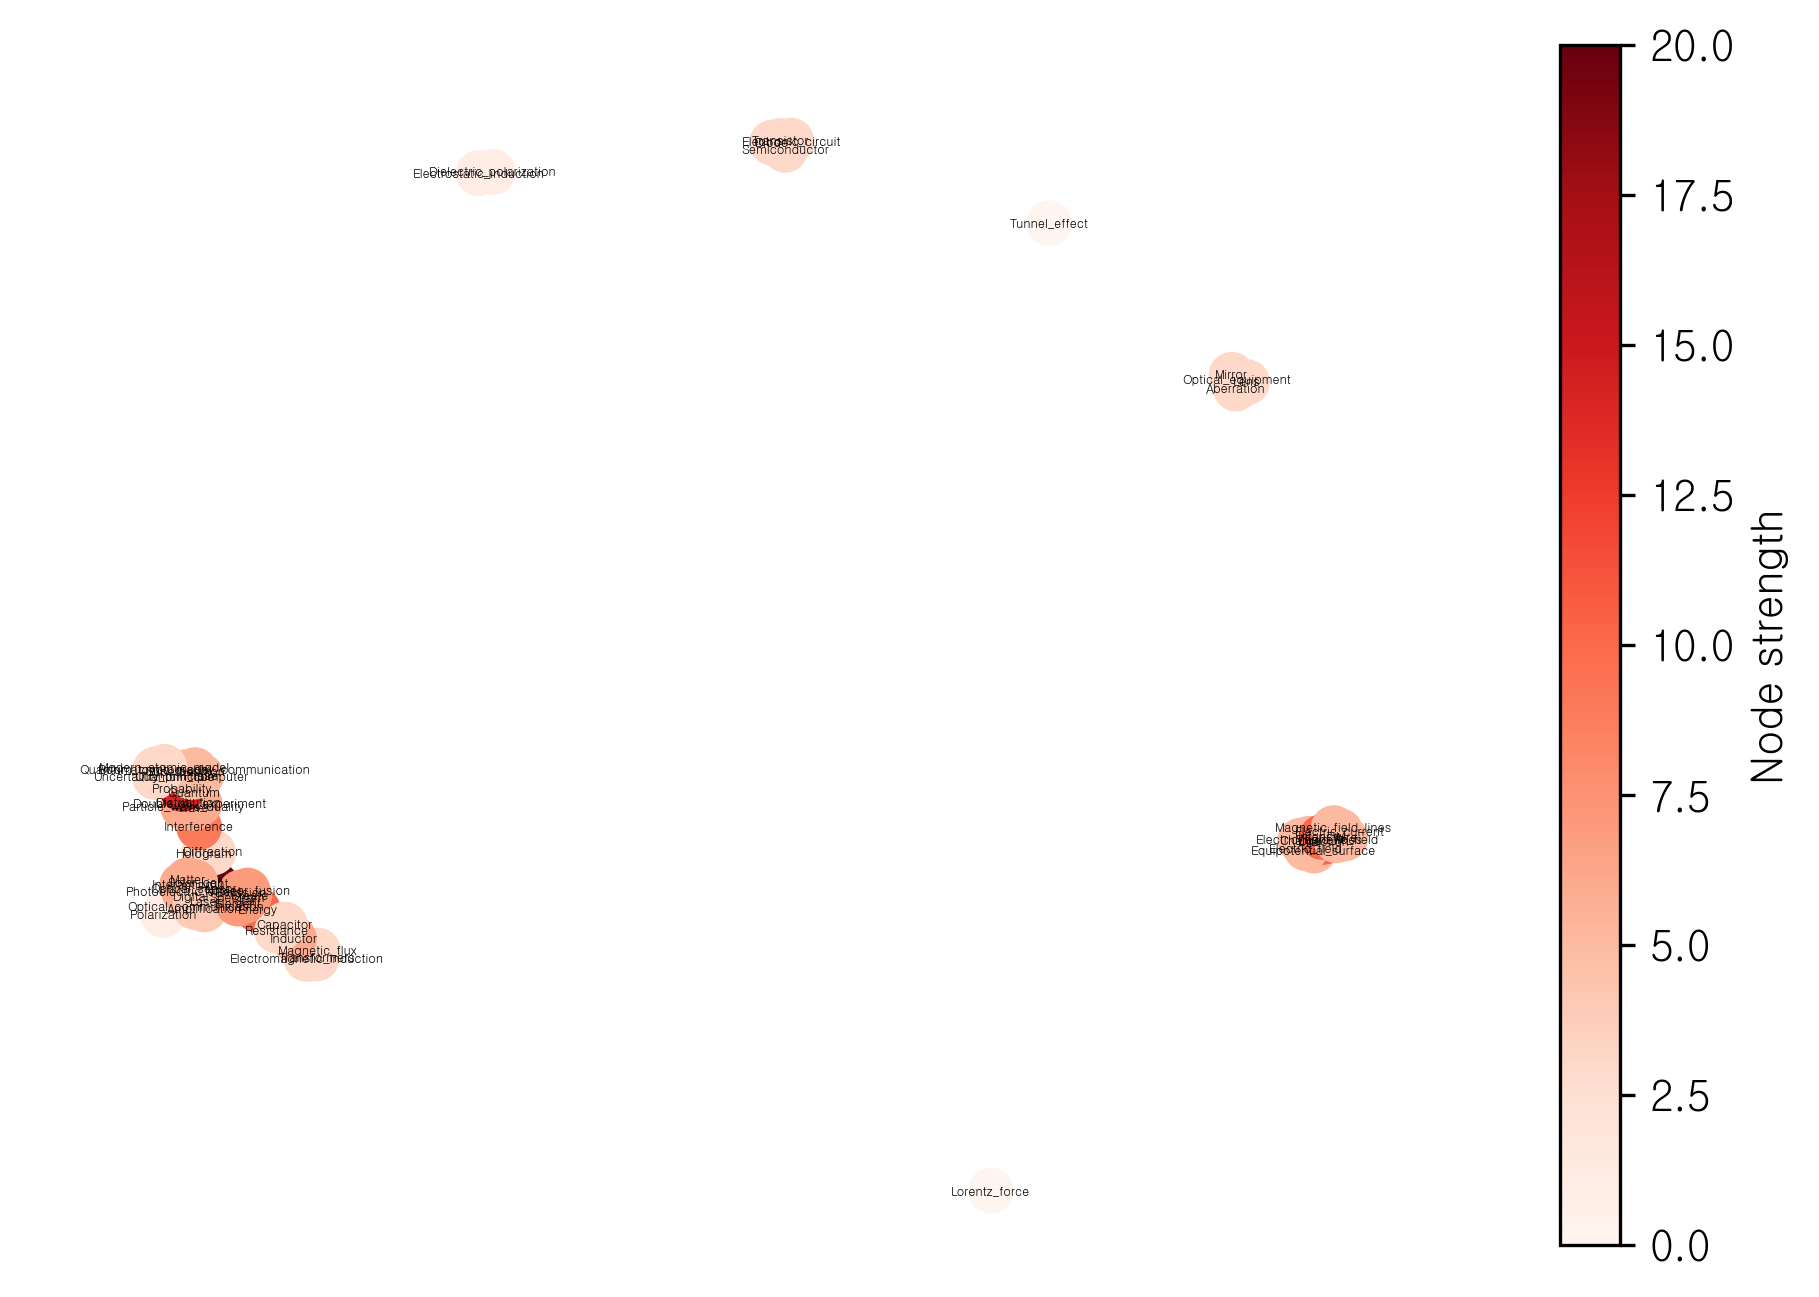

In [52]:
subject_graph_ver2(1000, 10, 1, file_lst[5])

C:\Users\user\AppData\Local\Temp\ipykernel_36592\2281605840.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_36592\2281605840.py:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


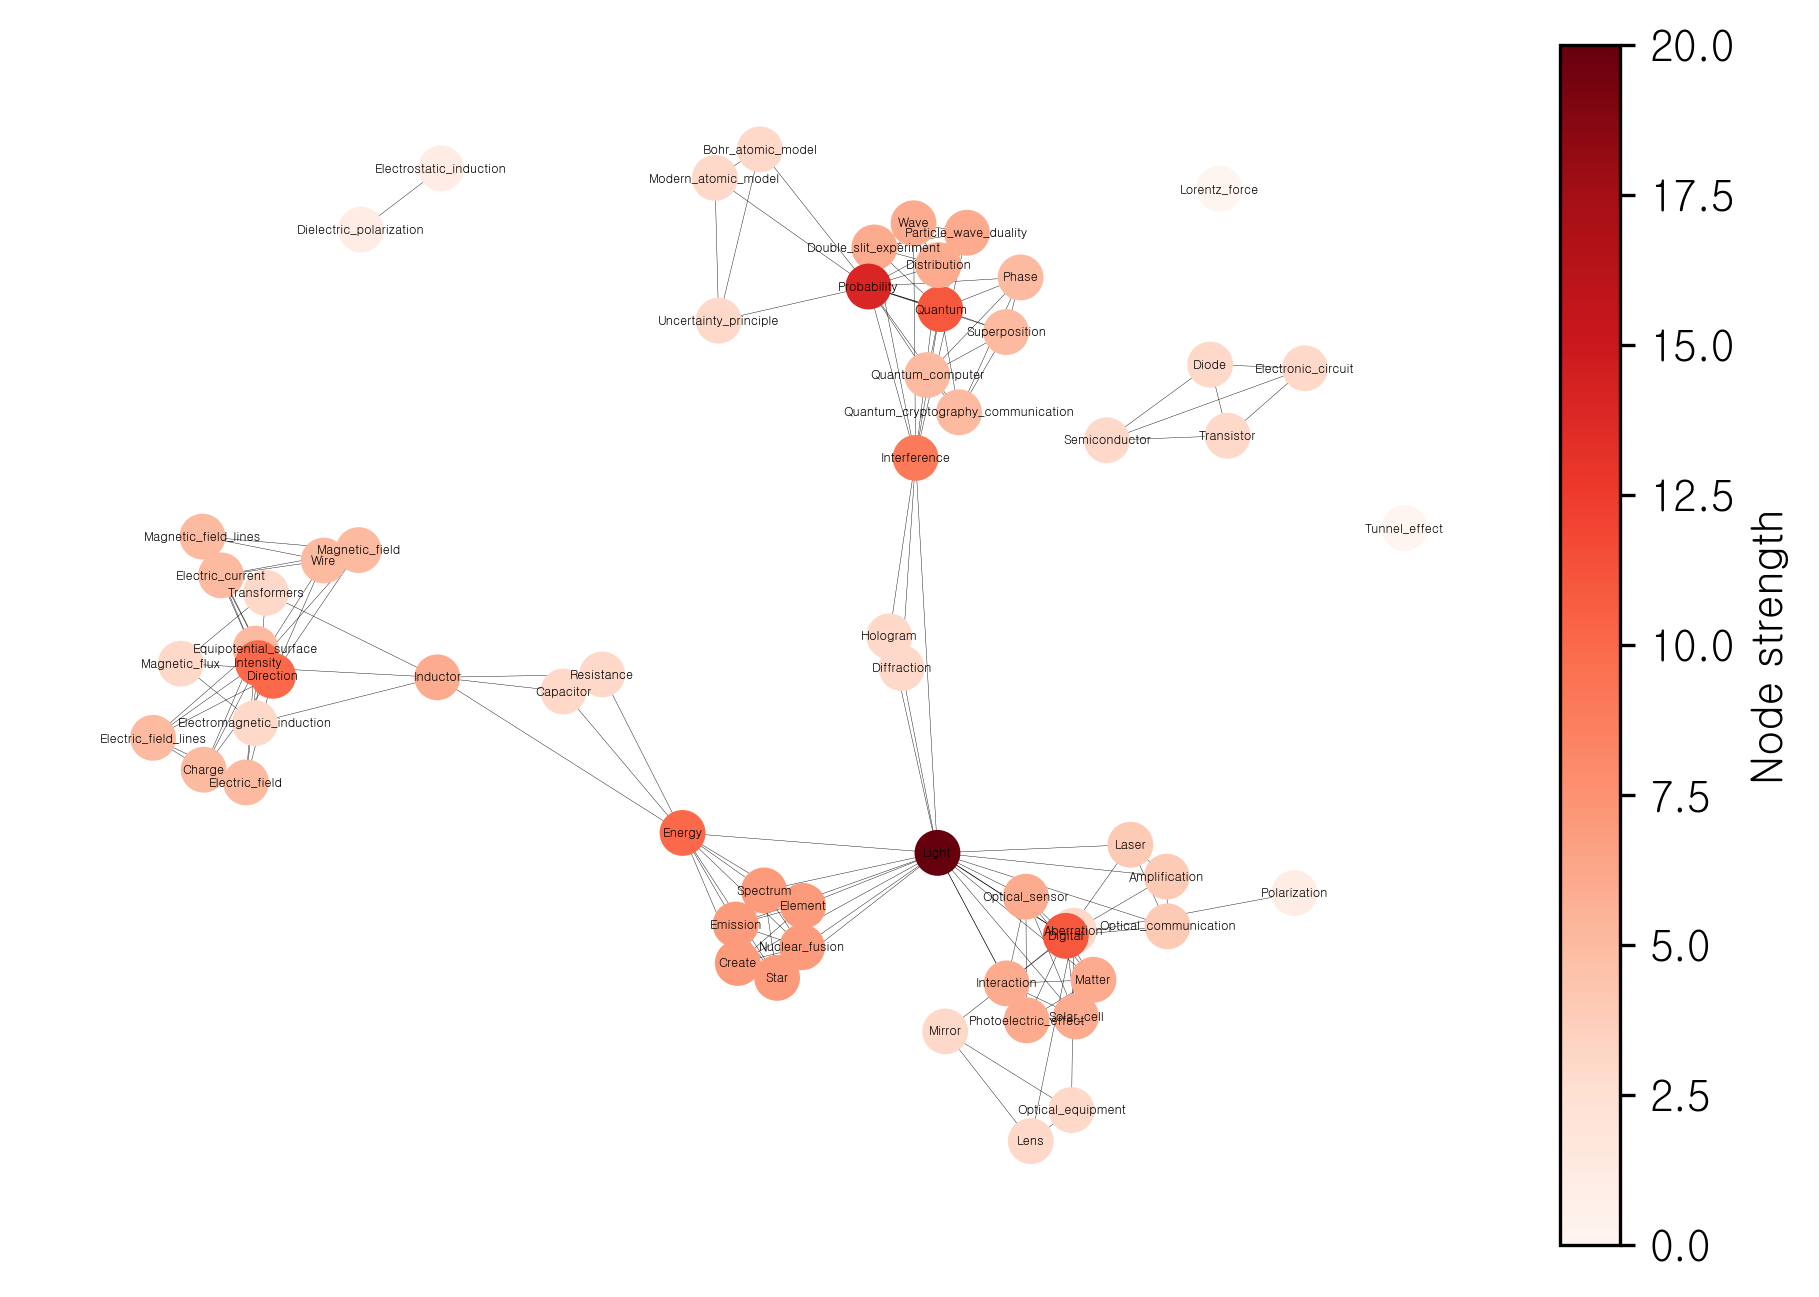

In [53]:
subject_graph_ver2(150, 1, 1.1, file_lst[5])

In [54]:
G = graph(3, file_lst[5])

In [55]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 62
Number of edges: 160
WordFreq avg: 1.21, WordFreq std: 0.57
Degree avg: 5.16, Degree std: 3.08
NodeWeight avg: 5.26, NodeWeight std: 3.29
EdgeWeight avg: 1.02, EdgeWeight std: 0.14


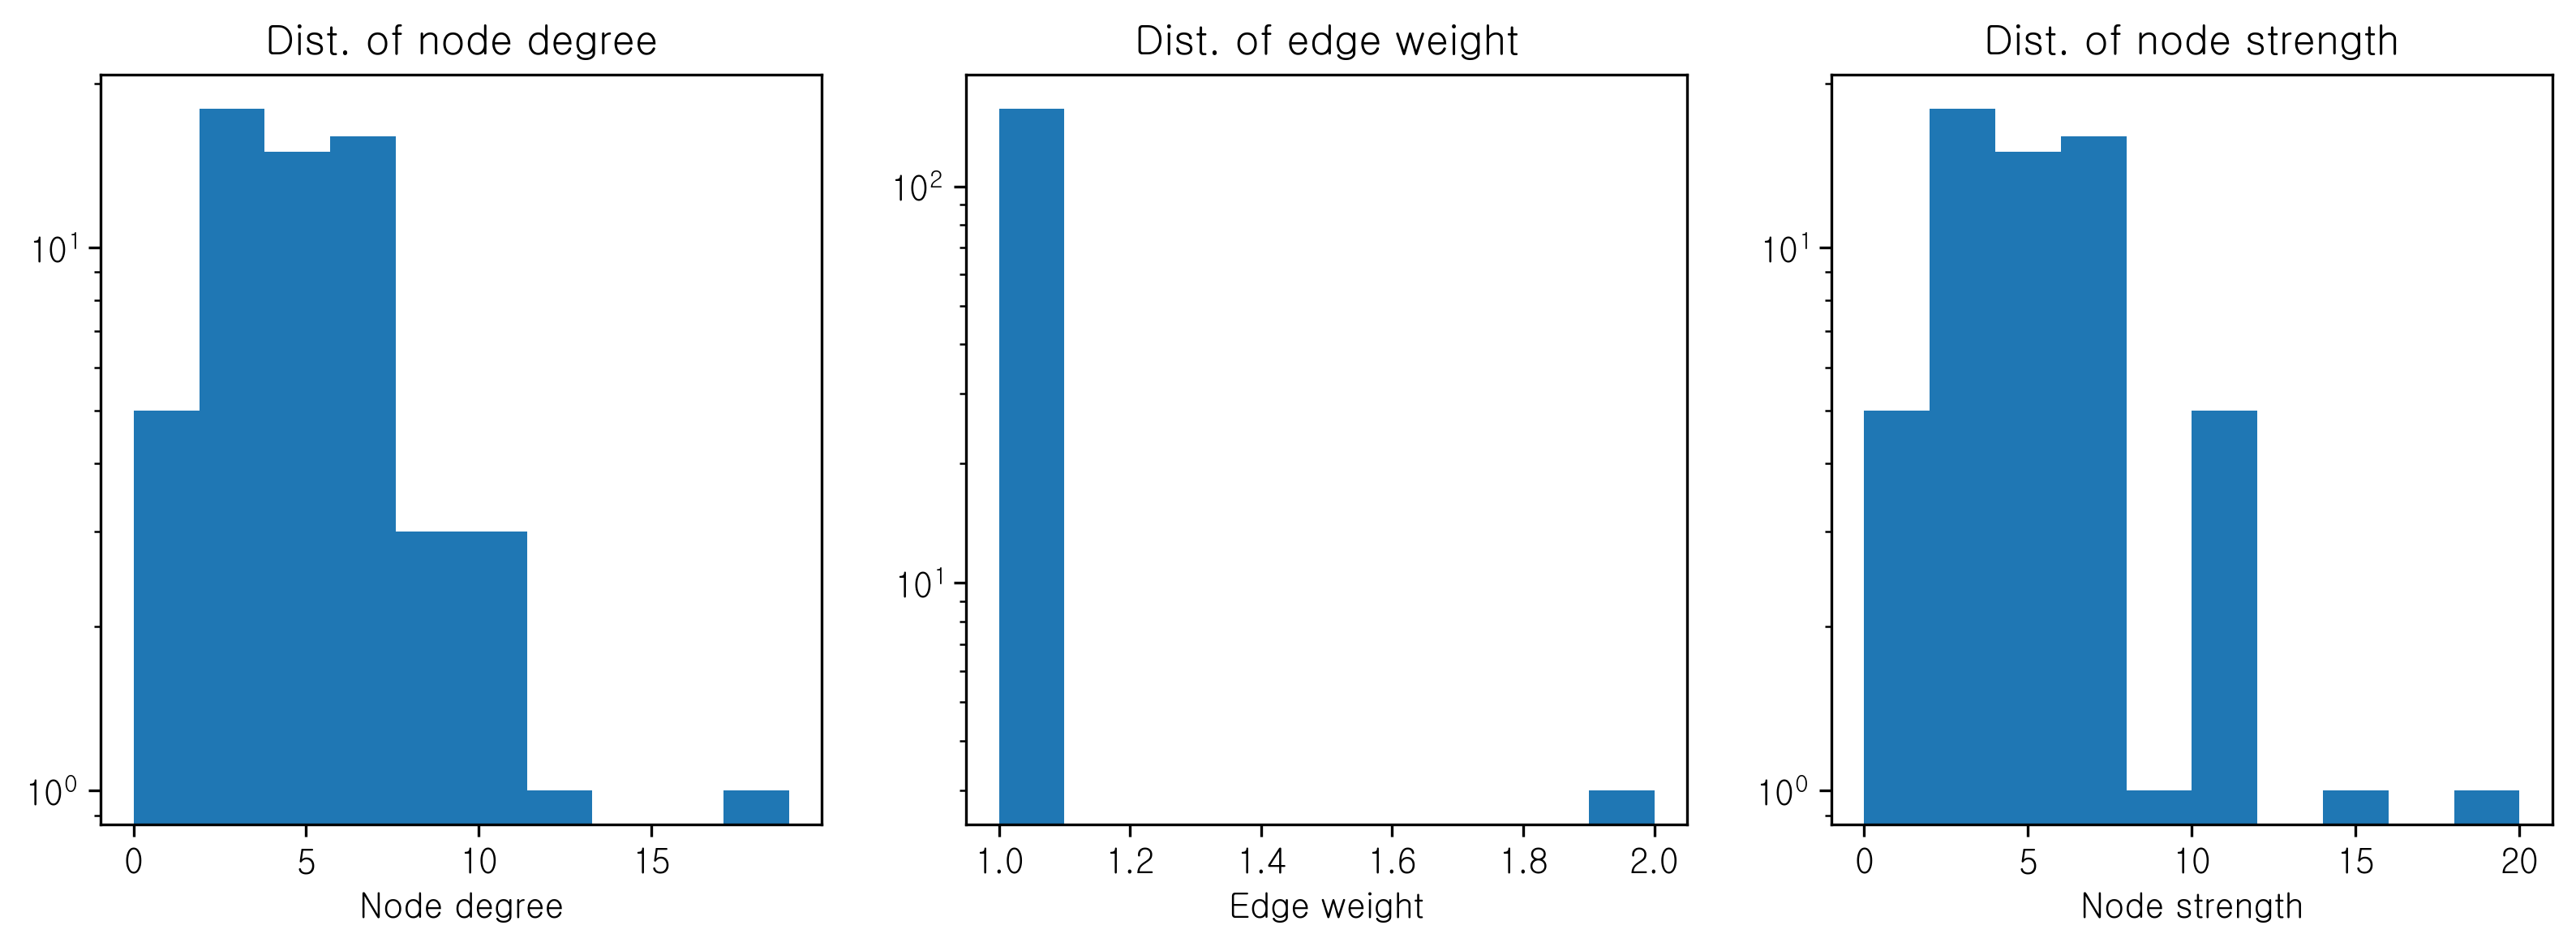

In [56]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
2: Pass, 6.590415175877457



Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions


Calculating best minimal value for power law fit
3: Pass, 4.4278839931158736

Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1408: RuntimeWarning: overflow encountered in scalar power
  C = ( self.Lambda**(1-self.alpha) /
D:\anaconda3\Lib\site-packages\powerlaw.py:1408: RuntimeWarning: invalid value encountered in scalar divide
  C = ( self.Lambda**(1-self.alpha) /
D:\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:917: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
D:\anaconda3\Lib\site-packages\powerlaw.py:1396: RuntimeWarning: overflow encountered in scalar power
  self.Lambda**(1-self.alpha)
D:\anaconda3\Lib\site-packages\powerlaw.py:1808: RuntimeWarning: invalid value encountered in subtract
  ( (loglikelihoods1-loglikelihoods2) - mean_diff)**2


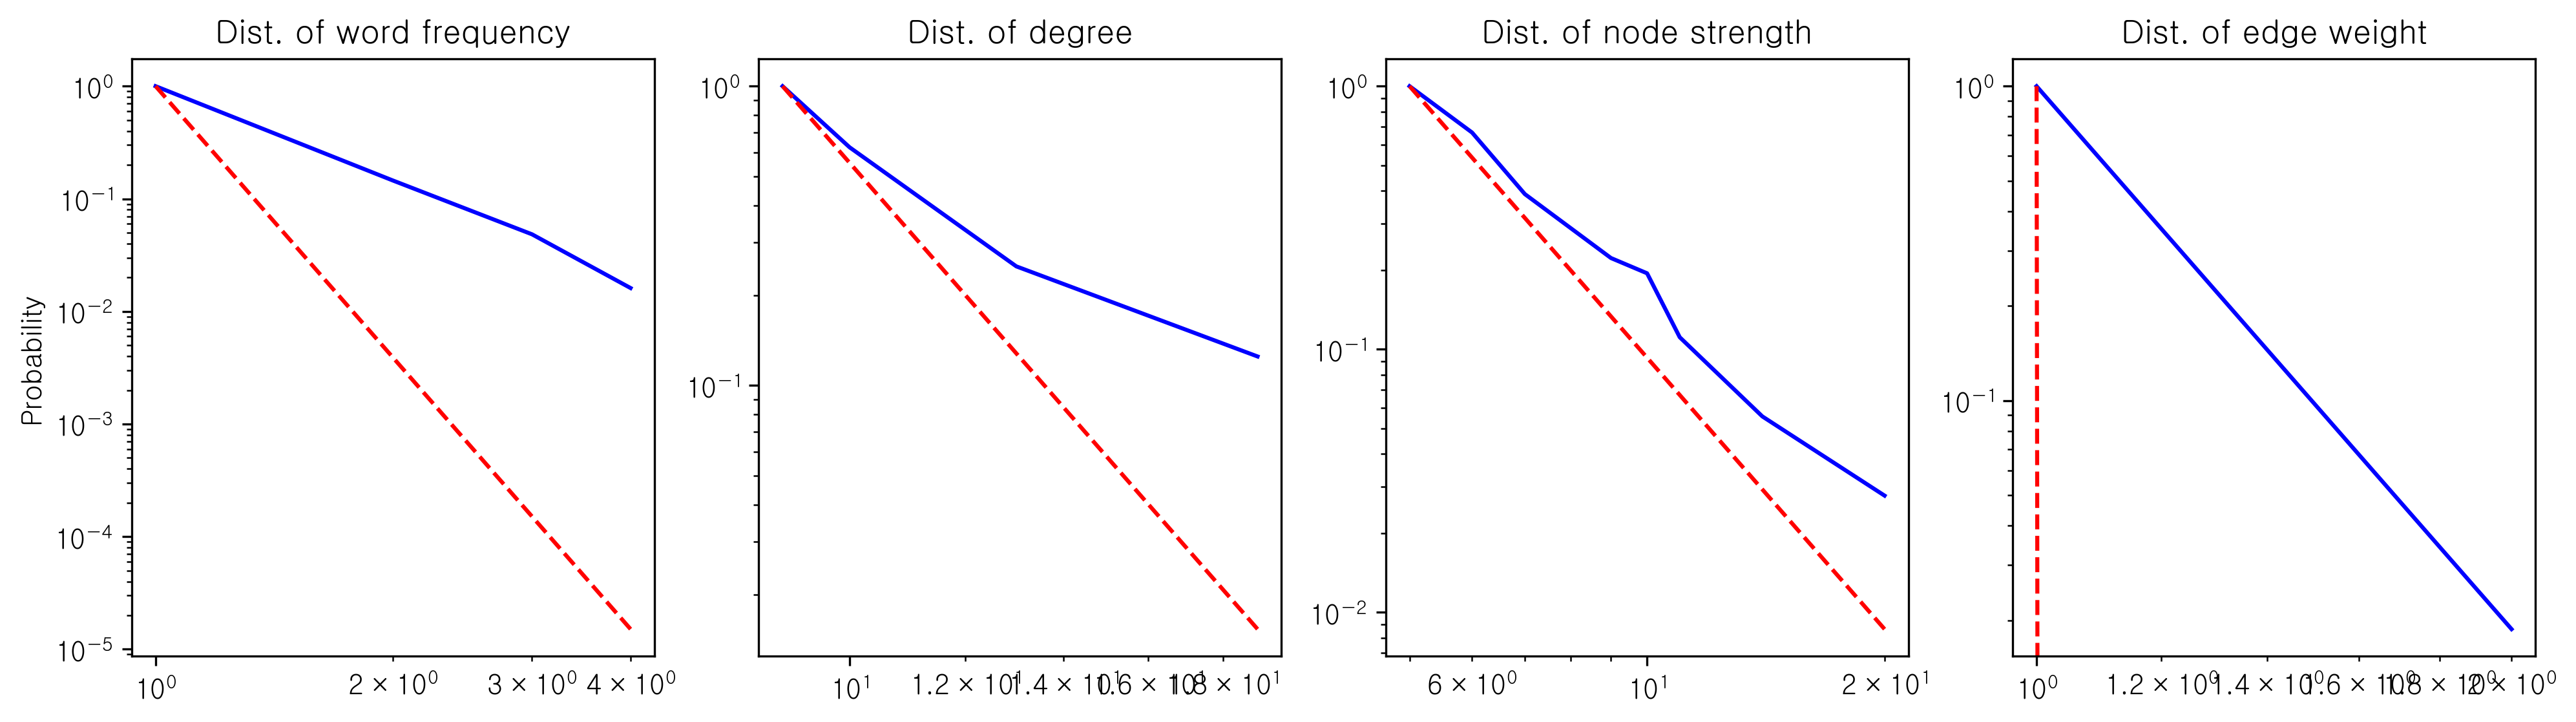

In [57]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [58]:
df = info(G)
df.head(20)

Node_F  Node Frequency               Node_ND  \
0                     Light             4.0                 Light   
1                   Digital             3.0           Probability   
2               Probability             3.0                Energy   
3                 Direction             2.0               Digital   
4                 Intensity             2.0               Quantum   
5                  Inductor             2.0             Direction   
6                    Energy             2.0             Intensity   
7              Interference             2.0          Interference   
8                   Quantum             2.0               Element   
9     Equipotential_surface             1.0              Emission   
10     Electric_field_lines             1.0              Spectrum   
11                   Charge             1.0                  Star   
12           Electric_field             1.0                Create   
13  Electrostatic_induction             1.0        Nuclear_fusion   
14  Dielectric_polarization             1.0              Inductor   
15                     Wire             1.0                Matter   
16         Electric_current             1.0  Photoelectric_effect   
17           Magnetic_field             1.0        Optical_sensor   
18     Magnetic_field_lines             1.0           Interaction   
19            Lorentz_force             1.0            Solar_cell   

    Node Degree               Node_NS  Node Strength  \
0          19.0                 Light           20.0   
1          13.0           Probability           14.0   
2          10.0               Digital           11.0   
3          10.0               Quantum           11.0   
4          10.0             Direction           10.0   
5           9.0             Intensity           10.0   
6           9.0                Energy           10.0   
7           9.0          Interference            9.0   
8           7.0               Element            7.0   
9           7.0              Emission            7.0   
10          7.0              Spectrum            7.0   
11          7.0                  Star            7.0   
12          7.0                Create            7.0   
13          7.0        Nuclear_fusion            7.0   
14          6.0              Inductor            6.0   
15          6.0                Matter            6.0   
16          6.0  Photoelectric_effect            6.0   
17          6.0        Optical_sensor            6.0   
18          6.0           Interaction            6.0   
19          6.0            Solar_cell            6.0   

                                             Edge  Edge Weight  \
0                          (Direction, Intensity)            2   
1                                (Light, Digital)            2   
2                          (Quantum, Probability)            2   
3   (Equipotential_surface, Electric_field_lines)            1   
4              (Equipotential_surface, Direction)            1   
5                 (Equipotential_surface, Charge)            1   
6         (Equipotential_surface, Electric_field)            1   
7              (Equipotential_surface, Intensity)            1   
8               (Electric_field_lines, Direction)            1   
9                  (Electric_field_lines, Charge)            1   
10         (Electric_field_lines, Electric_field)            1   
11              (Electric_field_lines, Intensity)            1   
12                            (Direction, Charge)            1   
13                    (Direction, Electric_field)            1   
14                              (Direction, Wire)            1   
15                  (Direction, Electric_current)            1   
16                    (Direction, Magnetic_field)            1   
17              (Direction, Magnetic_field_lines)            1   
18                       (Charge, Electric_field)            1   
19                            (Charge, Intensity)            1   

       